# O712 Group Assignment
## Group 4

### Student Names: 
(1) Tirth Raval (ravalt1)
(2) Narendran Valliappan (valliapn)
(3) Dario Vignoni (vignonid)
(4) Shiran Pieries (pieriesv)
(5) Rohankumar Patel (pater111)




### Important Note: 
Multiple people have worked on this report, and every code execution will provide slightly different numbers in some sections. Once the explanation was added to the report, these numbers have not been modified and might vary by a very small margin at times.



## Navigating across the report:
### Part 1: Exploratory Data Analysis
###### Section 1: Loading Libraries
###### Section 2 : Importing the Data
###### Section 3 : Understanding the Basic Layout of the dataset and insights
### Part 2: ML Models and Customer Segments
###### Section 1: Loading Libraries
###### Section 2: Loading Data
###### Section 3: Running Log Reg, KNN, and Decision Tree models to identify the best model
###### Section 4: Identifying the Business Acceptable Model
###### Section 5: Customer Segments
### Part 3:  Strategies and Conclusion

# Part 1: Exploratory Data Analysis

## Section 1: Loading Libraries

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"
print("All Libraries Loaded Successfully")

All Libraries Loaded Successfully


## Section 2 : Importing the Data

In [272]:
df = pd.read_csv("C:/Users/rohan/OneDrive/Desktop/MBA/Term 4/O712/Group Project/O712 Group Project Data - eCommerce Customers.csv")
# Visualizing the top few rows for confirming successful load of the raw data
df.head(7)

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   
5               0                      0.0              0   
6               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   
5                     0.0              19               154.216667   
6                     0.0               1                 0.000000   

   BounceRates  ExitRates  PageValues  SpecialDay        VisitorType  Weekend  \
0     0.200000   0.200000         0.0         0.0  Returning_Visitor    False   
1     0.000000   0.100000         0.0         0.0  Returning_Visitor    False   
2     0.200000   0.200000         0.0         0.0  Returning_Visitor    False   
3     0.050000   0.140000         0.0         0.0  Returning_Visitor    False   
4     0.020000   0.050000         0.0         0.0  Returning_Visitor     True   
5     0.015789   0.024561         0.0         0.0  Returning_Visitor    False   
6     0.200000   0.200000         0.0         0.4  Returning_Visitor    False   

  Transaction  
0          No  
1          No  
2          No  
3          No  
4          No  
5          No  
6          No

In [273]:
df.tail(6)

Administrative  Administrative_Duration  Informational  \
12324               0                      0.0              1   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
12324                     0.0              16               503.000000   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay        VisitorType  \
12324     0.000000   0.037647    0.000000         0.0  Returning_Visitor   
12325     0.007143   0.029031   12.241717         0.0  Returning_Visitor   
12326     0.000000   0.021333    0.000000         0.0  Returning_Visitor   
12327     0.083333   0.086667    0.000000         0.0  Returning_Visitor   
12328     0.000000   0.021053    0.000000         0.0  Returning_Visitor   
12329     0.000000   0.066667    0.000000         0.0        New_Visitor   

       Weekend Transaction  
12324    False          No  
12325     True          No  
12326     True          No  
12327     True          No  
12328    False          No  
12329     True          No

## Section 3 : Understanding the Basic Layout of the dataset

### The size of the dataset

In [274]:
df.shape

(12330, 13)

#### The dataset has 12330 records and have 13 Columns.

### Checking Presence of Null Values

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  VisitorType              12330 non-null  object 
 11  Weekend                  12330 non-null  bool   
 12  Transaction              12330 non-null  object 
dtypes: bool(1), float64(7), int64(3), object(2)
memory usage: 1.1+ MB


There are 12330 rows and all are non-null which means there is no missing data.

### Checking for duplicates in the data

In [276]:
df.duplicated().sum()

710

The dataset seems to have **710 duplicated records**. <br> Considering such a large amount of data, it is acceptable to consider that there may be customers presenting the same behaviour/data, especially for those who have spent very little time on Clifford's website. <br> It is therefore acceptable to proceed with the analysis without deleting data in order not to lose relevant information.

### Checking if all numerical columns are within their range or not

In [277]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  
count  12330.000000  12330.000000  12330.000000  12330.000000  
mean       0.022191      0.043073      5.889258      0.061427  
std        0.048488      0.048597     18.568437      0.198917  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.014286      0.000000      0.000000  
50%        0.003112      0.025156      0.000000      0.000000  
75%        0.016813      0.050000      0.000000      0.000000  
max        0.200000      0.200000    361.763742      1.000000

Seeing the basic summary of the dataset it could be deduced that all the numerical columns **seems to be in acceptable and plausible ranges**.

## Section 4 : Insights through Data Visualization

First of all, the one-hot-encoding technique is used to make it possible to display non-numeric columns graphically as well.

In [278]:
df['VisitorType Status'] = (pd.get_dummies(df['VisitorType'])).iloc[:,1]
df['Weekend Status'] = (pd.get_dummies(df['Weekend'])).iloc[:,1]
df['Transaction Status'] = (pd.get_dummies(df['Transaction'])).iloc[:,1]

In [279]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay        VisitorType  Weekend  \
0         0.20       0.20         0.0         0.0  Returning_Visitor    False   
1         0.00       0.10         0.0         0.0  Returning_Visitor    False   
2         0.20       0.20         0.0         0.0  Returning_Visitor    False   
3         0.05       0.14         0.0         0.0  Returning_Visitor    False   
4         0.02       0.05         0.0         0.0  Returning_Visitor     True   

  Transaction  VisitorType Status  Weekend Status  Transaction Status  
0          No                   1               0                   0  
1          No                   1               0                   0  
2          No                   1               0                   0  
3          No                   1               0                   0  
4          No                   1               1                   0

In [280]:
df.shape

(12330, 16)

In [281]:
df.corr()

C:\Users\rohan\AppData\Local\Temp\ipykernel_24048\1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
Weekend                        0.026417                 0.014990   
VisitorType Status            -0.022884                -0.022525   
Weekend Status                 0.026417                 0.014990   
Transaction Status             0.138917                 0.093587   

                         Informational  Informational_Duration  \
Administrative                0.376850                0.255848   
Administrative_Duration       0.302710                0.238031   
Informational                 1.000000                0.618955   
Informational_Duration        0.618955                1.000000   
ProductRelated                0.374164                0.280046   
ProductRelated_Duration       0.387505                0.347364   
BounceRates                  -0.116114               -0.074067   
ExitRates                    -0.163666               -0.105276   
PageValues                    0.048632                0.030861   
SpecialDay                   -0.048219               -0.030577   
Weekend                       0.035785                0.024078   
VisitorType Status            0.057399                0.045501   
Weekend Status                0.035785                0.024078   
Transaction Status            0.095200                0.070345   

                         ProductRelated  ProductRelated_Duration  BounceRates  \
Administrative                 0.431119                 0.373939    -0.223563   
Administrative_Duration        0.289087                 0.355422    -0.144170   
Informational                  0.374164                 0.387505    -0.116114   
Informational_Duration         0.280046                 0.347364    -0.074067   
ProductRelated                 1.000000                 0.860927    -0.204578   
ProductRelated_Duration        0.860927                 1.000000    -0.184541   
BounceRates                   -0.204578                -0.184541     1.000000   
ExitRates                     -0.292526                -0.251984     0.913004   
PageValues                     0.056282                 0.052823    -0.119386   
SpecialDay                    -0.023958                -0.036380     0.072702   
Weekend                        0.016092                 0.007311    -0.046514   
VisitorType Status             0.128738                 0.120489     0.129908   
Weekend Status                 0.016092                 0.007311    -0.046514   
Transaction Status             0.158538                 0.152373    -0.150673   

                         ExitRates  PageValues  SpecialDay   Weekend  \
Administrative           -0.316483    0.098990   -0.094778  0.026417   
Administrative_Duration  -0.205798    0.067608   -0.073304  0.014990   
Informational            -0.163666    0.048632   -0.048219  0.035785   
Informational_Duration   -0.105276    0.030861   -0.030577  0.024078   
ProductRelated           -0.292526    0.056282   -0.023958  0.016092   
ProductRelated_Duration  -0.251984    0.052823   -0.036380  0.007311   
BounceRates               0.913004   -0.119386    0.072702 -0.046514   
ExitRates                 1.000000   -0.174498    0.102242 -0.062587   
PageValues               -0.174498    1.000000   -0.063541  0.012002   
SpecialDay                0.102242   -0.063541    1.000000 -0.016767   
Weeke

C:\Users\rohan\AppData\Local\Temp\ipykernel_24048\3845839996.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



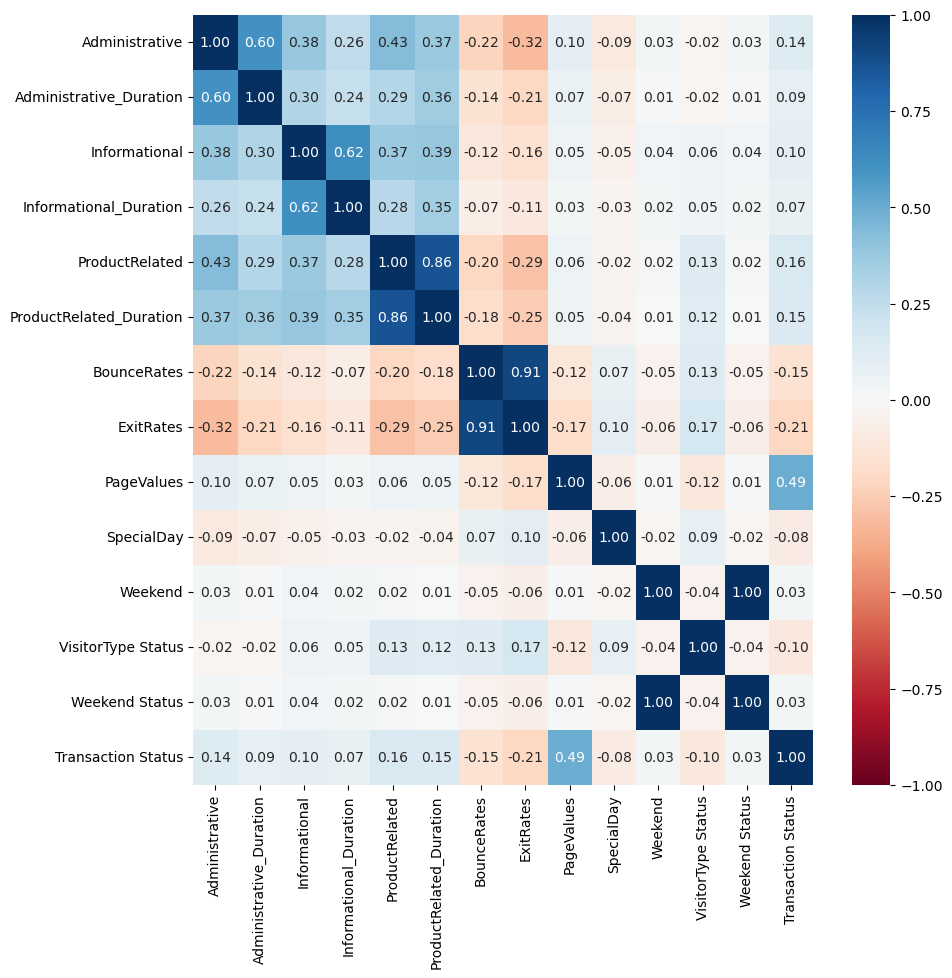

In [282]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap = 'RdBu',fmt =".2f",vmin=-1)
plt.show()

From this heatmap it is possible to derive several key insights into the data: <br>
1. There is a **good correlation** between Number of Administrative Page Visits and Adminsitrative Duration *which is obvious*
2. There is a **good correlation** between Number of Informative Visits and Informative Duration *which is obvious*
3. There is a **strong correlation** between Number of Product Page Visits and Product Duration *which is obvious*<br><br>
It is important to note here that overall **there is a (not substantially strong) but positive intercorrelation** between <br><br>**Administrative Page Visit, its' duration &harr; Informative Page Visit, its' duration &harr; Product Related Page Visit, its' duration.** <br><br>
This indicates a tendency for increased engagement in one page category to be associated with increased engagement in others. Such a pattern may reflect a user's comprehensive engagement with the site's content, where a heightened interest in any single aspect of the e-commerce platform could lead to a more extensive browsing behavior overall. <br><br>

4. Overall user engagement on the site correlates positively with the likelihood of making a transaction, with different types of content varying in their impact. <br><br>
&rarr; Engagement with **product-related content**, both in terms of visit duration (0.15) and frequency (0.16), is most strongly associated with transaction completion. <br>
&rarr; **Administrative content** follows, where both the number of visits (0.14) and the time spent (0.09) show a positive correlation with purchases, albeit less so than product-related content. <br>
&rarr; **Informational content** shows the least correlation (0.10 for visits and 0.07 for duration), suggesting that while it contributes to transaction likelihood, it does so to a lesser extent than administrative or product-related engagement. <br><br>
This hierarchy emphasizes that deeper engagement, particularly with product-related pages, is a significant predictor of e-commerce transactions. And suggests that improving the user experience on administrative and product pages could lead to higher transaction rates. <br><br>

5. PageValues has the **strongest positive correlation** with Transaction_Status (0.49) <br><br>
&rarr; Which means that the average value of a page a user visited before completing a transaction is highly predictive of transaction likelihood <br>
&rarr; This also translates to if a visitor visits or is somehow drawn to pages with higher page values those visitors could likely make a transaction on Clifford's Website<br><br>

6. There is a **strong Correlation** of Bounce and Exit Rates *which is obvious*

7. There is a **negative correlation** of Bounce&Exit Rates with Transaction Status *which is obvious*<br><br>
&rarr; This further indicates that a lack of engagement lead to a transaction with less likelihood.<br><br>

8. SpecialDay has a **very low negative correlation** with Transaction_Status (-0.08)<br><br> 
&rarr; This suggest that the closeness to a special day has a negligible effect on the likelihood of a transaction occurring. <br><br>

9. Weekend has **no significant correlation** with Transaction_Status (0.03)<br><br> 
&rarr; This indicates that transactions are just as likely to occur on weekends as on weekdays.<br><br>

10. The VisitorType shows a **very small positive correlation** with Transaction_Status (0.10)<br><br> 
&rarr; This is a hint that whether a visitor is new or returning has a slight effect on transaction likelihood. <br><br>

11. There is a **positive correlation** between visitor status and both No. of Product Related engagement and bounce&exit Rates <br><br>
&rarr; This explains that **returning visitors tend to visit more** Product Related Pages and **Spend More time** on those pages **but also leave more often**<br><br>




Now we'll analyse in detail the variables with the strongest correlation (positive or negative) with the most relevant variable from a business perspective: Transaction_Status; to better understand their distribution. In particular, we will analyse: **PageValues**, **ExitRates**, **ProductRelated_Duration** <br> Note: Being Exit Rates and Bounce Rates, as well as Product Related Duration and Product Related highly correlated we expect to gain insights of both even analysing one of the two only.

In [283]:
fig = px.box(df, y="PageValues")
fig.show()

The boxplot for PageValues on Clifford's e-commerce website indicates a skew towards the lower end of the PageValue spectrum. <br> The majority of pages have a relatively low value, but there are several outliers indicating a few pages with exceptionally high values. <br> This pattern suggests that while most visitors engage with pages that have little influence on transactions, a select few pages are highly effective in contributing to the site's overall revenue. 

In [284]:
fig = px.box(df, y="ExitRates")
fig.show() 

px.histogram(df, x="ExitRates",nbins=100)

The boxplot for the ExitRates on Clifford's e-commerce website demonstrates a concentration of lower values, with the majority of sessions ending with a low exit rate. This suggests that a substantial portion of users navigate through multiple pages before leaving the site. <br> The right-skewed distribution seen in the histogram reinforces this observation, indicating that while most users exhibit low exit rates, there is a tail of sessions that end after viewing only a few pages.

In [285]:
fig = px.box(df, y="ProductRelated")
fig.show() 

The boxplot for 'ProductRelated_Duration' on Clifford's e-commerce website indicates that the majority of user sessions involve relatively short durations on product-related pages, as evidenced by the box being compressed towards the lower end of the scale. <br> There is a significant number of outliers, which suggests that there are a few users who spend a substantial amount of time engaged with product content.

#### Let's now delve into a deeper understanding of data.

In [286]:
df["Transaction"].value_counts()

No     10422
Yes     1908
Name: Transaction, dtype: int64

In [287]:
table0 = pd.pivot_table(df,index=["Transaction"],values="Transaction Status",aggfunc="count")
table0.reset_index(inplace=True)
table0

Transaction  Transaction Status
0          No               10422
1         Yes                1908

Out of 12330 Visitors of Clifford Website, only 1908 have made purchases in the last year from their eCommerce Website.

In [288]:
table2 = pd.pivot_table(df,index=["Weekend"],values="Transaction Status",aggfunc="count")
table2.reset_index(inplace=True)
table2

Weekend  Transaction Status
0    False                9462
1     True                2868

Out of all the Visitors to the Clifford's eCommerce Website, approximaltely **23% of visitors** visit Clifford's Website mostly **During Weekends**.

Lets see if there is an interaction between the Transaction Status and Visiting the Weekend

In [289]:
table3 = pd.pivot_table(df,index=["Weekend","Transaction"],values="Transaction Status",aggfunc="count")
table3.reset_index(inplace=True)
table3

Weekend Transaction  Transaction Status
0    False          No                8053
1    False         Yes                1409
2     True          No                2369
3     True         Yes                 499

In [290]:
fig = px.bar(data_frame=table3,x="Transaction",y="Transaction Status",color="Weekend",barmode="group",text="Transaction Status",
             title="Number of Visitors By Transaction Status & Weekend",height=650,
            labels={"Transaction Status":"Number of Visitors"})
fig["data"]
fig["data"][0]["textposition"] = "outside"
fig["data"][1]["textposition"] = "outside"
fig["data"][0]["marker"]["color"] = "#2BB876"
fig["data"][1]["marker"]["color"] = "#9b287b"
# fig["data"]
fig.show()

Out of all transactions made on Clifford's website, **around 26%** are completed during weekends. <br> 
When comparing the likelihood of transactions, visitors are roughly 17% likely to make a purchase during the weekend, as opposed to approximately 15% on weekdays. This indicates that visitors are somewhat more inclined to complete transactions on weekends than during weekdays.

In [291]:
table1 = pd.pivot_table(df,index=["VisitorType"],values="VisitorType Status",aggfunc="count")
table1.reset_index(inplace=True)
table1

VisitorType  VisitorType Status
0        New_Visitor                1779
1  Returning_Visitor               10551

Out of all the Visitors to the Clifford's eCommerce Website - <br>1779 were **New Visitors** <br> 10551 were **Returning Visitors**

In [292]:
table4 = pd.pivot_table(df,index=["Transaction","VisitorType"],values="Transaction Status",aggfunc="count")
table4.reset_index(inplace=True)
table4

Transaction        VisitorType  Transaction Status
0          No        New_Visitor                1341
1          No  Returning_Visitor                9081
2         Yes        New_Visitor                 438
3         Yes  Returning_Visitor                1470

In [293]:
fig = px.bar(data_frame=table4,x="VisitorType",y="Transaction Status",color="Transaction",barmode="group",text="Transaction Status",
             title="Number of Visitors By Transaction Status & Visitor Type",height=650,
            labels={"Transaction Status":"Number of Visitors"})
fig["data"]
fig["data"][0]["textposition"] = "outside"
fig["data"][1]["textposition"] = "outside"
fig["data"][0]["marker"]["color"] = "#223C50"
fig["data"][1]["marker"]["color"] = "#4CA334"
# fig["data"]
fig.show()

It is evident to note here that: <br>
&rarr; The conversion rate for **New Visitors** on Clifford's website is approximately **24.6%**, indicating that roughly 1 in 4 new visitors makes a transaction. <br>
&rarr; The conversion rate for **Returning Visitors** is about **13.9%**, suggesting that just over 1 in 
7 of these visitors completes a transaction. <br> <br> 
Despite the higher frequency of visits by returning visitors, new visitors have a higher likelihood of making a transaction on Clifford's website.

#### Lets' Observe how is the buying pattern of visitors during weekends

In [294]:
table5 = pd.pivot_table(df,index=["Transaction","VisitorType","Weekend"],values="Transaction Status",aggfunc="count")
table5.reset_index(inplace=True)
table5

Transaction        VisitorType  Weekend  Transaction Status
0          No        New_Visitor    False                 961
1          No        New_Visitor     True                 380
2          No  Returning_Visitor    False                7092
3          No  Returning_Visitor     True                1989
4         Yes        New_Visitor    False                 332
5         Yes        New_Visitor     True                 106
6         Yes  Returning_Visitor    False                1077
7         Yes  Returning_Visitor     True                 393

In [295]:
fig = px.bar(data_frame=table5,x="VisitorType",y="Transaction Status",color="Transaction",barmode="group",text="Transaction Status",
             title="Number of Visitors By Transaction Status & Visitor Type Differentiated by Weekend",height=650,facet_col="Weekend",
            labels={"Transaction Status":"Number of Visitors"})
fig["data"]
fig["data"][0]["textposition"] = "outside"
fig["data"][1]["textposition"] = "outside"
fig["data"][2]["textposition"] = "outside"
fig["data"][3]["textposition"] = "outside"

fig["data"][0]["marker"]["color"] = "#223C50"
fig["data"][1]["marker"]["color"] = "#223C50"
# fig["data"]
fig.show()

It is evident that: <br> 
1. **25.6%** of **new visitors** make a transaction on **Non-Weekend Days**, while this rate slightly decreases to around **21.8%** on **Weekends**. 
2. **13.2%** of **returning visitors**, make a transaction on **Non-Weekend Days**, this rate slightly increases to **16.5%** during **Weekends**. <br>

Generally, there is a slight decrease in the conversion rate for new visitors on weekends, while the opposite trend is observed for returning visitors, where the conversion rate increases. This variation, while present, remains within an acceptable range, indicating that weekends may present a different dynamic in visitor behavior.

#### Lets Investigate How is the Visit Pattern of Visitors

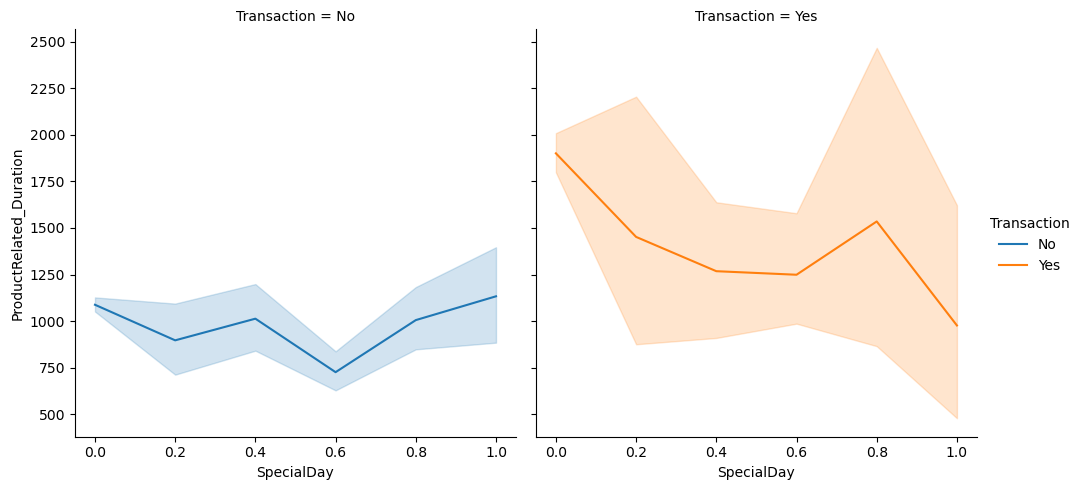

In [296]:
sns.relplot(data=df,x="SpecialDay",y="ProductRelated_Duration",hue="Transaction",col="Transaction",kind="line")
plt.show()

The graph shows that for both groups (those who did and did not make a purchase), the duration on product-related pages fluctuates but generally trends upward as the special day approaches, with a notable increase in duration for non-transacting visitors as the special day nears 1.0.

For visitors who made a purchase, the duration spent on product-related pages is consistently lower than for those who did not make a purchase. Interestingly, the duration for transacting visitors peaks as the special day approaches 0.8, suggesting a potential initial rush to make purchases as a special day approaches, followed by a decline perhaps due to the completion of their intended purchases.

The peak in duration for non-transacting visitors near the special day implies that these visitors may be browsing more or taking longer to make a decision, which could be due to a variety of factors such as increased options, special deals, or indecision.

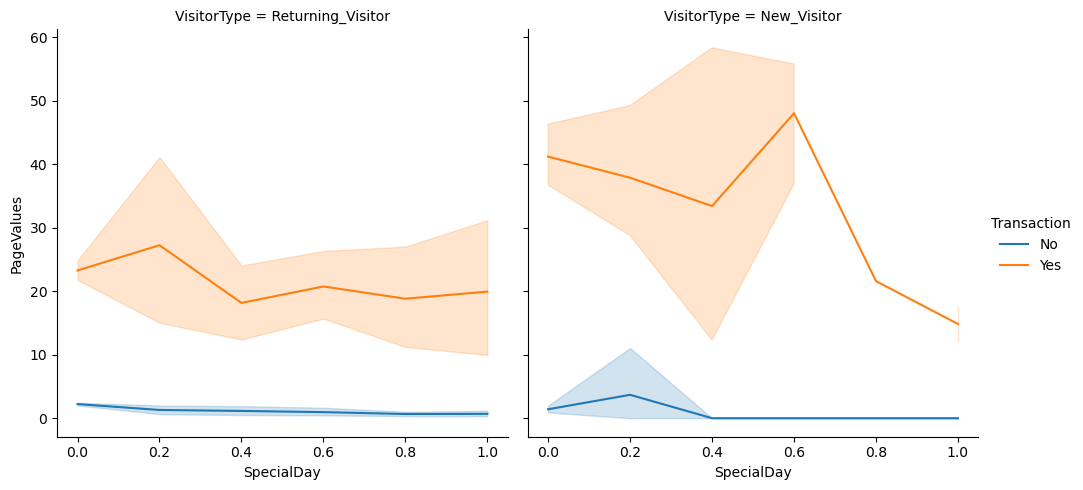

In [297]:
sns.relplot(data=df,x="SpecialDay",y="PageValues",hue="Transaction",col="VisitorType",kind="line")
plt.show()

Once again we notice how higher PageValue suggest more likelihood of making a transaction.

The key takeaway from this graph could be that returning visitors who made a transaction demonstrate consistent engagement without throughout the period leading to a special day, while new transacting visitors' highest engagement and potential value generation peaks and then falls as the special day approaches.

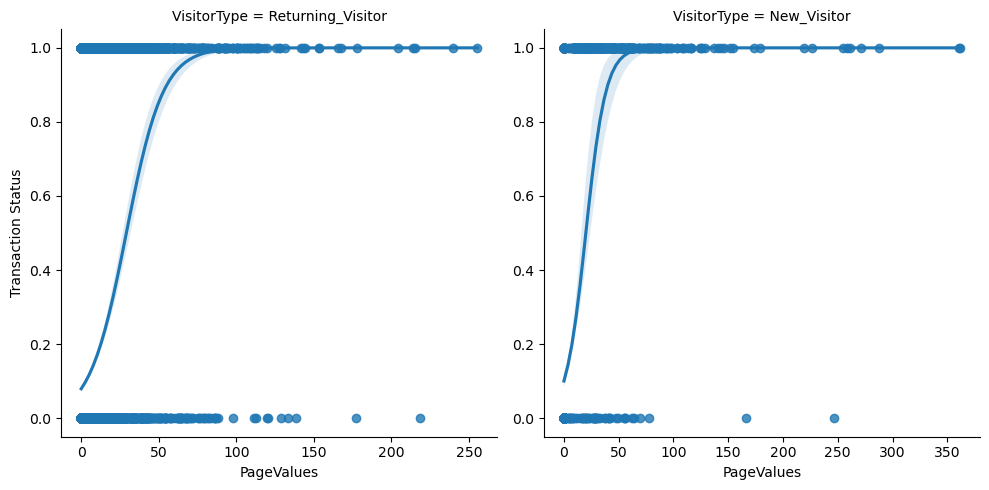

In [298]:
sns.lmplot(data=df,x="PageValues",y="Transaction Status",col="VisitorType",facet_kws=dict(sharex=False, sharey=False),logistic=True)
plt.show()

The logistic regression analysis shows that the probability of a transaction sharply increases with PageValues for both new and returning visitors, indicating that more valuable content is highly effective at driving purchases. 

The threshold at which new visitors' transaction probability levels off is lower than that of returning visitors, suggesting that new visitors may require less interaction with high-value pages to be convinced to make a purchase. 

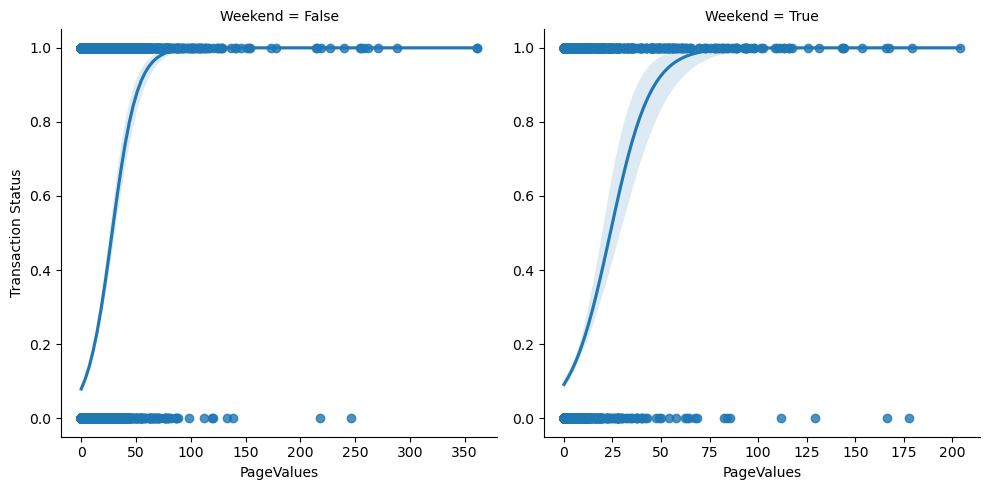

In [299]:
sns.lmplot(data=df,x="PageValues",y="Transaction Status",col="Weekend",facet_kws=dict(sharex=False, sharey=False),logistic=True)
plt.show()

The analysis indicates a robust relationship between PageValues and the likelihood of transactions on Clifford's website, with both weekdays and weekends showing a pronounced increase in transaction probability with higher PageValues. 

The leveling off of transaction likelihood occurs at a lower PageValue over weekends, suggesting that visitors may have a stronger purchase intent or respond more to weekend promotions.

# Part 2: ML Models

## Section 1: Loading Libraries

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"
print("All Libraries Loaded Successfully")

All Libraries Loaded Successfully


## Section 2: Loading Data

In [301]:
df = pd.read_csv("Clifford_Clean with Duplicates.csv")
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay        VisitorType  Weekend  \
0         0.20       0.20         0.0         0.0  Returning_Visitor    False   
1         0.00       0.10         0.0         0.0  Returning_Visitor    False   
2         0.20       0.20         0.0         0.0  Returning_Visitor    False   
3         0.05       0.14         0.0         0.0  Returning_Visitor    False   
4         0.02       0.05         0.0         0.0  Returning_Visitor     True   

  Transaction  VisitorType Status  Weekend Status  Transaction Status  
0          No                   1               0                   0  
1          No                   1               0                   0  
2          No                   1               0                   0  
3          No                   1               0                   0  
4          No                   1               1                   0

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  VisitorType              12330 non-null  object 
 11  Weekend                  12330 non-null  bool   
 12  Transaction              12330 non-null  object 
 13  VisitorType Status       12330 non-null  int64  
 14  Weekend Status        

### Basic CorrPlot with HeatMap

C:\Users\rohan\AppData\Local\Temp\ipykernel_24048\3420667235.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

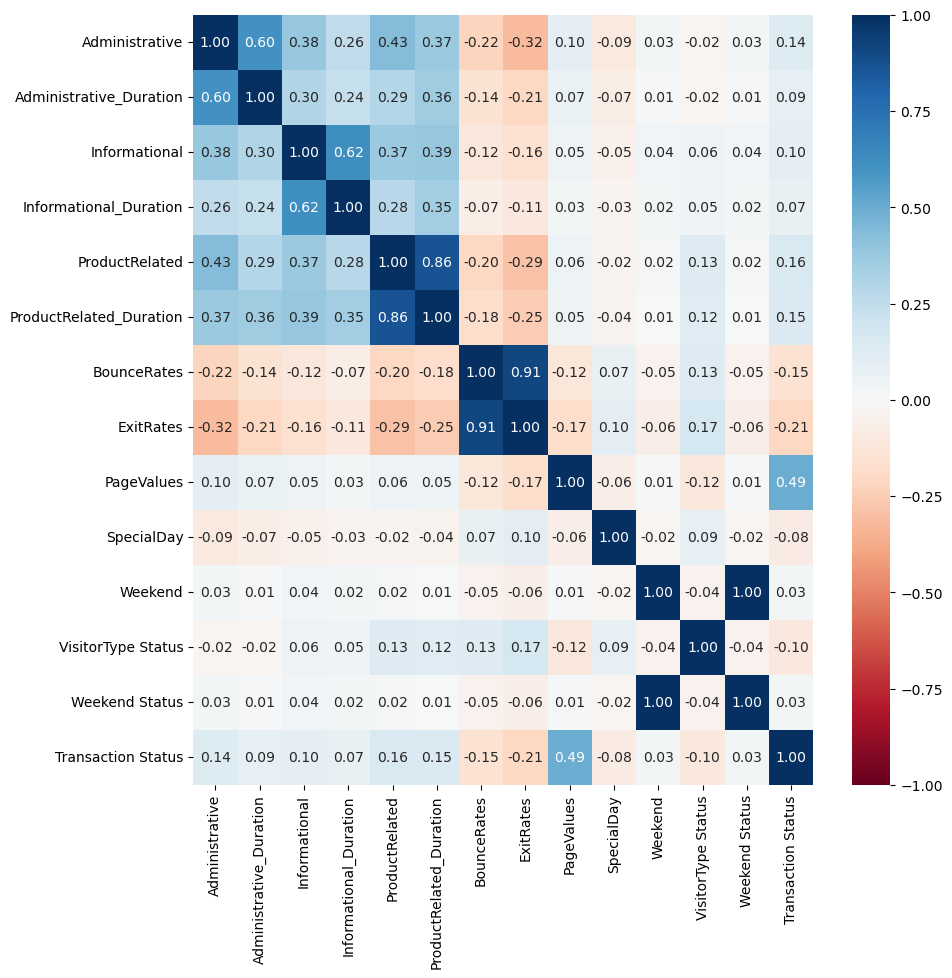

In [303]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap = 'RdBu',fmt =".2f",vmin=-1)

### Reordering the Columns 

In [304]:
col = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',  'VisitorType Status', 'Weekend Status',
       'Transaction Status','VisitorType',
       'Weekend', 'Transaction',]
df= df[col]
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  VisitorType Status  \
0         0.20       0.20         0.0         0.0                   1   
1         0.00       0.10         0.0         0.0                   1   
2         0.20       0.20         0.0         0.0                   1   
3         0.05       0.14         0.0         0.0                   1   
4         0.02       0.05         0.0         0.0                   1   

   Weekend Status  Transaction Status        VisitorType  Weekend Transaction  
0               0                   0  Returning_Visitor    False          No  
1               0                   0  Returning_Visitor    False          No  
2               0                   0  Returning_Visitor    False          No  
3               0                   0  Returning_Visitor    False          No  
4               1                   0  Returning_Visitor     True          No

## Section 3: Loading Essential ML Libraries

In [305]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, roc_auc_score,classification_report,confusion_matrix,accuracy_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Section 3: Running Log Reg, KNN, and Decision Tree models to identify the best model

##  Log Reg Model (Full)

### Splitting the Data into Training and Testing

In [306]:
X = df.iloc[:,0:12]
Y = df.iloc[:,12]
Xtrain, Xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.2, random_state = 42)
Xtrain.head()

Administrative  Administrative_Duration  Informational  \
1785                0                      0.0              0   
10407               2                     14.0              0   
286                 0                      0.0              0   
6520                5                     49.2              4   
12251               0                      0.0              1   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
1785                      0.0               7                95.000000   
10407                     0.0              81              1441.910588   
286                       0.0               1                 0.000000   
6520                    379.0               5                74.600000   
12251                     5.0               9               279.000000   

       BounceRates  ExitRates  PageValues  SpecialDay  VisitorType Status  \
1785      0.014286   0.061905    0.000000         0.0                   1   
10407     0.002469   0.013933    2.769599         0.0                   1   
286       0.200000   0.200000    0.000000         0.0                   1   
6520      0.000000   0.018182    8.326728         0.0                   0   
12251     0.040000   0.041667    0.000000         0.0                   0   

       Weekend Status  
1785                0  
10407               0  
286                 0  
6520                0  
12251               1

In [307]:
ytrain.head()

1785     0
10407    0
286      0
6520     0
12251    0
Name: Transaction Status, dtype: int64

### Initiating the Log Reg Model

In [308]:
log_reg_full = LogisticRegression()

### Fitting the FULL Data into Log Model

In [309]:
log_reg_full.fit(Xtrain, ytrain)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

### Make Predictions using the Full Scale Log Model

In [310]:
ytrain_predicted_full_log = log_reg_full.predict(Xtrain)
ytrain_predicted_prob_full_log = log_reg_full.predict_proba(Xtrain)
ytest_predicted_full_log = log_reg_full.predict(Xtest)
ytest_predicted_prob_full_log = log_reg_full.predict_proba(Xtest)

print("Accuracy Score (train):", accuracy_score(y_pred=ytrain_predicted_full_log,y_true= ytrain))
print("Accuracy Score (test):",accuracy_score(y_pred=ytest_predicted_full_log,y_true= ytest))


Accuracy Score (train): 0.8871654501216545
Accuracy Score (test): 0.8718572587185726


### Confusion Matrix for Full Scale Log R Model

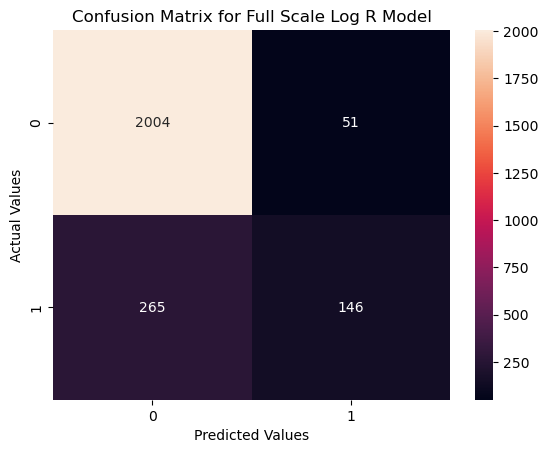

In [311]:
sns.heatmap(confusion_matrix(ytest, ytest_predicted_full_log), annot = True,  fmt = 'g')
plt.xlabel('Predicted Values') 
plt.ylabel('Actual Values')
plt.title("Confusion Matrix for Full Scale Log R Model")
plt.show()


So here,<br>
0 - Negative or No Transaction and 1 - Positive or Yes Transaction<br>
**True Positive** = 146 (The Model has correctly predicted Customers who **made** the Transaction)<br>
**True Negatives** = 2004 (The model has correctly predicted Customers who **NOT** made the Transaction)<br>
**False Positives**= 51 (The Model has **incorrectly predicted** as **YES** Transaction but Actually the customer **NOT** made the Transaction)<br>
**False Negtives** = 265 (The Model has **incorrectly predicted** that Customer **NOT** made the Transaction but Actually the customer **made** the Transaction)

The *High values of False Negatives* is **much concerning** as the model is **Over Predicting** Customers as NO Transaction even though they have made the transaction

In [312]:
TP_full = confusion_matrix(ytest, ytest_predicted_full_log)[1,1]
TN_full =confusion_matrix(ytest, ytest_predicted_full_log)[0,0]
FP_full = confusion_matrix(ytest, ytest_predicted_full_log)[0,1]
FN_full = confusion_matrix(ytest, ytest_predicted_full_log)[1,0]

### Accuracy = Correctly Predicted Values/All Values



In [313]:
(TP_full + TN_full )/ (TP_full + TN_full +FP_full +FN_full)


0.8718572587185726

### Classification Report

In [314]:
print(classification_report(ytest, ytest_predicted_full_log))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2055
           1       0.74      0.36      0.48       411

    accuracy                           0.87      2466
   macro avg       0.81      0.67      0.70      2466
weighted avg       0.86      0.87      0.85      2466



The Recall for YES Transaction here is **super LOW** just 0.36 worse than a 50-50 Classifier. <br>
There is also **significant difference** between Precision of **YES TRANSACTION (0.74)** and Precision of **NO TRANSACTION (0.88)**<br>
The **F1-Score** for YES Transaction is **quite low (0.48)** <br><br>

Overall, this means that our model is *very well able to classify NO Transaction* but is **poorly classifying the YES Transaction**. i.e correctly identify customers who made a purchase on Cliffords'Website.
<br>
<br>
**Lets Complete the Model Evaluation for the Full Scale LogR Model**

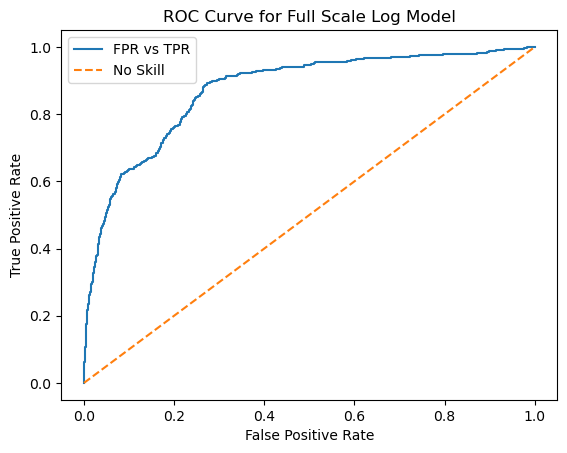

In [315]:
fpr_full_log,tpr_full_log, threshold_full_log = roc_curve(ytest,log_reg_full.predict_proba(Xtest)[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr_full_log,tpr_full_log,label="FPR vs TPR")
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Full Scale Log Model")
plt.legend()
plt.show()

### AUC Score

In [316]:
roc_auc_score(ytest,ytest_predicted_full_log)

0.6652068126520682

### Model Summary of Log Reg

**Full Log Model Summary**

1. Model Accuracy = 87.18% *(Good)*
2. High False Negatives = 265  *Model is unable to capture YES Transactions*
3. For **NO Transactions** - *Very High Precision, Recall and F1-Score* <br>
    3.1 Precision 0.88   <br>
    3.2 Recall 0.98<br>
    3.3 F1-score   0.93
4. For **YES Transactions** - *Very Low Precision, Recall and F1-Score* <br>
    4.1 Precision 0.74   *Low*<br>
    4.2 Recall 0.36  *Poor*<br>
    4.3 F1-score   0.48  *Very Low*
5. AUC - 0.665 *Low*
<br><br>

Overall, this means that our model is *very well able to classify NO Transaction* but is **poorly classifying the YES Transaction**. i.e correctly identify customers who made a purchase on Cliffords'Website.

         

## KNN Model (Full)

### Scale the Data for KNN Model

In [317]:
scaler = StandardScaler() # Create a scaler object
scaler.fit(Xtrain)       # using the fit function I will provide the base mean and standard deviation to the object
XtrainScaled = scaler.transform(Xtrain) # Now the values for the Xtrain has been scaled

In [318]:
XtestScaled = scaler.transform(Xtest) # Now the values for the Xtest has been scaled

###  Create the KNN model 

Choosing a random k = 2

In [319]:
# Create the object of the KNeighboursClassifier with the 
knn_full = KNeighborsClassifier(n_neighbors=2)
knn_full

KNeighborsClassifier(n_neighbors=2)

###  Train the model on the Xtrain 

In [320]:
knn_full.fit(XtrainScaled,ytrain)

KNeighborsClassifier(n_neighbors=2)

###  Make the predictions on the Xtrain and Xtest data

In [321]:
ytrainPredicted_knn_full = knn_full.predict(XtrainScaled) # Store the predictions from the model on the train dataset
ytestPredicted_knn_full = knn_full.predict(XtestScaled) # Store the predictions from the model on the test dataset

### Check the Accuracy on the Xtrain and Xtest data

In [322]:
print("Accuracy Score (train):", accuracy_score(y_pred=ytrainPredicted_knn_full,y_true= ytrain))
print("Accuracy Score (test):",accuracy_score(y_pred=ytestPredicted_knn_full,y_true= ytest))


Accuracy Score (train): 0.9283252230332523
Accuracy Score (test): 0.8718572587185726


### Now we will run a loop for 1-50 for a value of K=1 to K-50

In [323]:
Accuracy_dict_knn_full = {
    "N":[],
    "train_acc" : [],
    "test_acc" :[]
}
accuracy_df_knn_full=pd.DataFrame(Accuracy_dict_knn_full)
accuracy_df_knn_full

Empty DataFrame
Columns: [N, train_acc, test_acc]
Index: []

In [324]:
for i in range(1,50):
    new_row = []
    knn_full_ = KNeighborsClassifier(n_neighbors=i)
    knn_full_.fit(XtrainScaled,ytrain)
    ytrainPredicted_knn_full__ = knn_full_.predict(XtrainScaled) # Store the predictions from the model on the train dataset
    ytestPredicted_knn_full__ = knn_full_.predict(XtestScaled) # Store the predictions from the model on the test dataset
    new_row.append(i)
    new_row.append(accuracy_score(y_true=ytrain,y_pred=ytrainPredicted_knn_full__))
    new_row.append(accuracy_score(y_true=ytest,y_pred=ytestPredicted_knn_full__))
    accuracy_df_knn_full.loc[len(accuracy_df_knn_full)] = new_row
    
accuracy_df_knn_full.head()

N  train_acc  test_acc
0  1.0   0.999696  0.844282
1  2.0   0.928325  0.871857
2  3.0   0.926399  0.873479
3  4.0   0.911598  0.877129
4  5.0   0.914538  0.875912

In [325]:
fig = px.line(x = accuracy_df_knn_full["N"],y=[accuracy_df_knn_full["train_acc"],accuracy_df_knn_full['test_acc']],labels={"variable":"Accuracy Type","value":"Accuracy"})
fig["data"][0]["name"] ="Train Accuracy"
fig["data"][1]["name"] ="Test Accuracy"
fig.show()

## The Model has the best test and train accuracy at Neighbour = 24 k= 24 is our Best Model.

### Retraining the BEST KNN For Full Data

In [326]:
knn_full_final = KNeighborsClassifier(n_neighbors=24)
knn_full_final.fit(XtrainScaled,ytrain)
ytestPredicted_knn_full_final = knn_full_final.predict(XtestScaled)

### Accuracy Score

In [327]:
accuracy_score(y_true=ytest,y_pred=ytestPredicted_knn_full_final)*100

87.87510137875101

### Confusion Matrix

In [328]:
confusion_matrix(y_true=ytest,y_pred=ytestPredicted_knn_full_final)

array([[2009,   46],
       [ 253,  158]], dtype=int64)

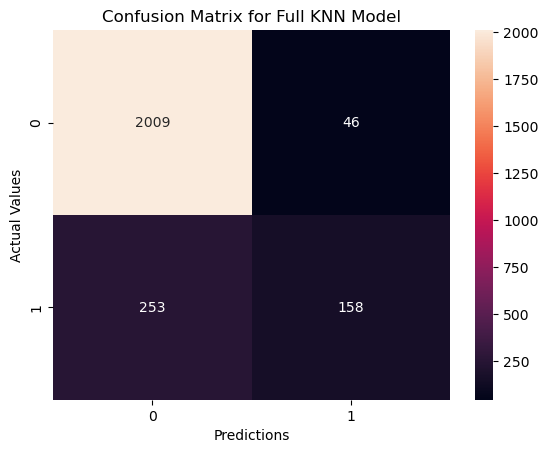

In [329]:
sns.heatmap(confusion_matrix(y_true=ytest,y_pred=ytestPredicted_knn_full_final),annot=True,fmt='g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix for Full KNN Model")
plt.show()

So here,<br>
0 - Negative or No Transaction and 1 - Positive or Yes Transaction<br>
**True Positive** = 158 (The Model has correctly predicted Customers who **made** the Transaction)<br>
**True Negatives** = 2009 (The model has correctly predicted Customers who **NOT** made the Transaction)<br>
**False Positives**= 46 (The Model has **incorrectly predicted** as **YES** Transaction but Actually the customer **NOT** made the Transaction)<br>
**False Negtives** = 253 (The Model has **incorrectly predicted** that Customer **NOT** made the Transaction but Actually the customer **made** the Transaction)

The *High values of False Negatives* is **much concerning** as the model is **Over Predicting** Customers as NO Transaction even though they have made the transaction

In [330]:
TP_knn_full_final = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_knn_full_final)[1,1]
TN_knn_full_final =confusion_matrix(y_true=ytest,y_pred=ytestPredicted_knn_full_final)[0,0]
FP_knn_full_final = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_knn_full_final)[0,1]
FN_knn_full_final = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_knn_full_final)[1,0]

### Accuracy = Correctly Predicted Values/All Values



In [331]:
(TP_knn_full_final + TN_knn_full_final )/ (TP_knn_full_final + TN_knn_full_final +FP_knn_full_final +FN_knn_full_final)


0.8787510137875101

### Classification Report

In [332]:
print(classification_report(ytest,ytestPredicted_knn_full_final))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2055
           1       0.77      0.38      0.51       411

    accuracy                           0.88      2466
   macro avg       0.83      0.68      0.72      2466
weighted avg       0.87      0.88      0.86      2466



The Recall for YES Transaction here is **super LOW** just 0.38 worse than a 50-50 Classifier. <br>
There is also **significant difference** between Precision of **YES TRANSACTION (0.77)** and Precision of **NO TRANSACTION (0.89)**<br>
The **F1-Score** for YES Transaction is **quite low (0.51)** <br><br>

Overall, this means that our model is *very well able to classify NO Transaction* but is **poorly classifying the YES Transaction**. i.e correctly identify customers who made a purchase on Cliffords'Website.
<br>
<br>
**Lets Complete the Model Evaluation for the Full Scale Best N KNN Model**


### ROC Curve

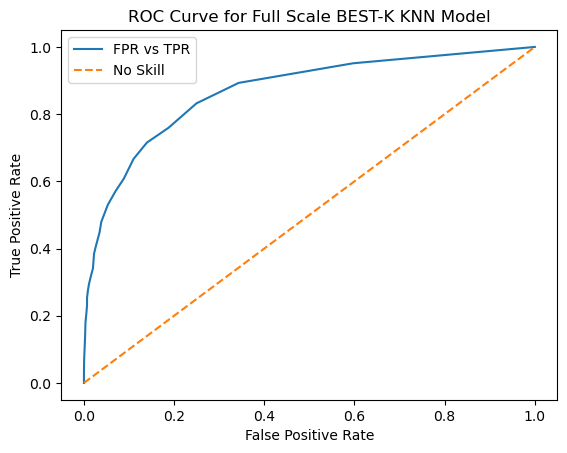

In [333]:
fpr_knn_full_final,tpr_knn_full_final, threshold_knn_full_final = roc_curve(ytest,knn_full_final.predict_proba(XtestScaled)[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr_knn_full_final,tpr_knn_full_final,label="FPR vs TPR")
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Full Scale BEST-K KNN Model")
plt.legend()
plt.show()

### Area Under the Curve

In [334]:
roc_auc_score(ytest,ytestPredicted_knn_full_final)

0.681021897810219

### Model Summary of BEST N Full Scale KNN Model

**BEST N Full Scale KNN Model**

1. Model Accuracy = 87.87% *(Good)*
2. High False Negatives = 253  *Model is unable to capture YES Transactions*
3. For **NO Transactions** - *Very High Precision, Recall and F1-Score* <br>
    3.1 Precision 0.89   <br>
    3.2 Recall 0.98<br>
    3.3 F1-score   0.93
4. For **YES Transactions** - *Very Low Precision, Recall and F1-Score* <br>
    4.1 Precision 0.77   *Low*<br>
    4.2 Recall 0.38  *Poor*<br>
    4.3 F1-score   0.51  *Very Low*
5. AUC - 0.681 *Low*
<br><br>

Overall, this means that our  BEST N Full Scale KNN Model model is *very well able to classify NO Transaction* but is **poorly classifying the YES Transaction**. i.e poorly identify customers who made a purchase on Cliffords'Website.

       

## Decision Tree (Full)

###  Create the model/ Initialize the Decision Tree Object

Develop a full grown tree

In [335]:
full_dt = DecisionTreeClassifier()
full_dt.fit(Xtrain,ytrain)
full_dt

DecisionTreeClassifier()

### Get the Predicitions for the Training and Testing Data Set

In [336]:
yTrainPredicted_full_dt =  full_dt.predict(Xtrain)
yTestPredicted_full_dt =  full_dt.predict(Xtest)

yTrainPredicted_full_dt.size,yTestPredicted_full_dt.size


(9864, 2466)

### Find the Accuracy score for TrainPredicitions and Test Predictions

In [337]:
print("Accuracy Score (train):", accuracy_score(y_pred=yTrainPredicted_full_dt,y_true= ytrain))
print("Accuracy Score (test):",accuracy_score(y_pred=yTestPredicted_full_dt,y_true= ytest))


Accuracy Score (train): 0.9996958637469586
Accuracy Score (test): 0.8552311435523114


#### Clear sense of Overfitting could be deduced from this results

### Visualize the Tree

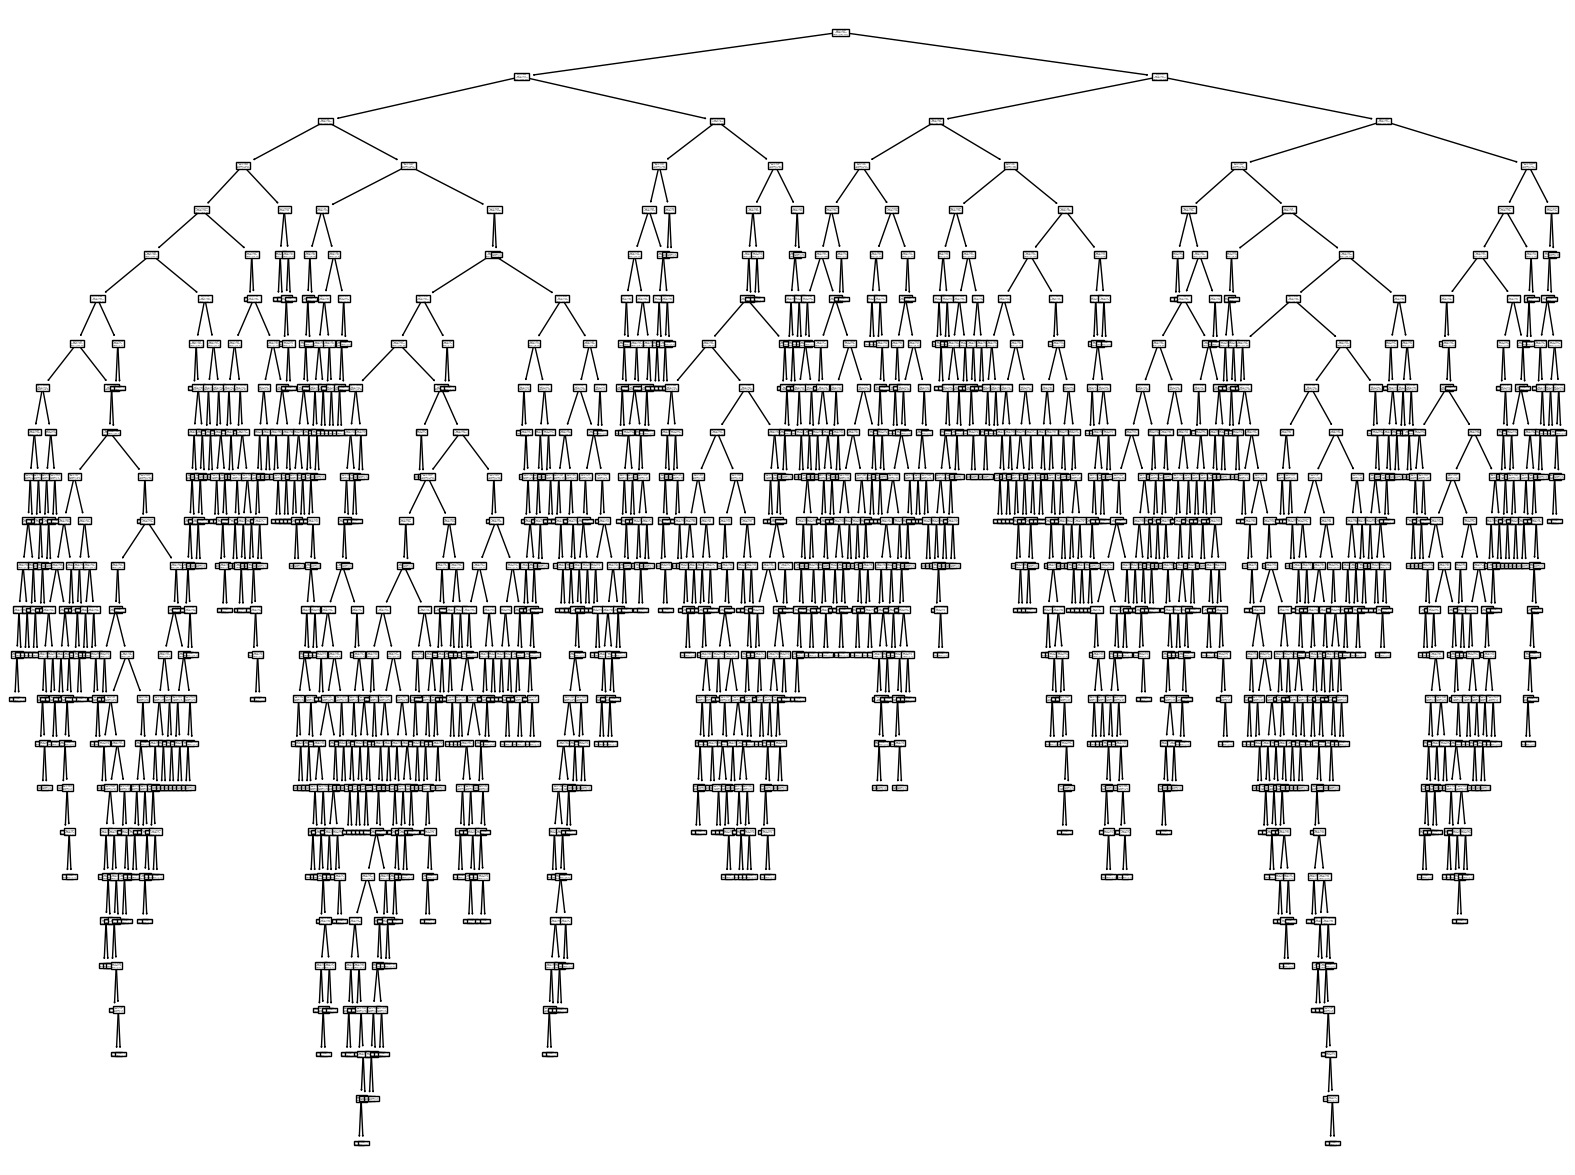

In [338]:
plt.figure(figsize=(20,15))
plot_tree(full_dt)
plt.show()

**We now need to generalize / prune the tree** <br>
Find the perfect depth of the tree.

In [339]:
Accuracy_dict_DT = {
    "N":[],
    "train_acc" : [],
    "test_acc" :[]
}
accuracy_df_full_dt=pd.DataFrame(Accuracy_dict_DT)
accuracy_df_full_dt

Empty DataFrame
Columns: [N, train_acc, test_acc]
Index: []

In [340]:
for i in range(1,20):
    new_row=[]
    dt_full_dt = DecisionTreeClassifier(random_state=1,max_depth=i)
    dt_full_dt.fit(Xtrain,ytrain)
    yTrainPredicted_full_dt_ =  dt_full_dt.predict(Xtrain)
    yTestPredicted_full_dt_ =  dt_full_dt.predict(Xtest)
    new_row.append(i)
    new_row.append(accuracy_score(y_true=ytrain,y_pred=yTrainPredicted_full_dt_))
    new_row.append(accuracy_score(y_true=ytest,y_pred=yTestPredicted_full_dt_))
    accuracy_df_full_dt.loc[len(accuracy_df_full_dt)] = new_row
accuracy_df_full_dt.head()

N  train_acc  test_acc
0  1.0   0.876723  0.872263
1  2.0   0.893958  0.876318
2  3.0   0.896796  0.879157
3  4.0   0.903893  0.881995
4  5.0   0.906427  0.880373

In [341]:
import plotly.express as px
fig = px.line(x = accuracy_df_full_dt["N"],y=[accuracy_df_full_dt["train_acc"],accuracy_df_full_dt['test_acc']])
fig["data"][0]["name"] ="Train Accuracy"
fig["data"][1]["name"] ="Test Accuracy"
fig.show()

### x = 4 is the best depth of the Tree trained on the All Columns 

Lets Try to train the BEST Depth Full Tree and Evaluate the Model

In [342]:
dt_full_final = DecisionTreeClassifier(random_state=1,max_depth=4)
dt_full_final.fit(Xtrain,ytrain)
yTrainPredicted_dt_full_final =  dt_full_final.predict(Xtrain)
yTestPredicted_dt_full_final =  dt_full_final.predict(Xtest)

### Visualise the BEST Depth Full Tree

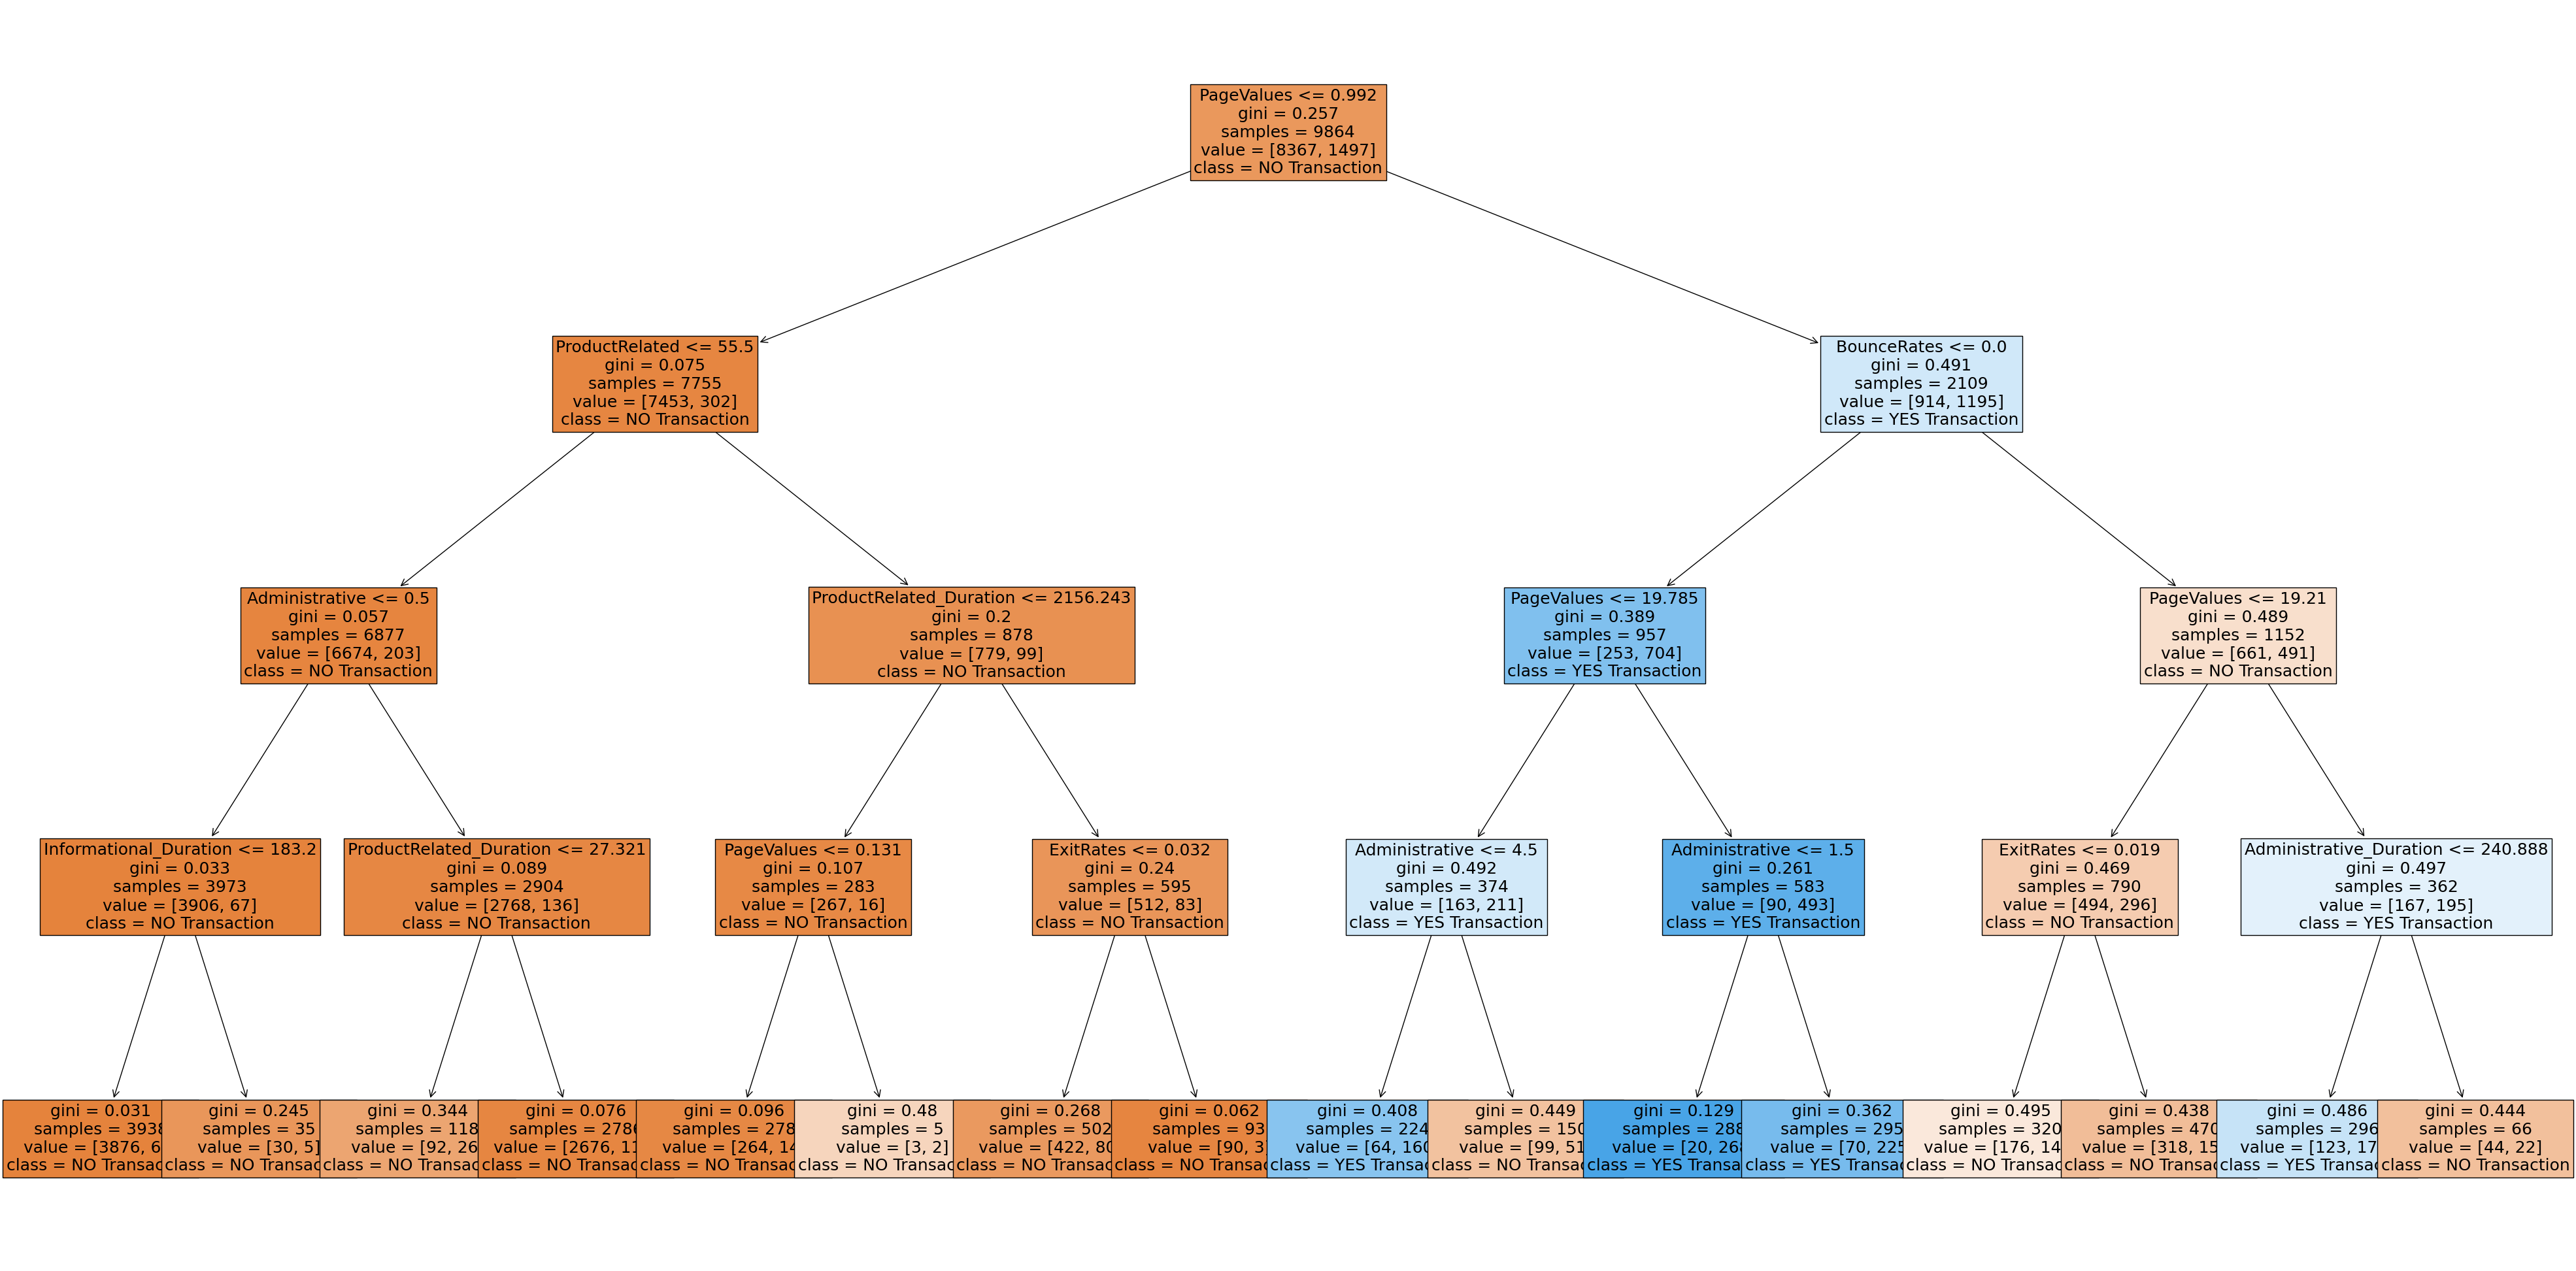

In [343]:
plt.figure(figsize=(50,25))
plot_tree(dt_full_final,feature_names=list(Xtrain.columns),filled=True,class_names=["NO Transaction","YES Transaction"],fontsize=18)
plt.show()

### Confusion Matrix

In [344]:
confusion_matrix(y_true=ytest,y_pred=yTestPredicted_dt_full_final)

array([[1972,   83],
       [ 208,  203]], dtype=int64)

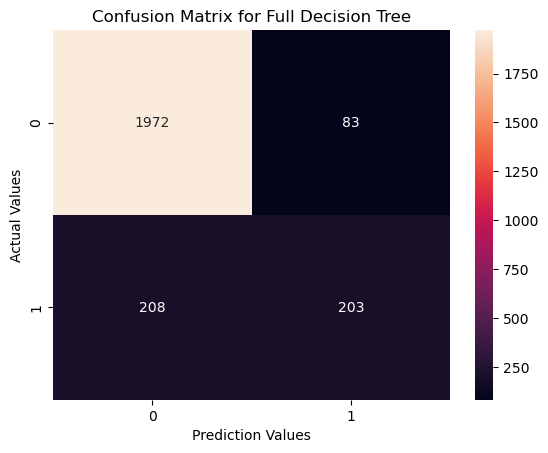

In [345]:
sns.heatmap(confusion_matrix(y_true=ytest,y_pred=yTestPredicted_dt_full_final),annot=True,fmt="g")
plt.xlabel("Prediction Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix for Full Decision Tree")
plt.show()

So here,<br>
0 - Negative or No Transaction and 1 - Positive or Yes Transaction<br>
**True Positive** = 203 (The Model has correctly predicted Customers who **made** the Transaction)<br>
**True Negatives** = 1972 (The model has correctly predicted Customers who **NOT** made the Transaction)<br>
**False Positives**= 83 (The Model has **incorrectly predicted** as **YES** Transaction but Actually the customer **NOT** made the Transaction)<br>
**False Negtives** = 208 (The Model has **incorrectly predicted** that Customer **NOT** made the Transaction but Actually the customer **made** the Transaction)

The *High values of False Negatives* is **much concerning** as the model is **Over Predicting** Customers as NO Transaction even though they have made the transaction

In [346]:
TP_full_dt = confusion_matrix(y_true=ytest,y_pred=yTestPredicted_dt_full_final)[1,1]
TN_full_dt =confusion_matrix(y_true=ytest,y_pred=yTestPredicted_dt_full_final)[0,0]
FP_full_dt = confusion_matrix(y_true=ytest,y_pred=yTestPredicted_dt_full_final)[0,1]
FN_full_dt = confusion_matrix(y_true=ytest,y_pred=yTestPredicted_dt_full_final)[1,0]

#### Accuracy = Correctly Predicted Values/All Values


In [347]:
(TP_full_dt + TN_full_dt )/ (TP_full_dt + TN_full_dt +FP_full_dt +FN_full_dt)

0.8819951338199513

### Classification Report

In [348]:
print(classification_report(y_true=ytest,y_pred=yTestPredicted_dt_full_final))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2055
           1       0.71      0.49      0.58       411

    accuracy                           0.88      2466
   macro avg       0.81      0.73      0.76      2466
weighted avg       0.87      0.88      0.87      2466



Even the **FULL DT** Is **unable to classify the YES Transaction** with *High Precision and High Recall*.<br> This Tree needs to be improved.

The Recall for YES Transaction here is **super LOW** just 0.49 *similar* than a 50-50 Classifier. <br>
There is also **significant difference** between Precision of **YES TRANSACTION (0.71)** and Precision of **NO TRANSACTION (0.9)**<br>
The **F1-Score** for YES Transaction is **quite low (0.58)** <br><br>

Overall, this means that our model is *very well able to classify NO Transaction* but is **poorly classifying the YES Transaction**. i.e correctly identify customers who made a purchase on Cliffords'Website.
<br>
<br>
**Lets Complete the Model Evaluation for the Full Scale Best Depth Decision Tree**


### Finding the Feature Importance or Significance

In [349]:
dt_full_final.feature_importances_

array([0.03170617, 0.00592976, 0.        , 0.00097663, 0.0093989 ,
       0.00875109, 0.08719713, 0.00752461, 0.8485157 , 0.        ,
       0.        , 0.        ])

In [350]:
pd.DataFrame({
    "Feature":Xtrain.columns,
    "Importance":dt_full_final.feature_importances_
})

Feature  Importance
0            Administrative    0.031706
1   Administrative_Duration    0.005930
2             Informational    0.000000
3    Informational_Duration    0.000977
4            ProductRelated    0.009399
5   ProductRelated_Duration    0.008751
6               BounceRates    0.087197
7                 ExitRates    0.007525
8                PageValues    0.848516
9                SpecialDay    0.000000
10       VisitorType Status    0.000000
11           Weekend Status    0.000000

### ROC Curve

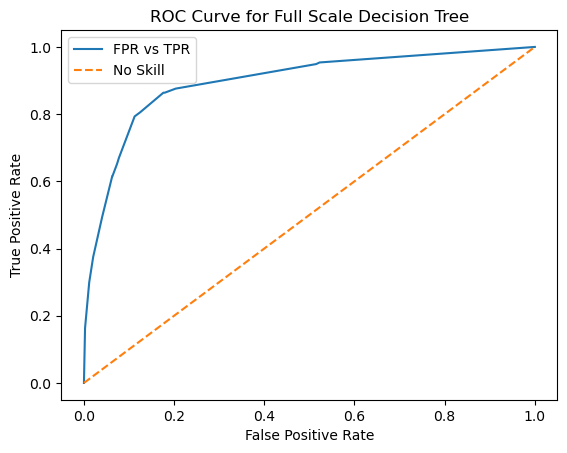

In [351]:
fpr_full_dt,tpr_full_dt, threshold_full_dt = roc_curve(ytest,dt_full_final.predict_proba(Xtest)[:,1])
plt.plot(fpr_full_dt,tpr_full_dt,label="FPR vs TPR")
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Full Scale Decision Tree")
plt.legend()
plt.show()

### AUC Score

In [352]:
roc_auc_score(ytest,yTestPredicted_dt_full_final)

0.7267639902676399

### Model Summary of  Full Scale BEST Depth Decision Tree Model

**Full Scale BEST Depth Decision Tree Model**

1. Model Accuracy = 88.19% *(Good)*
2. High False Negatives = 208  *Model is unable to capture YES Transactions*
3. For **NO Transactions** - *Very High Precision, Recall and F1-Score* <br>
    3.1 Precision 0.90   <br>
    3.2 Recall 0.96<br>
    3.3 F1-score   0.93
4. For **YES Transactions** - *Very Low Precision, Recall and F1-Score* <br>
    4.1 Precision 0.71   *Low*<br>
    4.2 Recall 0.49  *Poor*<br>
    4.3 F1-score   0.58  *Very Low*
5. AUC - 0.7261 *Low*
<br><br>

Overall, this means that our  BEST Depth Full Scale Decision Tree model is *very well able to classify NO Transaction* but is **poorly classifying the YES Transaction**. i.e poorly identify customers who made a purchase on Cliffords'Website.

       

## MODEL COMPARISION Full LOGR &harr; Full KNN &harr; Full DT

<table border="1">
  <tr>
    <th>Comparision</th>
    <th>Full LogR</th>
    <th>Full Scale BEST-K KNN</th>
    <th>Full Scale BEST-Depth DT</th>
  </tr>
  <tr>
    <td>Model Accuracy</td>
    <td>87.18%</td>
    <td>87.87%</td>
      <td style="font-weight: bold">88.19% </td>
  </tr>
  <tr>
    <td>False Negatives</td>
    <td>265</td>
    <td>253</td>
    <td style="font-weight: bold">208</td>
  </tr>
   <tr>
    <td>False Positives</td>
    <td>51</td>
    <td style="font-weight: bold">46</td>
    <td >83</td>
  </tr>
  <tr>
    <td>Precision (NO)</td>
    <td>0.88</td>
    <td>0.89</td>
    <td style="font-weight: bold">0.90</td>
  </tr>
  <tr>
    <td>Recall (NO)</td>
    <td style="font-weight: bold">0.98</td>
    <td style="font-weight: bold">0.98</td>
    <td>0.96</td>
  </tr>
  <tr>
    <td>F1-Score (NO)</td>
    <td style="font-weight: bold">0.93</td>
    <td style="font-weight: bold">0.93</td>
    <td style="font-weight: bold">0.93</td>
  </tr>
  <tr>
    <td>Precision (YES)</td>
    <td>0.74</td>
    <td style="font-weight: bold">0.77</td>
    <td>0.71</td>
  </tr>
  <tr>
    <td>Recall (YES)</td>
    <td>0.36</td>
    <td>0.38</td>
    <td style="font-weight: bold">0.49</td>
  </tr>
  <tr>
    <td>F1-Score (YES)</td>
    <td>0.48</td>
    <td>0.51</td>
    <td style="font-weight: bold">0.58</td>
  </tr>
  <tr>
    <td>AUC Score</td>
    <td>0.665</td>
    <td>0.685</td>
    <td style="font-weight: bold">0.726</td>
  </tr>
</table>


Overall, the **Full Scale BEST DEPTH Decision Tree** has an **edge** over the other predictive Models.

## LIMITATIONS OF FULL SCALED MODEL

<h3>Points For Improvements OR Pin-Points</h3>
<br>

**Pin 1** : Full Scale model <br><br>
**Impact** : Takes into account **non contributing variables** having *minimal impact* on the target varaible - SKEWING the model results.<br>
**Resolution** : *Removing non-significant varaibles* those having **multi-collinearity** or those **having less significance in Logistic Regression**.<br><br>

**Pin 1.1** : Re Train the Model with Best Threshold <br>
**Impact & Resolution** : Would Further Accept the YES Transaction and Boost the Recall and F1-Score for the YES  transaction <br><br>


**PIN 2** : Imbalance in Training Data set <br><br>
**Impact** : *Over Trains on the NO Transaction* and *over predicts NO Transaction*. **Under Trains on YES Transaction** and **under predicts YES Transaction** leading to **low precision, recall and f1-score** for YES Transaction <br>
**Resolution** : Training the Model with **50%-50% of YES and NO** Transaction records.<br>



### Lets Transform our Models from Full Scale &rarr;  Reduced 

## Log Reg Model (Reduced) 

### Find Which Variables are Insignificant

In [353]:
log_reg_model = sm.GLM(ytrain, sm.add_constant(Xtrain), family=sm.families.Binomial()).fit()
log_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Transaction Status   No. Observations:                 9864
Model:                            GLM   Df Residuals:                     9851
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2915.8
Date:                Tue, 05 Dec 2023   Deviance:                       5831.7
Time:                        22:47:23   Pearson chi2:                 4.35e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2292
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.8175      0.102    -17.841      0.000      -2.017      -1.618
Administrative             -0.0015      0.012     -0.121      0.903      -0.026       0.023
Administrative_Duration    -0.0002      0.000     -1.017      0.309      -0.001       0.000
Informational               0.0645      0.029      2.197      0.028       0.007       0.122
Informational_Duration     -0.0002      0.000     -0.723      0.470      -0.001       0.000
ProductRelated              0.0032      0.001      2.533      0.011       0.001       0.006
ProductRelated_Duration  5.873e-05   2.98e-05      1.973      0.048    3.97e-07       0.000
BounceRates                -1.4879      3.542     -0.420      0.674      -8.430       5.454
ExitRates                 -16.6350      2.686     -6.193      0.000     -21.899     -11.371
PageValues                  0.0802      0.003     30.517      0.000       0.075       0.085
SpecialDay                 -1.1722      0.271     -4.328      0.000      -1.703      -0.641
VisitorType Status         -0.3353      0.094     -3.575      0.000      -0.519      -0.151
Weekend Status              0.1361      0.079      1.716      0.086      -0.019       0.292
===========================================================================================
"""

 **['Administrative','Informational_Duration','Administrative_Duration', 'BounceRates',"Weekend Status"]** posesss very less Significance.<br>
p-value > 0.05

#### We shall remove them from our Xtrain and Then Re-train All types of Predictive Models

In [354]:
XtrainR = Xtrain.drop(columns = ['Administrative','Informational_Duration','Administrative_Duration', 'BounceRates',"Weekend Status"])
XtestR = Xtest.drop(columns = ['Administrative','Informational_Duration','Administrative_Duration', 'BounceRates',"Weekend Status"])
XtrainR.head()

Informational  ProductRelated  ProductRelated_Duration  ExitRates  \
1785               0               7                95.000000   0.061905   
10407              0              81              1441.910588   0.013933   
286                0               1                 0.000000   0.200000   
6520               4               5                74.600000   0.018182   
12251              1               9               279.000000   0.041667   

       PageValues  SpecialDay  VisitorType Status  
1785     0.000000         0.0                   1  
10407    2.769599         0.0                   1  
286      0.000000         0.0                   1  
6520     8.326728         0.0                   0  
12251    0.000000         0.0                   0

In [355]:
XtestR.head()

Informational  ProductRelated  ProductRelated_Duration  ExitRates  \
8916               0              48              1052.255952   0.013043   
772                2              83              2503.881781   0.004916   
12250              0             126              4310.004668   0.012823   
7793               0              10               606.666667   0.026389   
6601               6             168              4948.398759   0.013528   

       PageValues  SpecialDay  VisitorType Status  
8916     0.000000         0.0                   1  
772      2.086218         0.0                   1  
12250    3.451072         0.0                   1  
7793    36.672294         0.0                   1  
6601    10.150644         0.0                   1

### Initiating the Log Reg Model

In [356]:
reduced_logR = LogisticRegression()

### Fitting the Reduced Data into Log Model

In [357]:
reduced_logR.fit(XtrainR, ytrain)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

### Make Predictions using the Reduced Log Model

In [358]:
ytrain_predicted_reduced_logR = reduced_logR.predict(XtrainR)
ytrain_predicted_prob_reduced_logR = reduced_logR.predict_proba(XtrainR)
ytest_predicted_reduced_logR = reduced_logR.predict(XtestR)
ytest_predicted_prob_reduced_logR = reduced_logR.predict_proba(XtestR)

print("Accuracy Score (train):", accuracy_score(y_pred=ytrain_predicted_reduced_logR,y_true= ytrain))
print("Accuracy Score (test):",accuracy_score(y_pred=ytest_predicted_reduced_logR,y_true= ytest))


Accuracy Score (train): 0.889294403892944
Accuracy Score (test): 0.8690186536901865


### Confusion Matrix for Full Scale Log R Model

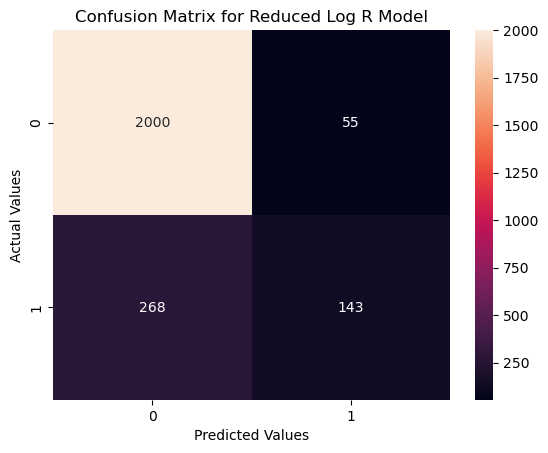

In [359]:
sns.heatmap(confusion_matrix(ytest, ytest_predicted_reduced_logR), annot = True,  fmt = 'g')
plt.xlabel('Predicted Values') 
plt.ylabel('Actual Values')
plt.title("Confusion Matrix for Reduced Log R Model")
plt.show()


So here,<br>
0 - Negative or No Transaction and 1 - Positive or Yes Transaction<br>
**True Positive** = 149 (The Model has correctly predicted Customers who **made** the Transaction)<br>
**True Negatives** = 2000 (The model has correctly predicted Customers who **NOT** made the Transaction)<br>
**False Positives**= 55 (The Model has **incorrectly predicted** as **YES** Transaction but Actually the customer **NOT** made the Transaction)<br>
**False Negtives** = 262 (The Model has **incorrectly predicted** that Customer **NOT** made the Transaction but Actually the customer **made** the Transaction)

The *High values of False Negatives* is **much concerning** as the model is **Over Predicting** Customers as NO Transaction even though they have made the transaction

In [360]:
TP_reduced_logR = confusion_matrix(ytest, ytest_predicted_reduced_logR)[1,1]
TN_reduced_logR =confusion_matrix(ytest, ytest_predicted_reduced_logR)[0,0]
FP_reduced_logR = confusion_matrix(ytest, ytest_predicted_reduced_logR)[0,1]
FN_reduced_logR = confusion_matrix(ytest, ytest_predicted_reduced_logR)[1,0]

### Accuracy = Correctly Predicted Values/All Values



In [361]:
(TP_reduced_logR + TN_reduced_logR )/ (TP_reduced_logR + TN_reduced_logR +FP_reduced_logR +FN_reduced_logR)


0.8690186536901865

### Classification Report

In [362]:
print(classification_report(ytest, ytest_predicted_reduced_logR))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      2055
           1       0.72      0.35      0.47       411

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466



The Recall for YES Transaction here is **still super LOW** just 0.36 worse than a 50-50 Classifier. <br>
There is also **still significant difference** between Precision of **YES TRANSACTION (0.73)** and Precision of **NO TRANSACTION (0.88)**<br>
The **F1-Score** for YES Transaction is **still quite low (0.48)** <br><br>

Overall, this means that our model is *very well able to classify NO Transaction* but is **poorly classifying the YES Transaction**. i.e correctly identify customers who made a purchase on Cliffords'Website.
<br>
<br>
**Lets Complete the Model Evaluation for the Reduced LogR Model**

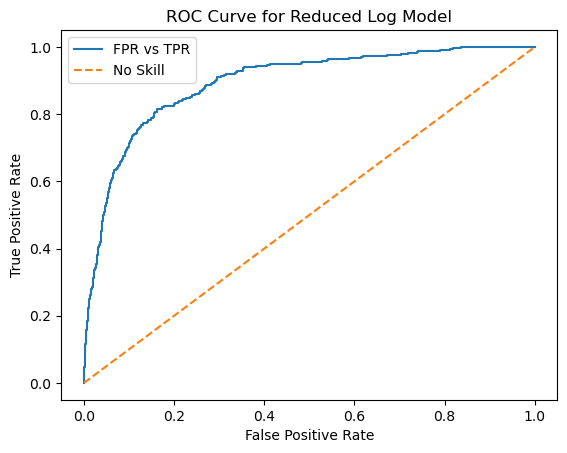

In [363]:
fpr_reduced_logR,tpr_reduced_logR, threshold_reduced_logR = roc_curve(ytest,reduced_logR.predict_proba(XtestR)[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr_reduced_logR,tpr_reduced_logR,label="FPR vs TPR")
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Reduced Log Model")
plt.legend()
plt.show()

### AUC Score

In [364]:
roc_auc_score(ytest,ytest_predicted_reduced_logR)

0.6605839416058393

### Model Summary of Reduced Log Reg

**Reduced Log Model Summary**

1. Model Accuracy = 87.14% *(Good)*
2. High False Negatives = 262  *Model is unable to capture YES Transactions*
3. For **NO Transactions** - *Very High Precision, Recall and F1-Score* <br>
    3.1 Precision 0.88   <br>
    3.2 Recall 0.97<br>
    3.3 F1-score   0.93
4. For **YES Transactions** - *Very Low Precision, Recall and F1-Score* <br>
    4.1 Precision 0.73   *Low*<br>
    4.2 Recall 0.36  *Poor*<br>
    4.3 F1-score   0.48  *Very Low*
5. AUC - 0.667 *Low*
<br><br>
 
Overall, this means that our Reduced model is *very well able to classify NO Transaction* but is **poorly classifying the YES Transaction**. i.e correctly identify customers who made a purchase on Cliffords'Website.

         

## MODEL COMPARISION Full LogR vs Reduced LogR

<table border="1">
  <tr>
    <th>Comparision</th>
    <th>Full LogR</th>
    <th>Reduced - LogR</th>
  </tr>
  <tr>
    <td>Model Accuracy</td>
    <td style="font-weight: bold">87.18%</td>
    <td>87.14%</td>
      
  </tr>
  <tr>
    <td>False Negatives</td>
    <td>265</td>
    <td style="font-weight: bold">262</td>
   
  </tr>
    <tr>
    <td>False Positives</td>
    <td style="font-weight: bold">51</td>
    <td >55</td>
   
  </tr>
  <tr>
    <td>Precision (NO)</td>
    <td>0.88</td>
    <td>0.88</td>

  </tr>
  <tr>
    <td>Recall (NO)</td>
    <td style="font-weight: bold">0.98</td>
    <td>0.97</td>
     </tr>
  <tr>
    <td>F1-Score (NO)</td>
    <td style="font-weight: bold">0.93</td>
    <td style="font-weight: bold">0.93</td>
    
  </tr>
  <tr>
    <td>Precision (YES)</td>
    <td style="font-weight: bold">0.74</td>
    <td >0.73</td>
     </tr>
  <tr>
    <td>Recall (YES)</td>
    <td>0.36</td>
    <td>0.36</td>
    
  </tr>
  <tr>
    <td>F1-Score (YES)</td>
    <td>0.48</td>
    <td>0.48</td>
    
  </tr>
  <tr>
    <td>AUC Score</td>
    <td>0.665</td>
    <td style="font-weight: bold">0.667</td>
   
  </tr>
</table>


The Full Scale and the Reduced LogR Model are behaving quite Similar to one another. Not much Difference. <br>
However, the Reduced LogR &rarr; Maintains the Same Precision, Recall and F1-Score with a **little improvement** in over predicitons of FN & increasing AUC than the Full Scale Model

## KNN Model (Reduced)

### Scale the Reduced Data for KNN Model

In [365]:
scaler_knn = StandardScaler() # Create a scaler object
scaler_knn.fit(XtrainR)       # using the fit function I will provide the base mean and standard deviation to the object
XtrainScaledR = scaler_knn.transform(XtrainR) # Now the values for the XtrainR has been scaled

In [366]:
XtestScaledR = scaler_knn.transform(XtestR) # Now the values for the XtestR has been scaled

###  Create the KNN model 

Choosing a random k = 2

In [367]:
# Create the object of the KNeighboursClassifier with the 
reduced_knn = KNeighborsClassifier(n_neighbors=2)
reduced_knn

KNeighborsClassifier(n_neighbors=2)

###  Train the model on the Xtrain 

In [368]:
reduced_knn.fit(XtrainScaledR,ytrain)

KNeighborsClassifier(n_neighbors=2)

###  Make the predictions on the Xtrain and Xtest data

In [369]:
ytrainPredicted_reduced_knn = reduced_knn.predict(XtrainScaledR) # Store the predictions from the model on the train dataset
ytestPredicted_reduced_knn = reduced_knn.predict(XtestScaledR) # Store the predictions from the model on the test dataset

### Check the Accuracy on the Xtrain and Xtest data

In [370]:
print("Accuracy Score (train):", accuracy_score(y_pred=ytrainPredicted_reduced_knn,y_true= ytrain))
print("Accuracy Score (test):",accuracy_score(y_pred=ytestPredicted_reduced_knn,y_true= ytest))


Accuracy Score (train): 0.9274128142741281
Accuracy Score (test): 0.8653690186536902


### Now we will run a loop for 1-50 for a value of K=1 to K-50

In [371]:
Accuracy_dict_reduced_knn = {
    "N":[],
    "train_acc" : [],
    "test_acc" :[]
}
accuracy_df_reduced_knn=pd.DataFrame(Accuracy_dict_reduced_knn)
accuracy_df_reduced_knn

Empty DataFrame
Columns: [N, train_acc, test_acc]
Index: []

In [372]:
for i in range(1,50):
    new_row = []
    reduced_knn_ = KNeighborsClassifier(n_neighbors=i)
    reduced_knn_.fit(XtrainScaled,ytrain)
    ytrainPredicted_reduced_knn_ = reduced_knn_.predict(XtrainScaled) # Store the predictions from the model on the train dataset
    ytestPredicted_reduced_knn_ = reduced_knn_.predict(XtestScaled) # Store the predictions from the model on the test dataset
    new_row.append(i)
    new_row.append(accuracy_score(y_true=ytrain,y_pred=ytrainPredicted_reduced_knn_))
    new_row.append(accuracy_score(y_true=ytest,y_pred=ytestPredicted_reduced_knn_))
    accuracy_df_reduced_knn.loc[len(accuracy_df_reduced_knn)] = new_row
    
accuracy_df_reduced_knn.head()

N  train_acc  test_acc
0  1.0   0.999696  0.844282
1  2.0   0.928325  0.871857
2  3.0   0.926399  0.873479
3  4.0   0.911598  0.877129
4  5.0   0.914538  0.875912

In [373]:
fig = px.line(x = accuracy_df_reduced_knn["N"],y=[accuracy_df_reduced_knn["train_acc"],accuracy_df_reduced_knn['test_acc']],labels={"variable":"Accuracy Type","value":"Accuracy"})
fig["data"][0]["name"] ="Train Accuracy"
fig["data"][1]["name"] ="Test Accuracy"
fig.show()

## The Model has the best test and train accuracy at Neighbour = 11 k= 11 is our Best Model.

### Retraining the BEST-K KNN For Reduced Data

In [374]:
reduced_knn_final = KNeighborsClassifier(n_neighbors=11)
reduced_knn_final.fit(XtrainScaledR,ytrain)
ytestPredicted_reduced_knn_final = reduced_knn_final.predict(XtestScaledR)

### Accuracy Score

In [375]:
accuracy_score(y_true=ytest,y_pred=ytestPredicted_reduced_knn_final)*100

87.87510137875101

### Confusion Matrix

In [376]:
confusion_matrix(y_true=ytest,y_pred=ytestPredicted_reduced_knn_final)

array([[1973,   82],
       [ 217,  194]], dtype=int64)

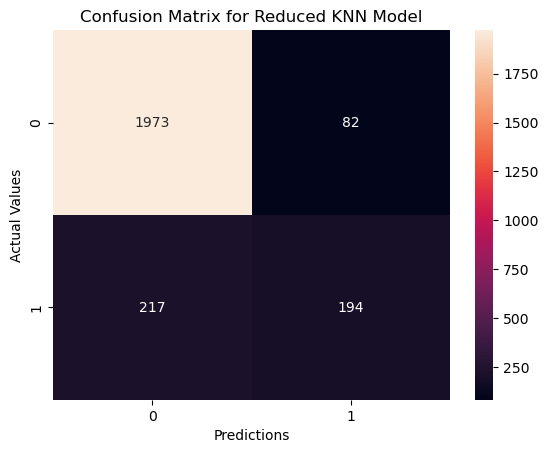

In [377]:
sns.heatmap(confusion_matrix(y_true=ytest,y_pred=ytestPredicted_reduced_knn_final),annot=True,fmt='g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix for Reduced KNN Model")
plt.show()

So here,<br>
0 - Negative or No Transaction and 1 - Positive or Yes Transaction<br>
**True Positive** = 194 (The Model has correctly predicted Customers who **made** the Transaction)<br>
**True Negatives** = 1973 (The model has correctly predicted Customers who **NOT** made the Transaction)<br>
**False Positives**= 82 (The Model has **incorrectly predicted** as **YES** Transaction but Actually the customer **NOT** made the Transaction)<br>
**False Negtives** = 217 (The Model has **incorrectly predicted** that Customer **NOT** made the Transaction but Actually the customer **made** the Transaction)

The *High values of False Negatives* is **much concerning** as the model is **Over Predicting** Customers as NO Transaction even though they have made the transaction

In [378]:
TP_reduced_knn_final = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_reduced_knn_final)[1,1]
TN_reduced_knn_final =confusion_matrix(y_true=ytest,y_pred=ytestPredicted_reduced_knn_final)[0,0]
FP_reduced_knn_final = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_reduced_knn_final)[0,1]
FN_reduced_knn_final = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_reduced_knn_final)[1,0]

### Accuracy = Correctly Predicted Values/All Values



In [379]:
(TP_reduced_knn_final + TN_reduced_knn_final )/ (TP_reduced_knn_final + TN_knn_full_final +FP_reduced_knn_final +FN_reduced_knn_final)


0.8661071143085531

### Classification Report

In [380]:
print(classification_report(ytest,ytestPredicted_reduced_knn_final))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2055
           1       0.70      0.47      0.56       411

    accuracy                           0.88      2466
   macro avg       0.80      0.72      0.75      2466
weighted avg       0.87      0.88      0.87      2466



The Recall for YES Transaction here is **still LOW** just 0.47 worse than a 50-50 Classifier. <br>
There is also **still significant difference** between Precision of **YES TRANSACTION (0.70)** and Precision of **NO TRANSACTION (0.90)**<br>
The **F1-Score** for YES Transaction is **still low (0.56)** <br><br>

Overall, this means that our model is *very well able to classify NO Transaction* but is **poorly classifying the YES Transaction**. i.e correctly identify customers who made a purchase on Cliffords'Website.
<br>
Overall, **recall and F1-Score have improved slightly then the full model**
<br>
**Lets Complete the Model Evaluation for the Reduced Best N KNN Model**


### ROC Curve

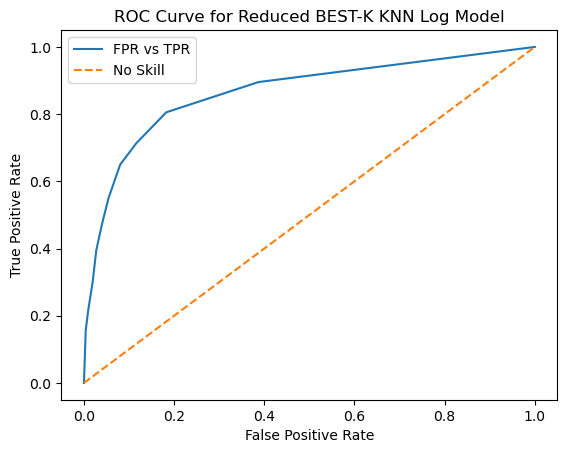

In [381]:
fpr_reduced_knn_final,tpr_reduced_knn_final, threshold_reduced_knn_final = roc_curve(ytest,reduced_knn_final.predict_proba(XtestScaledR)[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr_reduced_knn_final,tpr_reduced_knn_final,label="FPR vs TPR")
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Reduced BEST-K KNN Log Model")
plt.legend()
plt.show()

### Area Under the Curve

In [382]:
roc_auc_score(ytest,ytestPredicted_reduced_knn_final)

0.7160583941605839

### Model Summary of BEST-K Reduced KNN Model

**BEST N Full Scale KNN Model**

1. Model Accuracy = 87.87% *(Good)*
2. High False Negatives = 253  *Model is unable to capture YES Transactions*
3. For **NO Transactions** - *Very High Precision, Recall and F1-Score* <br>
    3.1 Precision 0.89   <br>
    3.2 Recall 0.98<br>
    3.3 F1-score   0.93
4. For **YES Transactions** - *Very Low Precision, Recall and F1-Score* <br>
    4.1 Precision 0.77   *Low*<br>
    4.2 Recall 0.38  *Poor*<br>
    4.3 F1-score   0.51  *Very Low*
5. AUC - 0.681 *Low*
<br><br>

Overall, this means that our  BEST N Full Scale KNN Model model is *very well able to classify NO Transaction* but is **poorly classifying the YES Transaction**. i.e poorly identify customers who made a purchase on Cliffords'Website.

       

**BEST-K Reduced KNN Model**

1. Model Accuracy = 87.87% *(Good)*
2. High False Negatives = 217  *Model is unable to capture YES Transactions*
3. For **NO Transactions** - *Very High Precision, Recall and F1-Score* <br>
    3.1 Precision 0.90 <br>
    3.2 Recall 0.96<br>
    3.3 F1-score   0.93
4. For **YES Transactions** - *Very Low Precision, Recall and F1-Score* <br>
    4.1 Precision 0.70   *Low*<br>
    4.2 Recall 0.47  *Poor*<br>
    4.3 F1-score   0.56  *Very Low*
5. AUC - 0.716 *Low*
<br><br>

Overall, this means that our  BEST N Reduced KNN Model model is *very well able to classify NO Transaction* but is **poorly classifying the YES Transaction**. i.e poorly identify customers who made a purchase on Cliffords'Website.


## MODEL COMPARISION Full KNN vs Reduced KNN

<table border="1">
  <tr>
    <th>Comparision</th>
    <th>Full KNN</th>
    <th>Reduced - KNN</th>
  </tr>
  <tr>
    <td>Model Accuracy</td>
    <td>87.87%</td>
    <td>87.87%</td>
      
  </tr>
  <tr>
    <td>False Negatives</td>
    <td>253</td>
    <td style="font-weight: bold">217</td>
   
  </tr>
    <tr>
    <td>False Positives</td>
    <td style="font-weight: bold">46</td>
    <td >82</td>
   
  </tr>
  <tr>
    <td>Precision (NO)</td>
    <td >0.89</td>
    <td style="font-weight: bold">0.90</td>

  </tr>
  <tr>
    <td>Recall (NO)</td>
    <td>0.98</td>
    <td>0.96</td>
     </tr>
  <tr>
    <td>F1-Score (NO)</td>
    <td>0.93</td>
    <td>0.93</td>
    
  </tr>
  <tr>
    <td>Precision (YES)</td>
    <td style="font-weight: bold">0.74</td>
    <td >0.73</td>
     </tr>
  <tr>
    <td>Recall (YES)</td>
    <td>0.38</td>
    <td style="font-weight: bold">0.47</td>
    
  </tr>
  <tr>
    <td>F1-Score (YES)</td>
    <td>0.51</td>
    <td style="font-weight: bold">0.56</td>
    
  </tr>
  <tr>
    <td>AUC Score</td>
    <td>0.681</td>
    <td style="font-weight: bold">0.716</td>
   
  </tr>
</table>


In a nutshell,
The Full Scale and the Reduced KNN Model are behaving quite Similar to one another. But the Reduced KNN is **little Better**. <br>
However, the **Reduced KNN** is better than *Full KNN* in terms of <br>
&rarr; Less over predicitons of FN <br>
&rarr; Increase in Recall (YES)<br>
&rarr; Increase in F1-Score (YES) <br>
&rarr; Increase in Precision (NO) <br>
&rarr; increasing AUC <br>than the Full Scale Model

## Decision Tree (Reduced)

###  Create the model/ Initialize the Decision Tree Object

Develop a Reduced Data but full depth grown tree

In [383]:
reduced_dt = DecisionTreeClassifier()
reduced_dt.fit(XtrainR,ytrain)
reduced_dt

DecisionTreeClassifier()

### Get the Predicitions for the Training and Testing Data Set

In [384]:
yTrainPredicted_reduced_dt =  reduced_dt.predict(XtrainR)
yTestPredicted_reduced_dt =  reduced_dt.predict(XtestR)

yTrainPredicted_reduced_dt.size,yTestPredicted_reduced_dt.size


(9864, 2466)

### Find the Accuracy score for TrainPredicitions and Test Predictions

In [385]:
print("Accuracy Score (train):", accuracy_score(y_pred=yTrainPredicted_reduced_dt,y_true= ytrain))
print("Accuracy Score (test):",accuracy_score(y_pred=yTestPredicted_reduced_dt,y_true= ytest))


Accuracy Score (train): 0.9991889699918897
Accuracy Score (test): 0.8491484184914841


#### Clear sense of Overfitting could be deduced from this results

### Visualize the Tree

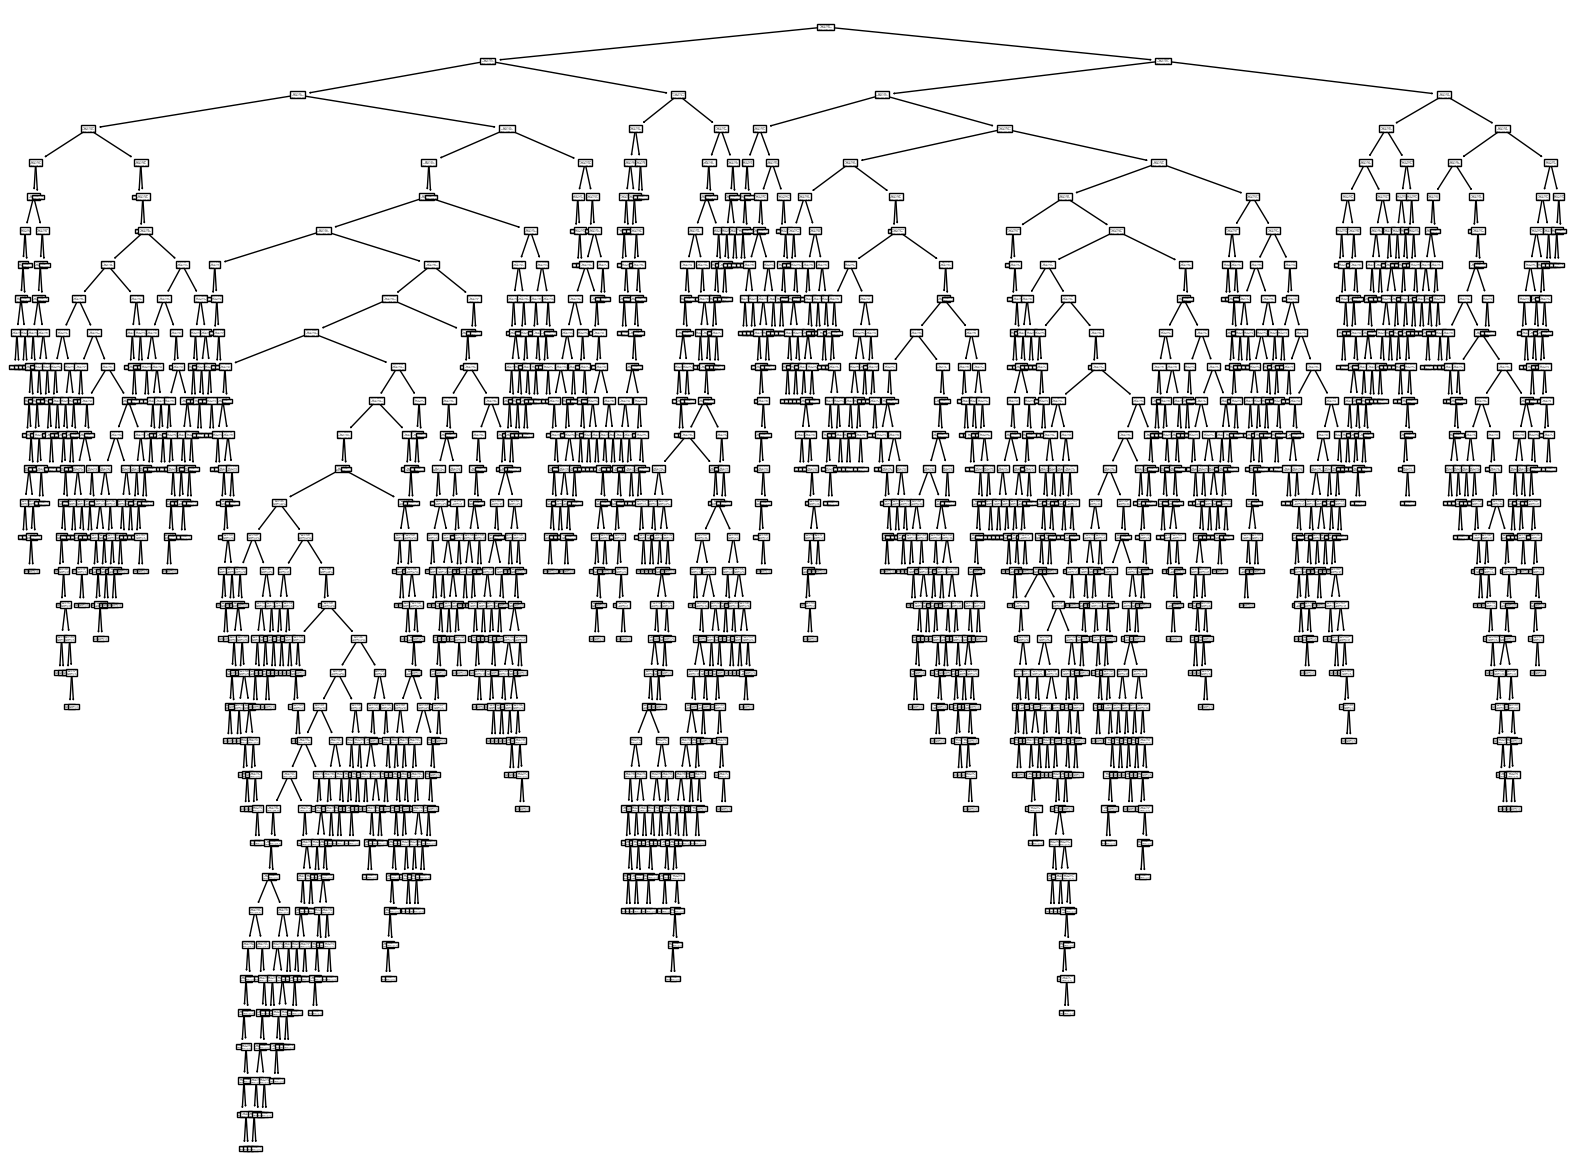

In [386]:
plt.figure(figsize=(20,15))
plot_tree(reduced_dt)
plt.show()

**We now need to generalize / prune the tree** <br>
Find the perfect depth of the tree.

In [387]:
Accuracy_dict_reduced_dt = {
    "N":[],
    "train_acc" : [],
    "test_acc" :[]
}
accuracy_df_reduced_dt=pd.DataFrame(Accuracy_dict_reduced_dt)
accuracy_df_reduced_dt

Empty DataFrame
Columns: [N, train_acc, test_acc]
Index: []

In [388]:
for i in range(1,20):
    new_row=[]
    dt_reduced_dt = DecisionTreeClassifier(random_state=1,max_depth=i)
    dt_reduced_dt.fit(Xtrain,ytrain)
    yTrainPredicted_reduced_dt =  dt_reduced_dt.predict(Xtrain)
    yTestPredicted_reduced_dt =  dt_reduced_dt.predict(Xtest)
    new_row.append(i)
    new_row.append(accuracy_score(y_true=ytrain,y_pred=yTrainPredicted_reduced_dt))
    new_row.append(accuracy_score(y_true=ytest,y_pred=yTestPredicted_reduced_dt))
    accuracy_df_reduced_dt.loc[len(accuracy_df_reduced_dt)] = new_row
accuracy_df_reduced_dt.head()

N  train_acc  test_acc
0  1.0   0.876723  0.872263
1  2.0   0.893958  0.876318
2  3.0   0.896796  0.879157
3  4.0   0.903893  0.881995
4  5.0   0.906427  0.880373

In [389]:
import plotly.express as px
fig = px.line(x = accuracy_df_reduced_dt["N"],y=[accuracy_df_reduced_dt["train_acc"],accuracy_df_reduced_dt['test_acc']])
fig["data"][0]["name"] ="Train Accuracy"
fig["data"][1]["name"] ="Test Accuracy"
fig.show()

### x = 7 is the best depth of the Tree trained on the Reduced Columns

Lets Try to train the BEST Depth Reduced Tree and Evaluate the Model

In [390]:
dt_reduced_dt = DecisionTreeClassifier(random_state=1,max_depth=7)
dt_reduced_dt.fit(XtrainR,ytrain)
yTrainPredicted_dt_reduced_dt =  dt_reduced_dt.predict(XtrainR)
yTestPredicted_dt_reduced_dt =  dt_reduced_dt.predict(XtestR)

### Visualise the BEST Depth But Reduced Tree

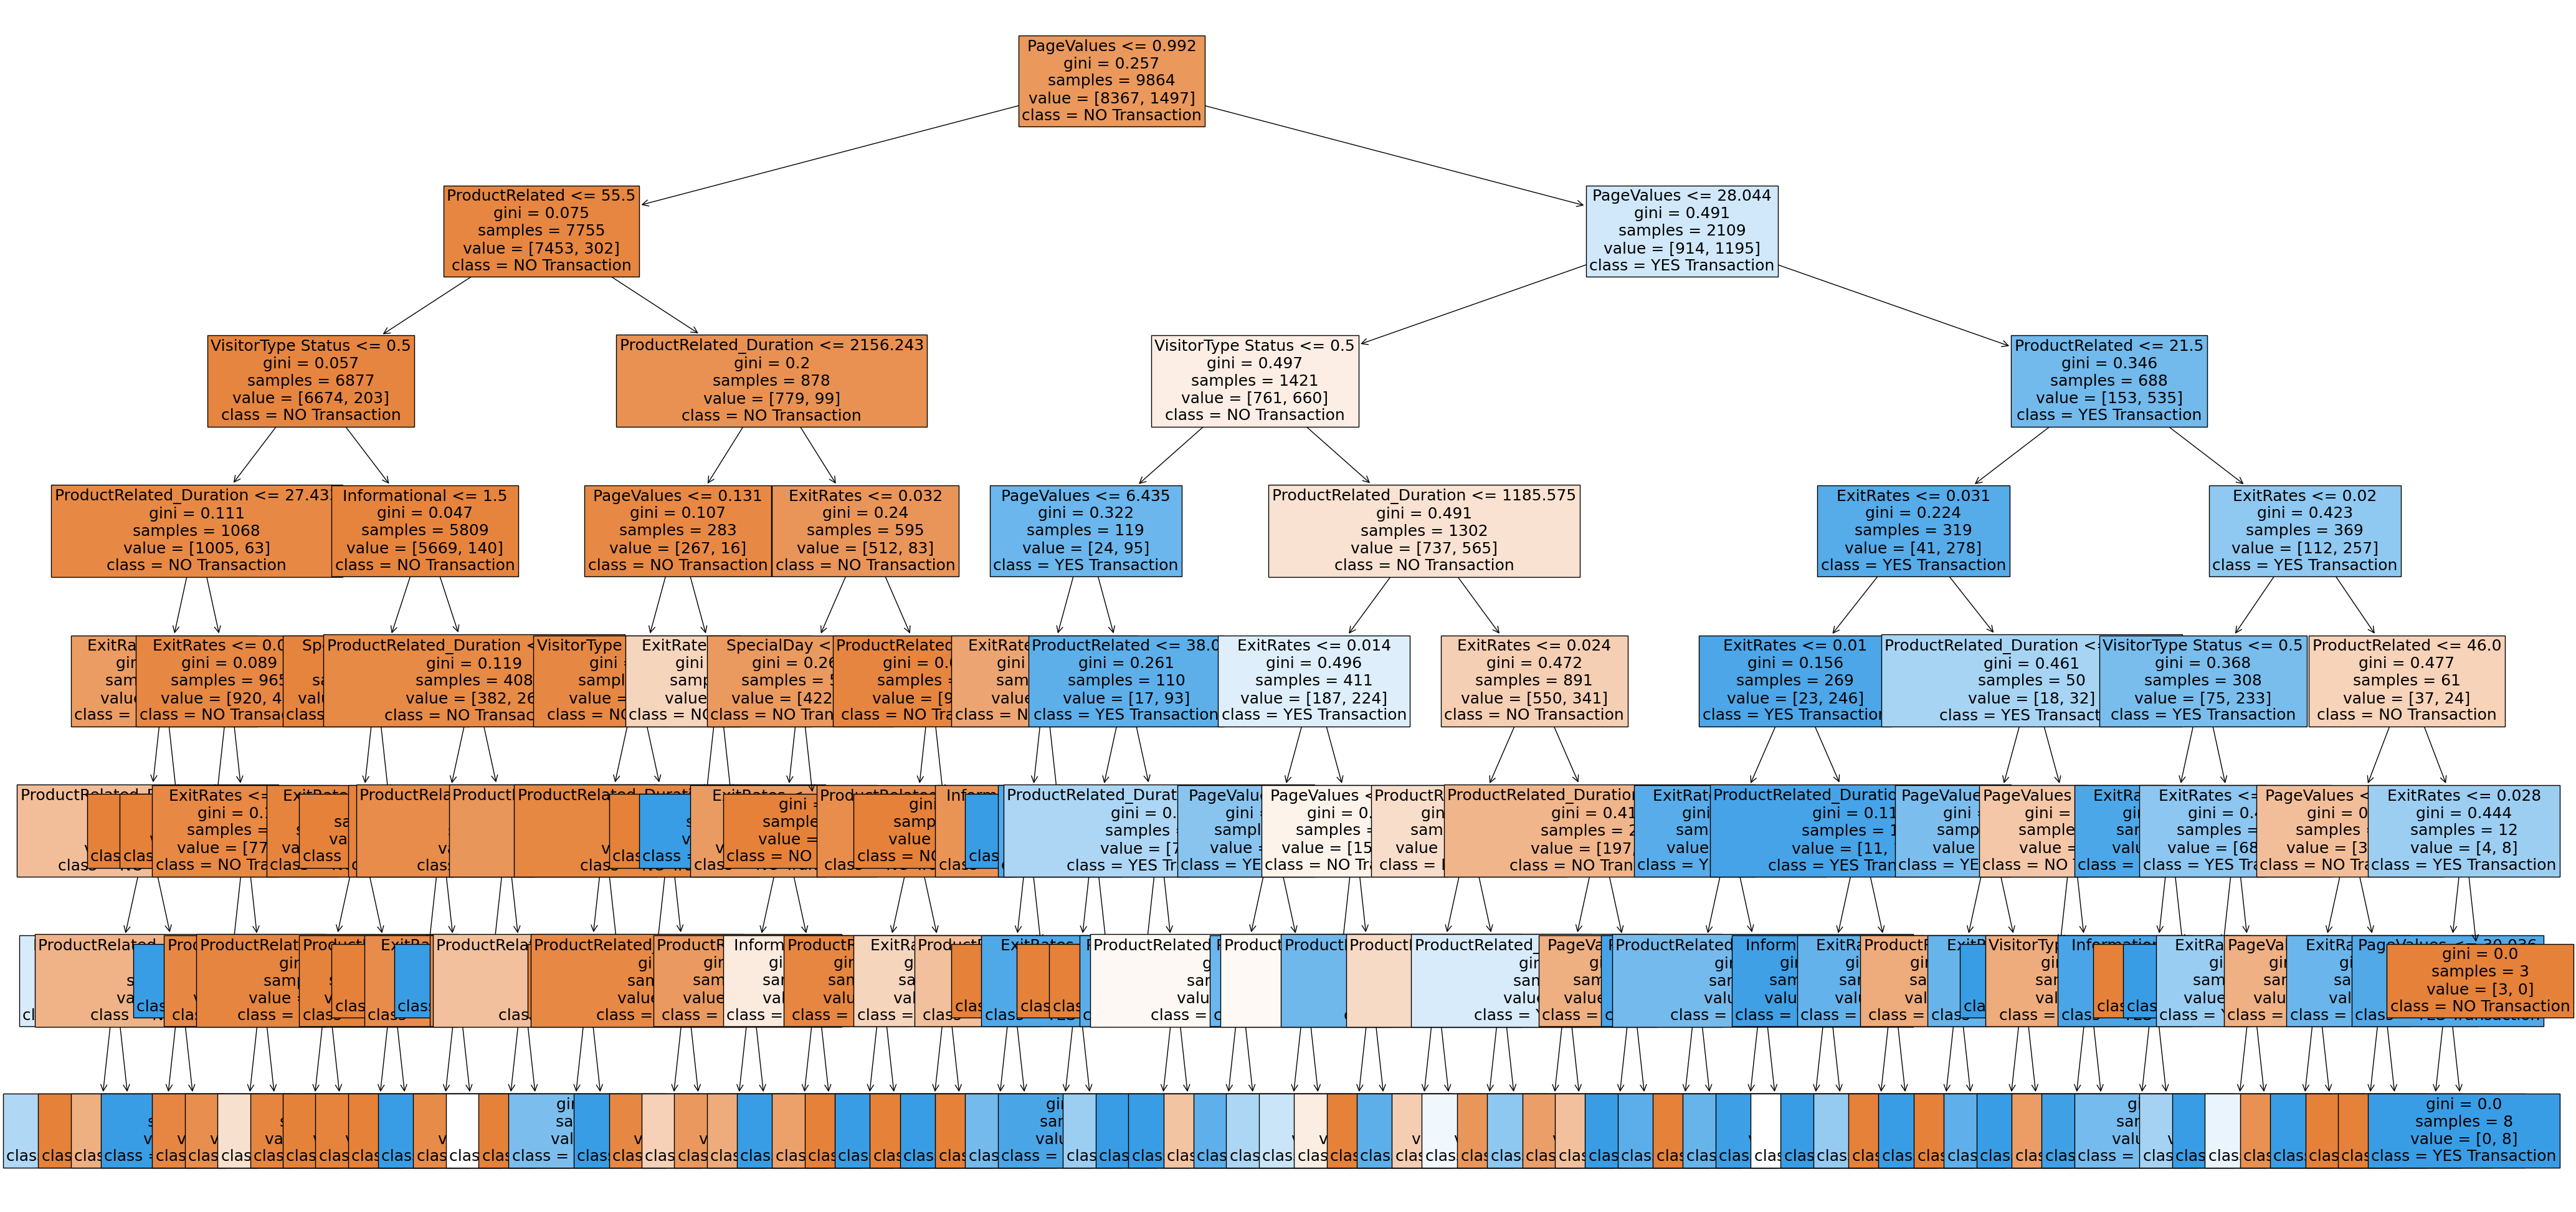

In [391]:
plt.figure(figsize=(50,25))
plot_tree(dt_reduced_dt,feature_names=list(XtrainR.columns),filled=True,class_names=["NO Transaction","YES Transaction"],fontsize=18)
plt.show()

### Confusion Matrix

In [392]:
confusion_matrix(y_true=ytest,y_pred=yTestPredicted_dt_reduced_dt)

array([[1977,   78],
       [ 197,  214]], dtype=int64)

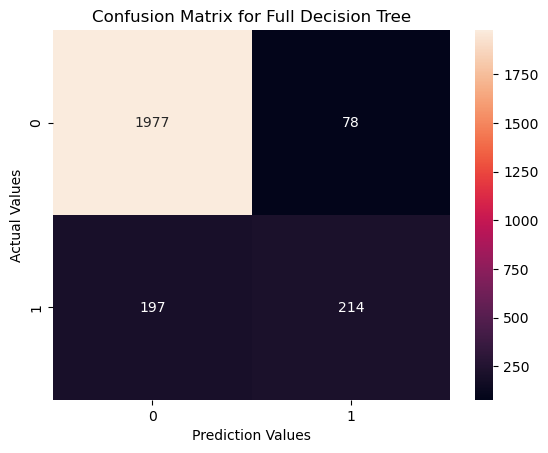

In [393]:
sns.heatmap(confusion_matrix(y_true=ytest,y_pred=yTestPredicted_dt_reduced_dt),annot=True,fmt="g")
plt.xlabel("Prediction Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix for Full Decision Tree")
plt.show()

So here,<br>
0 - Negative or No Transaction and 1 - Positive or Yes Transaction<br>
**True Positive** = 214 (The Model has correctly predicted Customers who **made** the Transaction)<br>
**True Negatives** = 1977 (The model has correctly predicted Customers who **NOT** made the Transaction)<br>
**False Positives**= 78 (The Model has **incorrectly predicted** as **YES** Transaction but Actually the customer **NOT** made the Transaction)<br>
**False Negtives** = 197 (The Model has **incorrectly predicted** that Customer **NOT** made the Transaction but Actually the customer **made** the Transaction)

The *High values of False Negatives* is **much concerning** as the model is **Over Predicting** Customers as NO Transaction even though they have made the transaction

In [394]:
TP_dt_reduced_dt = confusion_matrix(y_true=ytest,y_pred=yTestPredicted_dt_reduced_dt)[1,1]
TN_dt_reduced_dt =confusion_matrix(y_true=ytest,y_pred=yTestPredicted_dt_reduced_dt)[0,0]
FP_dt_reduced_dt = confusion_matrix(y_true=ytest,y_pred=yTestPredicted_dt_reduced_dt)[0,1]
FN_dt_reduced_dt = confusion_matrix(y_true=ytest,y_pred=yTestPredicted_dt_reduced_dt)[1,0]

#### Accuracy = Correctly Predicted Values/All Values


In [395]:
(TP_dt_reduced_dt + TN_dt_reduced_dt )/ (TP_dt_reduced_dt + TN_dt_reduced_dt +FP_dt_reduced_dt +FN_dt_reduced_dt)

0.8884833738848338

### Classification Report

In [396]:
print(classification_report(y_true=ytest,y_pred=yTestPredicted_dt_reduced_dt))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2055
           1       0.73      0.52      0.61       411

    accuracy                           0.89      2466
   macro avg       0.82      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466



Even the **Reduced DT** Is **unable to better classify the YES Transaction** with *High Precision and High Recall*.<br> This Tree needs to be improved.

The Recall for YES Transaction here is **super LOW** just 0.52 *a little better* than a 50-50 Classifier. <br>
There is also ** still significant difference** between Precision of **YES TRANSACTION (0.73)** and Precision of **NO TRANSACTION (0.91)**<br>
The **F1-Score** for YES Transaction is **quite low (0.61)** <br><br>

Overall, this means that our model is *very well able to classify NO Transaction* but is **poorly classifying the YES Transaction**. i.e correctly identify customers who made a purchase on Cliffords'Website.
<br>
<br>
**Lets Complete the Model Evaluation for the Reduced Best Depth Decision Tree**


### Finding the Feature Importance or Significance

In [397]:
dt_reduced_dt.feature_importances_

array([0.00611547, 0.02887759, 0.05061364, 0.0604334 , 0.8222181 ,
       0.00207366, 0.02966814])

In [398]:
pd.DataFrame({
    "Feature":XtrainR.columns,
    "Importance":dt_reduced_dt.feature_importances_
})

Feature  Importance
0            Informational    0.006115
1           ProductRelated    0.028878
2  ProductRelated_Duration    0.050614
3                ExitRates    0.060433
4               PageValues    0.822218
5               SpecialDay    0.002074
6       VisitorType Status    0.029668

### ROC Curve

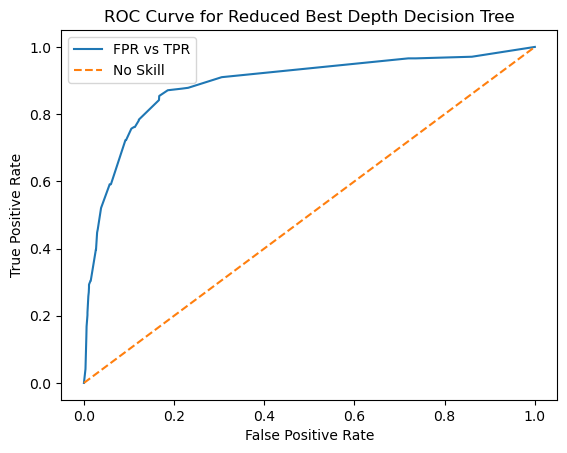

In [399]:
fpr_dt_reduced_dt,tpr_dt_reduced_dt, threshold_dt_reduced_dt = roc_curve(ytest,dt_reduced_dt.predict_proba(XtestR)[:,1])
plt.plot(fpr_dt_reduced_dt,tpr_dt_reduced_dt,label="FPR vs TPR")
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Reduced Best Depth Decision Tree")
plt.legend()
plt.show()

### AUC Score

In [400]:
roc_auc_score(ytest,yTestPredicted_dt_reduced_dt)

0.7413625304136253

### Model Summary of Reduced BEST Depth Decision Tree Model

**Reduced BEST Depth Decision Tree Model**

1. Model Accuracy = 88.88% *(Good)*
2. High False Negatives = 197  *Model is unable to capture YES Transactions*
3. For **NO Transactions** - *Very High Precision, Recall and F1-Score* <br>
    3.1 Precision 0.91   <br>
    3.2 Recall 0.96<br>
    3.3 F1-score   0.93
4. For **YES Transactions** - *Low Precision, Recall and F1-Score* <br>
    4.1 Precision 0.73   *Low*<br>
    4.2 Recall 0.52  *Low*<br>
    4.3 F1-score   0.61  *Low*
5. AUC - 0.7413 *Okay*
<br>
It is evident that overall *it seems that Reduced is performing a little Better than the Full DT*
<br>

Overall, this means that our  BEST Depth Reduced Decision Tree model is *very well able to classify NO Transaction* but is **still poorly classifying the YES Transaction**. i.e poorly identify customers who made a purchase on Cliffords'Website.

       

## MODEL COMPARISION Full DT vs Reduced DT

<table border="1">
  <tr>
    <th>Comparision</th>
    <th>Full DT</th>
    <th>Reduced - DT</th>
  </tr>
  <tr>
    <td>Model Accuracy</td>
    <td>88.19%</td>
    <td style="font-weight: bold">88.88%</td>
      
  </tr>
  <tr>
    <td>False Negatives</td>
    <td>208</td>
    <td style="font-weight: bold">197</td>
   
  </tr>
    <tr>
    <td>False Positives</td>
    <td>83</td>
    <td style="font-weight: bold">78</td>
   
  </tr>
  <tr>
    <td>Precision (NO)</td>
    <td >0.90</td>
    <td style="font-weight: bold">0.91</td>

  </tr>
  <tr>
    <td>Recall (NO)</td>
    <td>0.96</td>
    <td>0.96</td>
     </tr>
  <tr>
    <td>F1-Score (NO)</td>
    <td>0.93</td>
    <td>0.93</td>
    
  </tr>
  <tr>
    <td>Precision (YES)</td>
    <td >0.71</td>
    <td style="font-weight: bold">0.73</td>
     </tr>
  <tr>
    <td>Recall (YES)</td>
    <td>0.49</td>
    <td style="font-weight: bold">0.52</td>
    
  </tr>
  <tr>
    <td>F1-Score (YES)</td>
    <td>0.58</td>
    <td style="font-weight: bold">0.61</td>
    
  </tr>
  <tr>
    <td>AUC Score</td>
    <td>0.7261</td>
    <td style="font-weight: bold">0.7413</td>
   
  </tr>
</table>


In a nutshell,
The Full Scale and the Reduced DT Model are behaving quite Similar to one another. But the Reduced DT is **Better**. <br>
However, the **Reduced DT** is **better** than *Full DT* in terms of <br>
&rarr; Higher Accuracy<br>
&rarr; Less over predicitons of FN <br>
&rarr; Increase in Precision(NO) <br>
&rarr; Increase in Recall (YES)<br>
&rarr; Increase in F1-Score (YES) <br>
&rarr; Increase in AUC <br>than the Full Scale Model

## MODEL COMPARISION Reduced LOGR - Reduced KNN - Reduced DT

<table border="1">
  <tr>
    <th>Comparision</th>
    <th>Reduced LogR</th>
    <th>Reduced BEST-K KNN</th>
    <th>Reduced BEST-Depth DT</th>
  </tr>
  <tr>
    <td>Model Accuracy</td>
    <td>87.14%</td>
    <td>87.87%</td>
      <td style="font-weight: bold">88.88% </td>
  </tr>
  <tr>
    <td>False Negatives</td>
    <td>262</td>
    <td>217</td>
    <td style="font-weight: bold">197</td>
  </tr>
    <tr>
    <td>False Positives</td>
    <td style="font-weight: bold">55</td>
    <td>82</td>
    <td >78</td>
  </tr>
  <tr>
    <td>Precision (NO)</td>
    <td>0.88</td>
    <td>0.90</td>
    <td style="font-weight: bold">0.91</td>
  </tr>
  <tr>
    <td>Recall (NO)</td>
    <td style="font-weight: bold">0.97</td>
    <td>0.96</td>
    <td>0.96</td>
  </tr>
  <tr>
    <td>F1-Score (NO)</td>
    <td style="font-weight: bold">0.93</td>
    <td style="font-weight: bold">0.93</td>
    <td style="font-weight: bold">0.93</td>
  </tr>
  <tr>
    <td>Precision (YES)</td>
    <td >0.73</td>
    <td >0.70</td>
    <td style="font-weight: bold">0.73</td>
  </tr>
  <tr>
    <td>Recall (YES)</td>
    <td>0.36</td>
    <td>0.47</td>
    <td style="font-weight: bold">0.52</td>
  </tr>
  <tr>
    <td>F1-Score (YES)</td>
    <td>0.48</td>
    <td>0.56</td>
    <td style="font-weight: bold">0.61</td>
  </tr>
  <tr>
    <td>AUC Score</td>
    <td>0.667</td>
    <td>0.716</td>
    <td style="font-weight: bold">0.7413</td>
  </tr>
</table>


Overall, the **Reduced BEST DEPTH Decision Tree** has *quite an* **edge** over the other predictive Models.

## PROS AND CONS OF REDUCED MODEL

It has been evident that **Reduced Models** even after being *Simpler than the FULL Model* holds the capacity to *generate atleast same* but **better results** than their FULL Models.<br>
Still, the Reduced Models have **higher FN** which is concerning and **Lower Recall**. <br>
This means that the *reduced models* are **unable to predict** not all but most **YES Transactions Properly** to match up the recall and precision of NO Transaction. <br>
They are *still over trained* on **NO Transaction** resulting in **Lower Recall for (YES Transaction)**

**Pin 1.1** : Re Train the Model with Best Threshold <br>
**Impact & Resolution** : Would Further Accept the YES Transaction and Boost the Recall and F1-Score for the YES  transaction <br><br>


**PIN 2** : Imbalance in Training Data set <br><br>
**Impact** : *Over Trains on the NO Transaction* and *over predicts NO Transaction*. **Under Trains on YES Transaction** and **under predicts YES Transaction** leading to **low precision, recall and f1-score** for YES Transaction <br>
**Resolution** : Training the Model with **50%-50% of YES and NO** Transaction records.<br>


#### The Only thing we can do here is to retrian the model by adjusting the Threshold

## Log Reg Model (Best Threshold Model)

### Recap of the Reduced Log Model

In [401]:
print(classification_report(ytest, ytest_predicted_reduced_logR))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      2055
           1       0.72      0.35      0.47       411

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466



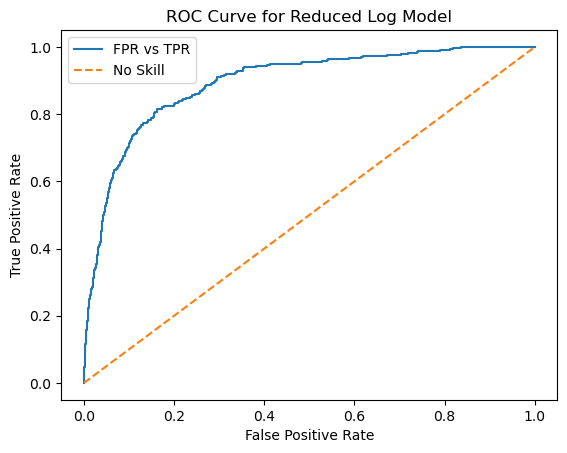

In [402]:
fpr_reduced_logR,tpr_reduced_logR, threshold_reduced_logR = roc_curve(ytest,reduced_logR.predict_proba(XtestR)[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr_reduced_logR,tpr_reduced_logR,label="FPR vs TPR")
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Reduced Log Model")
plt.legend()
plt.show()

### AUC Score

In [403]:
roc_auc_score(ytest,ytest_predicted_reduced_logR)

0.6605839416058393

### Finding Best Threshold

In [404]:
gmeans_log = np.sqrt(tpr_reduced_logR * (1-fpr_reduced_logR))


In [405]:
ix_log = np.argmax(gmeans_log)
ix_log

284

In [406]:
print('Best Threshold=%f, G-Mean=%.3f' % (threshold_reduced_logR[ix_log], gmeans_log[ix_log]))

Best Threshold=0.122371, G-Mean=0.826


The Best threshold here is still **0.1436**<br>
&rarr;The **reason behind less threshold** is we need to **reduce the Over False Negative Predictions** and *predict as much as True Positives* **minimally misclassify** under False Positives. <br>
&rarr;In layman's terms, Reducing Threshold **will relax our cap in prediciting YES Transaction** leading to *more predictions* turning as **YES Transaction** with a *minimal mis-identification of a NO Transaction as YES Transaction*

In [407]:
ytrainPredicted_threshold_reduced_logR = (reduced_logR.predict_proba(XtrainR)[:, 1] > threshold_reduced_logR[ix_log]).astype('float')

In [408]:
ytestPredicted_threshold_reduced_logR = (reduced_logR.predict_proba(XtestR)[:, 1] > threshold_reduced_logR[ix_log]).astype('float')

### Accuracy Score

In [409]:
accuracy_score(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_logR)*100

83.29278183292782

#### The Model is booming at an Accuracy  of 84.83%

### Confusion Matrix

In [410]:
confusion_matrix(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_logR)

array([[1720,  335],
       [  77,  334]], dtype=int64)

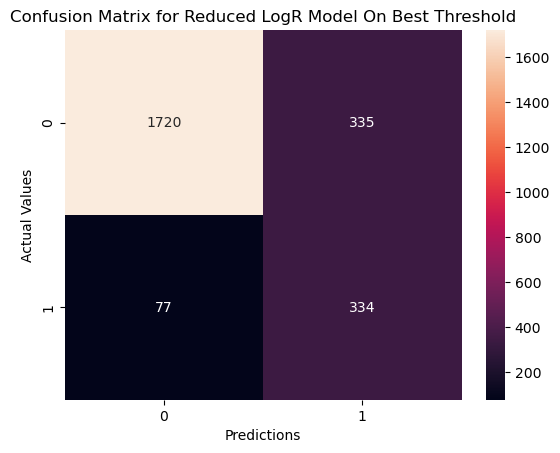

In [411]:
sns.heatmap(confusion_matrix(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_logR),annot=True,fmt='g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix for Reduced LogR Model On Best Threshold")
plt.show()

So here,<br>
0 - Negative or No Transaction and 1 - Positive or Yes Transaction<br>
**True Positive** = 317 (The Model has correctly predicted Customers who **made** the Transaction)<br>
**True Negatives** = 1775 (The model has correctly predicted Customers who **NOT** made the Transaction)<br>
**False Positives**= 280 (The Model has **incorrectly predicted** as **YES** Transaction but Actually the customer **NOT** made the Transaction)<br>
**False Negtives** = 94 (The Model has **incorrectly predicted** that Customer **NOT** made the Transaction but Actually the customer **made** the Transaction)

In [412]:
TP_threshold_reduced_logR = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_logR)[1,1]
TN_threshold_reduced_logR = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_logR)[0,0]
FP_threshold_reduced_logR = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_logR)[1,0]
FN_threshold_reduced_logR = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_logR)[0,1]

### Manual Calculation Of Accuracy

In [413]:
(TP_threshold_reduced_logR + TN_threshold_reduced_logR )/ (TP_threshold_reduced_logR + TN_threshold_reduced_logR +FP_threshold_reduced_logR +FN_threshold_reduced_logR)


0.8329278183292782

### Classification Report

In [414]:
print(classification_report(ytest,ytestPredicted_threshold_reduced_logR))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      2055
           1       0.50      0.81      0.62       411

    accuracy                           0.83      2466
   macro avg       0.73      0.82      0.76      2466
weighted avg       0.88      0.83      0.85      2466



The Recall for YES Transaction here **has improved from (0.36) to 0.77**<br>
There is also **significant difference** between Precision of **YES TRANSACTION (0.53)** and Precision of **NO TRANSACTION (0.95)**<br>
The **F1-Score** for YES Transaction **has improved (0.48) to  0.63** <br><br>

Overall, This is the **best recall and f1-score** that can be achieved using these parameters for Log R Model
<br>
<br>
**Lets Complete the Model Evaluation for the Reduced Best Threshold Reduced LogR Model**


### ROC Curve

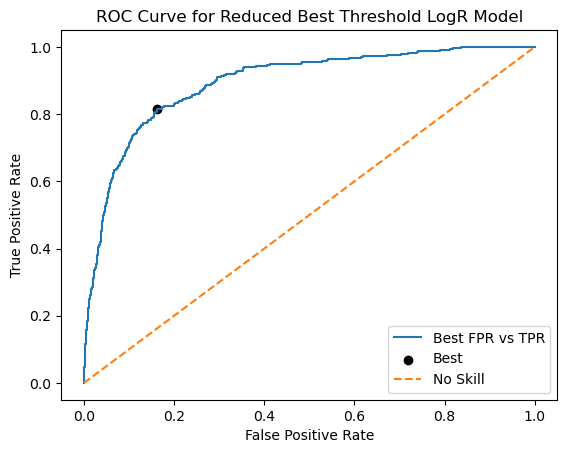

In [415]:
fpr_threshold_reduced_logR,tpr_threshold_reduced_logR, threshold_threshold_reduced_logR= roc_curve(ytest,reduced_logR.predict_proba(XtestR)[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr_threshold_reduced_logR,tpr_threshold_reduced_logR,label="Best FPR vs TPR")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Reduced Best Threshold LogR Model")
plt.scatter(fpr_threshold_reduced_logR[ix_log], tpr_threshold_reduced_logR[ix_log], marker='o', color='black', label='Best')
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.legend()
plt.show()


### Area Under the Curve 

In [416]:
roc_auc_score(ytest,ytestPredicted_threshold_reduced_logR)

0.8248175182481752

### Model Summary of BEST Threshold Reduced Log Reg

**BEST Threshold Reduced Log Reg Summary**

1. Model Accuracy = 84.83% *(Good)*
2. High False Negatives = 94  *Model is **now able** to capture YES Transactions*
3. For **NO Transactions** - *Very High Precision, Recall and F1-Score* <br>
    3.1 Precision 0.95   <br>
    3.2 Recall 0.86<br>
    3.3 F1-score   0.90
4. For **YES Transactions** - *Very Low Precision, Recall and F1-Score* <br>
    4.1 Precision 0.53   *Poor*<br>
    4.2 Recall 0.77  *Quite Good*<br>
    4.3 F1-score   0.63  *Better*
5. AUC - 0.8175 *Good*
<br><br>

Overall, this means that our Reduced model is **very well able to classify YES Transaction** and a *cost of incorrectly predicting No Transactions  &rarr; YES Transaction*

         

## MODEL COMPARISION Full LogR vs Reduced LogR vs Best Threshold LogR

<table border="1">
  <tr>
    <th>Comparision</th>
    <th>Full LogR</th>
    <th>Reduced - LogR</th>
     <th>Best Threshold - Reduced LogR</th>
  </tr>
  <tr>
    <td>Model Accuracy</td>
    <td style="font-weight: bold">87.18%</td>
    <td>87.14%</td>
    <td>84.83%</td>      
  </tr>
  <tr>
    <td>False Negatives</td>
    <td>265</td>
    <td>262</td>
    <td style="font-weight: bold">94</td>   
  </tr>
    <tr>
    <td>False Postives</td>
    <td style="font-weight: bold">51</td>
    <td >55</td>
    <td >280</td>   
  </tr>
  <tr>
    <td>Precision (NO)</td>
    <td>0.88</td>
    <td>0.88</td>
    <td style="font-weight: bold">0.95</td>
  </tr>
  <tr>
    <td>Recall (NO)</td>
    <td style="font-weight: bold">0.98</td>
    <td>0.97</td>
    <td>0.86</td>
  </tr>
  <tr>
    <td>F1-Score (NO)</td>
    <td style="font-weight: bold">0.93</td>
    <td style="font-weight: bold">0.93</td>
    <td>0.90</td>
    
  </tr>
  <tr>
    <td>Precision (YES)</td>
    <td style="font-weight: bold">0.74</td>
    <td >0.73</td>
    <td >0.53</td>
  </tr>
  <tr>
    <td>Recall (YES)</td>
    <td>0.36</td>
    <td>0.36</td>
    <td style="font-weight: bold">0.77</td>    
  </tr>
  <tr>
    <td>F1-Score (YES)</td>
    <td>0.48</td>
    <td>0.48</td>
    <td style="font-weight: bold">0.63</td>    
  </tr>
  <tr>
    <td>AUC Score</td>
    <td>0.665</td>
    <td>0.667</td>
    <td style="font-weight: bold">0.8175</td>   
  </tr>
</table>


**Reduced Model with Best Threshold Evaluation**<br>

There is quite an improvement in :
1. Recall(YES) : Full (0.36) &rarr; Reduced(0.36) &rarr; **Threshold Reduced [0.77]**
2. F1-Score (YES) Full (0.48) &rarr; Reduced(0.48) &rarr; **Threshold Reduced [0.63]**
3. AUC Score (YES) Full (0.665) &rarr; Reduced(0.667) &rarr; **Threshold Reduced [0.817]**

**Cost of Improvement** -  We are losing at certain Aspects : <br>
1. Bump in FPs  : Full (51) &rarr; Reduced(55) &rarr; **Threshold Reduced [280]**
2. Plummetting Precision (YES) : Full (0.74) &rarr; Reduced(0.73) &rarr; **Threshold Reduced [0.53]**
3. Overall Accuracy : Full (0.8718) &rarr; Reduced(0.8714) &rarr; **Threshold Reduced [0.8413]**

As the threshold of **0.143** is *very very* **Low** <br>
The concerning part here is that Log Model is classifying almost every **6 out of 7** clients as YES Transaction. Sometime the model is true as well. <br>
BUT The model is **making higher mistakes** too.. It is predicting NO Transaction Customers as YES Transaction<br>
This is **disastrous**. <br>
**Due to misclassifaction, Clifford shall miss out reaching out to those Customers Who are on the Edge of making a transaction but did not make a transaction by Classifying them as YES Transaction whereas in reality they did not make a purchase**

## KNN Model (Best Threshold Model)

### Recap of the Reduced KNN Model

In [417]:
print(classification_report(ytest,ytestPredicted_reduced_knn_final))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2055
           1       0.70      0.47      0.56       411

    accuracy                           0.88      2466
   macro avg       0.80      0.72      0.75      2466
weighted avg       0.87      0.88      0.87      2466



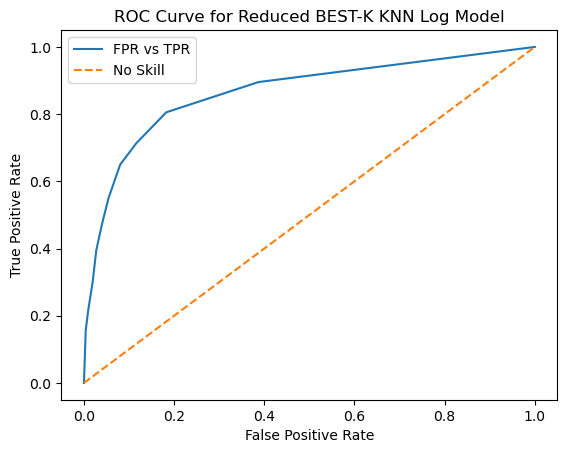

In [418]:
fpr_reduced_knn_final,tpr_reduced_knn_final, threshold_reduced_knn_final = roc_curve(ytest,reduced_knn_final.predict_proba(XtestScaledR)[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr_reduced_knn_final,tpr_reduced_knn_final,label="FPR vs TPR")
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Reduced BEST-K KNN Log Model")
plt.legend()
plt.show()

### AUC Score of Reduced KNN

In [419]:
roc_auc_score(ytest,ytestPredicted_reduced_knn_final)

0.7160583941605839

### Finding Best Threshold for KNN

In [420]:
gmeans_knn = np.sqrt(tpr_reduced_knn_final * (1-fpr_reduced_knn_final))


In [421]:
ix_knn = np.argmax(gmeans_knn)
ix_knn

10

In [422]:
print('Best Threshold=%f, G-Mean=%.3f' % (threshold_reduced_knn_final[ix_knn], gmeans_knn[ix_knn]))

Best Threshold=0.181818, G-Mean=0.811


The Best threshold here is still **0.1818**<br>
&rarr;The **reason behind less threshold** is we need to **reduce the Over False Negative Predictions** and *predict as much as True Positives* **minimally misclassify** under False Positives. <br>
&rarr;In layman's terms, Reducing Threshold **will relax our cap in prediciting YES Transaction** leading to *more predictions* turning as **YES Transaction** with a *minimal mis-identification of a NO Transaction as YES Transaction*

In [423]:
ytrainPredicted_threshold_reduced_knn = (reduced_knn_final.predict_proba(XtrainScaledR)[:, 1] > threshold_reduced_knn_final[ix_knn]).astype('float')

In [424]:
ytestPredicted_threshold_reduced_knn = (reduced_knn_final.predict_proba(XtestScaledR)[:, 1] >threshold_reduced_knn_final[ix_knn]).astype('float')

### Accuracy Score

In [425]:
accuracy_score(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_knn)*100

85.56366585563666

#### The Model is booming at an Accuracy  of 85.56%

### Confusion Matrix

In [426]:
confusion_matrix(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_knn)

array([[1817,  238],
       [ 118,  293]], dtype=int64)

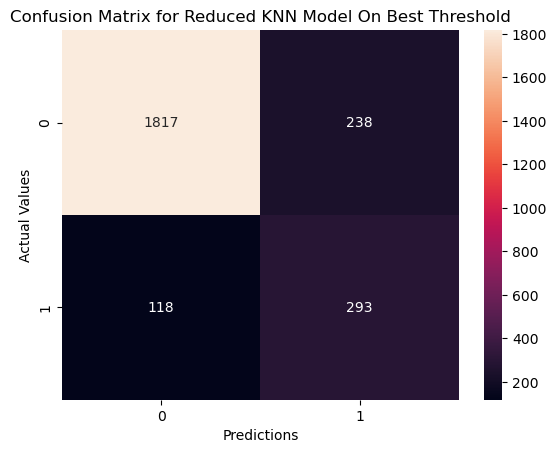

In [427]:
sns.heatmap(confusion_matrix(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_knn),annot=True,fmt='g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix for Reduced KNN Model On Best Threshold")
plt.show()

So here,<br>
0 - Negative or No Transaction and 1 - Positive or Yes Transaction<br>
**True Positive** = 293 (The Model has correctly predicted Customers who **made** the Transaction)<br>
**True Negatives** = 1817 (The model has correctly predicted Customers who **NOT** made the Transaction)<br>
**False Positives**= 238 (The Model has **incorrectly predicted** as **YES** Transaction but Actually the customer **NOT** made the Transaction)<br>
**False Negtives** = 118 (The Model has **incorrectly predicted** that Customer **NOT** made the Transaction but Actually the customer **made** the Transaction)

In [428]:
TP_threshold_reduced_knn = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_knn)[1,1]
TN_threshold_reduced_knn = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_knn)[0,0]
FP_threshold_reduced_knn = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_knn)[1,0]
FN_threshold_reduced_knn = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_knn)[0,1]

### Manual Calculation Of Accuracy

In [429]:
(TP_threshold_reduced_knn + TN_threshold_reduced_knn )/ (TP_threshold_reduced_knn + TN_threshold_reduced_knn +FP_threshold_reduced_knn +FN_threshold_reduced_knn)


0.8556366585563666

### Classification Report

In [430]:
print(classification_report(ytest,ytestPredicted_threshold_reduced_knn))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2055
           1       0.55      0.71      0.62       411

    accuracy                           0.86      2466
   macro avg       0.75      0.80      0.77      2466
weighted avg       0.87      0.86      0.86      2466



The Recall for YES Transaction here **has improved from (0.47) to 0.71**<br>
There is also **significant difference** between Precision of **YES TRANSACTION (0.55)** and Precision of **NO TRANSACTION (0.94)**<br>
The **F1-Score** for YES Transaction **has improved (0.56) to  0.62** <br><br>

Overall, This is the **best recall and f1-score** that can be achieved using these parameters for Log R Model
<br>
<br>
**Lets Complete the Model Evaluation for the Reduced Best Threshold KNN Model**


### ROC Curve

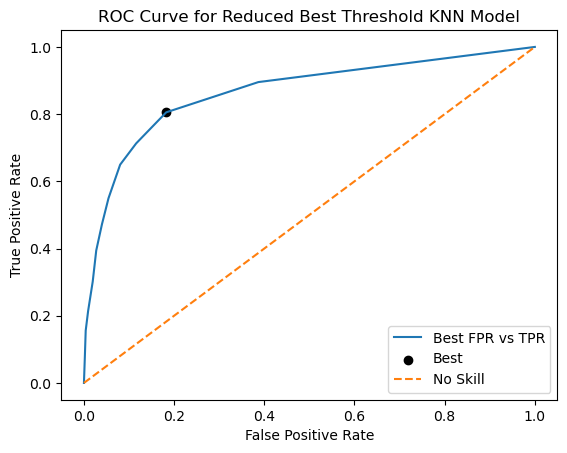

In [431]:
fpr_threshold_reduced_knn,tpr_threshold_reduced_knn, threshold_threshold_reduced_knn= roc_curve(ytest,reduced_knn_final.predict_proba(XtestScaledR)[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr_threshold_reduced_knn,tpr_threshold_reduced_knn,label="Best FPR vs TPR")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Reduced Best Threshold KNN Model")
plt.scatter(fpr_threshold_reduced_knn[ix_knn], tpr_threshold_reduced_knn[ix_knn], marker='o', color='black', label='Best')
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.legend()
plt.show()


### Area Under the Curve 

In [432]:
roc_auc_score(ytest,ytestPredicted_threshold_reduced_knn)

0.7985401459854015

### Model Summary of BEST Threshold Reduced KNN

**BEST Threshold Reduced KNN Summary**

1. Model Accuracy = 85.56% *(Good)*
2. High False Negatives = 118  *Model is **now able** to capture YES Transactions*
3. For **NO Transactions** - *Very High Precision, Recall and F1-Score* <br>
    3.1 Precision 0.94   <br>
    3.2 Recall 0.88<br>
    3.3 F1-score   0.91
4. For **YES Transactions** - *Very Low Precision, Recall and F1-Score* <br>
    4.1 Precision 0.55   *Poor*<br>
    4.2 Recall 0.71  *Quite Good*<br>
    4.3 F1-score   0.62  *Better*
5. AUC - 0.7985 *Good*
<br><br>
Overall, this means that our Reduced model is **very well able to classify YES Transaction** and a *cost of incorrectly predicting No Transactions  &rarr; YES Transaction*

         

## MODEL COMPARISION Full KNN vs Reduced KNN vs Best Threshold KNN

<table border="1">
  <tr>
    <th>Comparision</th>
    <th>Full KNN</th>
    <th>Reduced - KNN</th>
     <th>Best Threshold - Reduced KNN</th>
  </tr>
  <tr>
    <td>Model Accuracy</td>
    <td style="font-weight: bold">87.87%</td>
    <td>87.87%</td>
    <td>85.56%</td>      
  </tr>
  <tr>
    <td>False Negatives</td>
    <td>253</td>
    <td>217</td>
    <td style="font-weight: bold">118</td>   
  </tr>
    <tr>
    <td>False Postives</td>
    <td style="font-weight: bold">46</td>
    <td >82</td>
    <td >238</td>   
  </tr>
  <tr>
    <td>Precision (NO)</td>
    <td>0.89</td>
    <td>0.90</td>
    <td style="font-weight: bold">0.94</td>
  </tr>
  <tr>
    <td>Recall (NO)</td>
    <td style="font-weight: bold">0.98</td>
    <td>0.96</td>
    <td>0.88</td>
  </tr>
  <tr>
    <td>F1-Score (NO)</td>
    <td style="font-weight: bold">0.93</td>
    <td style="font-weight: bold">0.93</td>
    <td>0.91</td>
    
  </tr>
  <tr>
    <td>Precision (YES)</td>
    <td style="font-weight: bold">0.74</td>
    <td >0.73</td>
    <td >0.55</td>
  </tr>
  <tr>
    <td>Recall (YES)</td>
    <td>0.38</td>
    <td>0.47</td>
    <td style="font-weight: bold">0.71</td>    
  </tr>
  <tr>
    <td>F1-Score (YES)</td>
    <td>0.51</td>
    <td>0.56</td>
    <td style="font-weight: bold">0.62</td>    
  </tr>
  <tr>
    <td>AUC Score</td>
    <td>0.681</td>
    <td>0.716</td>
    <td style="font-weight: bold">0.7985</td>   
  </tr>
</table>


**Reduced Model with Best Threshold Evaluation**<br>

There is quite an improvement in :
1. Recall(YES) : Full (0.38) &rarr; Reduced(0.47) &rarr; **Threshold Reduced [0.71]**
2. F1-Score (YES) Full (0.51) &rarr; Reduced(0.56) &rarr; **Threshold Reduced [0.62]**
3. AUC Score (YES) Full (0.681) &rarr; Reduced(0.716) &rarr; **Threshold Reduced [0.7985]**

**Cost of Improvement** -  We are losing at certain Aspects : <br>
1. Bump in FPs  : Full (46) &rarr; Reduced(82) &rarr; **Threshold Reduced [238]**
2. Plummetting Precision (YES) : Full (0.74) &rarr; Reduced(0.73) &rarr; **Threshold Reduced [0.55]**
3. Overall Accuracy : Full (0.8787) &rarr; Reduced(0.8787) &rarr; **Threshold Reduced [0.8556]**

As the threshold of **0.181818** is *very very* **Low** <br>
The concerning part here is that Log Model is classifying almost every **4 out of 5** clients as YES Transaction. Sometime the model is true as well. <br>
BUT The model is **making higher mistakes** too.. It is predicting NO Transaction Customers as YES Transaction<br>
This is **disastrous**. <br>
**Due to misclassifaction, Clifford shall miss out reaching out to those Customers Who are on the Edge of making a transaction but did not make a transaction by Classifying them as YES Transaction whereas in reality they did not make a purchase**

## Decision Tree (Best Threshold Model)

### Recap of the Reduced Decisioin Tree

In [433]:
print(classification_report(y_true=ytest,y_pred=yTestPredicted_dt_reduced_dt))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2055
           1       0.73      0.52      0.61       411

    accuracy                           0.89      2466
   macro avg       0.82      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466



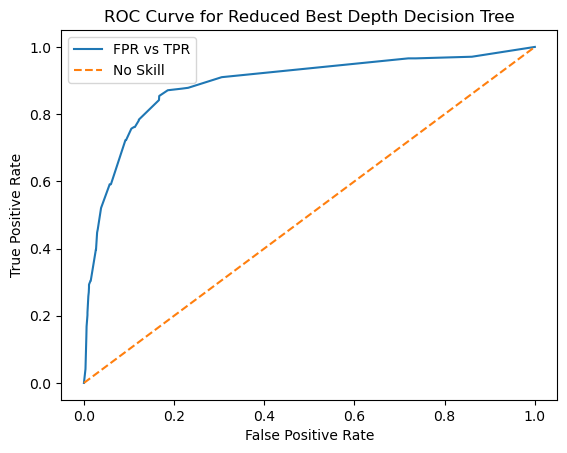

In [434]:
fpr_dt_reduced_dt,tpr_dt_reduced_dt, threshold_dt_reduced_dt = roc_curve(ytest,dt_reduced_dt.predict_proba(XtestR)[:,1])
plt.plot(fpr_dt_reduced_dt,tpr_dt_reduced_dt,label="FPR vs TPR")
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Reduced Best Depth Decision Tree")
plt.legend()
plt.show()

### AUC Score of Reduced KNN

In [435]:
roc_auc_score(ytest,yTestPredicted_dt_reduced_dt)

0.7413625304136253

### Finding Best Threshold for Decision Tree

In [436]:
gmeans_dt = np.sqrt(tpr_dt_reduced_dt * (1-fpr_dt_reduced_dt))


In [437]:
ix_dt = np.argmax(gmeans_dt)
ix_dt

32

In [438]:
print('Best Threshold=%f, G-Mean=%.3f' % (threshold_dt_reduced_dt[ix_dt], gmeans_dt[ix_dt]))

Best Threshold=0.111111, G-Mean=0.843


The Best threshold here is still **0.1111**<br>
&rarr;The **reason behind less threshold** is we need to **reduce the Over False Negative Predictions** and *predict as much as True Positives* **minimally misclassify** under False Positives. <br>
&rarr;In layman's terms, Reducing Threshold **will relax our cap in prediciting YES Transaction** leading to *more predictions* turning as **YES Transaction** with a *minimal mis-identification of a NO Transaction as YES Transaction*

In [439]:
ytrainPredicted_threshold_reduced_dt = (dt_reduced_dt.predict_proba(XtrainR)[:, 1] > threshold_dt_reduced_dt[ix_dt]).astype('float')

In [440]:
ytestPredicted_threshold_reduced_dt = (dt_reduced_dt.predict_proba(XtestR)[:, 1] >threshold_dt_reduced_dt[ix_dt]).astype('float')

### Accuracy Score

In [441]:
accuracy_score(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_dt)*100

83.4955393349554

#### The Model is booming at an Accuracy  of 83.49%

### Confusion Matrix

In [442]:
confusion_matrix(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_dt)

array([[1713,  342],
       [  65,  346]], dtype=int64)

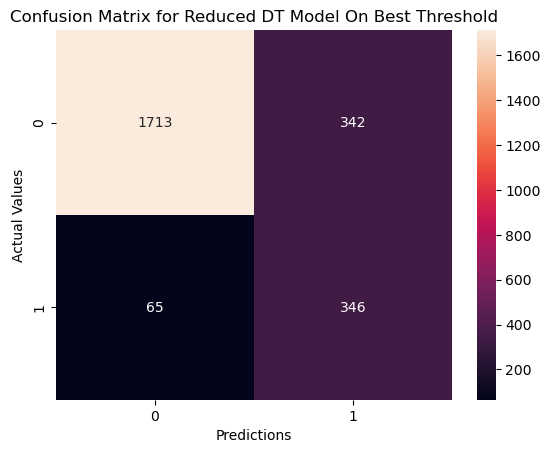

In [443]:
sns.heatmap(confusion_matrix(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_dt),annot=True,fmt='g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix for Reduced DT Model On Best Threshold")
plt.show()

So here,<br>
0 - Negative or No Transaction and 1 - Positive or Yes Transaction<br>
**True Positive** = 346 (The Model has correctly predicted Customers who **made** the Transaction)<br>
**True Negatives** = 1713 (The model has correctly predicted Customers who **NOT** made the Transaction)<br>
**False Positives**= 342 (The Model has **incorrectly predicted** as **YES** Transaction but Actually the customer **NOT** made the Transaction)<br>
**False Negtives** = 65 (The Model has **incorrectly predicted** that Customer **NOT** made the Transaction but Actually the customer **made** the Transaction)

In [444]:
TP_threshold_reduced_dt = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_dt)[1,1]
TN_threshold_reduced_dt = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_dt)[0,0]
FP_threshold_reduced_dt = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_dt)[1,0]
FN_threshold_reduced_dt = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_threshold_reduced_dt)[0,1]

### Manual Calculation Of Accuracy

In [445]:
(TP_threshold_reduced_dt + TN_threshold_reduced_dt )/ (TP_threshold_reduced_dt + TN_threshold_reduced_dt +FP_threshold_reduced_dt +FN_threshold_reduced_dt)


0.8349553933495539

### Classification Report

In [446]:
print(classification_report(ytest,ytestPredicted_threshold_reduced_dt))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2055
           1       0.50      0.84      0.63       411

    accuracy                           0.83      2466
   macro avg       0.73      0.84      0.76      2466
weighted avg       0.89      0.83      0.85      2466



The Recall for YES Transaction here **has improved from (0.52) to 0.84**<br>
There is also **significant difference** between Precision of **YES TRANSACTION (0.50)** and Precision of **NO TRANSACTION (0.96)**<br>
The **F1-Score** for YES Transaction **has improved (0.61) to  0.63** <br><br>

Overall, This is the **best recall and f1-score** that can be achieved using these parameters for Decision Tree Model
<br>
<br>
**Lets Complete the Model Evaluation for the Reduced Best Threshold Decision Tree Model**


### ROC Curve

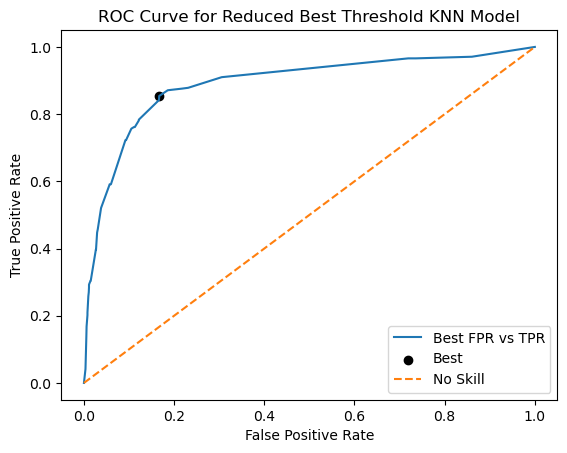

In [447]:
fpr_threshold_reduced_dt,tpr_threshold_reduced_dt, threshold_threshold_reduced_dt= roc_curve(ytest,dt_reduced_dt.predict_proba(XtestR)[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr_threshold_reduced_dt,tpr_threshold_reduced_dt,label="Best FPR vs TPR")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Reduced Best Threshold KNN Model")
plt.scatter(fpr_threshold_reduced_dt[ix_dt], tpr_threshold_reduced_dt[ix_dt], marker='o', color='black', label='Best')
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.legend()
plt.show()


### Area Under the Curve 

In [448]:
roc_auc_score(ytest,ytestPredicted_threshold_reduced_dt)

0.837712895377129

### Model Summary of BEST Threshold Reduced Decision Tree

**BEST Threshold Reduced Decision Tree**

1. Model Accuracy = 83.49% *(Good)*
2. High False Negatives = 65  *Model is **now able** to capture YES Transactions*
3. For **NO Transactions** - *Very High Precision, Recall and F1-Score* <br>
    3.1 Precision 0.96   <br>
    3.2 Recall 0.83<br>
    3.3 F1-score   0.89
4. For **YES Transactions** - *Very Low Precision, Recall and F1-Score* <br>
    4.1 Precision 0.50   *Poor*<br>
    4.2 Recall 0.84  *Quite Good*<br>
    4.3 F1-score   0.63  *Better*
5. AUC - 0.8377 *Good*
<br><br>

Overall, this means that our Reduced model is **very well able to classify YES Transaction** and a *cost of incorrectly predicting No Transactions  &rarr; YES Transaction*

         

## MODEL COMPARISION Full DT vs Reduced DT vs Best Threshold DT

<table border="1">
  <tr>
    <th>Comparision</th>
    <th>Full DT</th>
    <th>Reduced - DT</th>
     <th>Best Threshold - Reduced DT</th>
  </tr>
  <tr>
    <td>Model Accuracy</td>
    <td >88.19%</td>
    <td style="font-weight: bold">88.88%</td>
    <td>83.49%</td>      
  </tr>
  <tr>
    <td>False Negatives</td>
    <td>208</td>
    <td>197</td>
    <td style="font-weight: bold">65</td>   
  </tr>
    <tr>
    <td>False Postives</td>
    <td >83</td>
    <td style="font-weight: bold">78</td>
    <td >342</td>   
  </tr>
  <tr>
    <td>Precision (NO)</td>
    <td>0.90</td>
    <td>0.91</td>
    <td style="font-weight: bold">0.96</td>
  </tr>
  <tr>
    <td>Recall (NO)</td>
    <td style="font-weight: bold">0.96</td>
    <td style="font-weight: bold">0.96</td>
    <td>0.83</td>
  </tr>
  <tr>
    <td>F1-Score (NO)</td>
    <td style="font-weight: bold">0.93</td>
    <td style="font-weight: bold">0.93</td>
    <td>0.89</td>
    
  </tr>
  <tr>
    <td>Precision (YES)</td>
    <td >0.71</td>
    <td style="font-weight: bold">0.73</td>
    <td >0.50</td>
  </tr>
  <tr>
    <td>Recall (YES)</td>
    <td>0.49</td>
    <td>0.52</td>
    <td style="font-weight: bold">0.84</td>    
  </tr>
  <tr>
    <td>F1-Score (YES)</td>
    <td>0.58</td>
    <td>0.61</td>
    <td style="font-weight: bold">0.63</td>    
  </tr>
  <tr>
    <td>AUC Score</td>
    <td>0.7261</td>
    <td>0.7413</td>
    <td style="font-weight: bold">0.8377</td>   
  </tr>
</table>


**Reduced Model with Best Threshold Evaluation**<br>

There is quite an improvement in :
1. Recall(YES) : Full (0.49) &rarr; Reduced(0.52) &rarr; **Threshold Reduced [0.84]**
2. F1-Score (YES) Full (0.58) &rarr; Reduced(0.61) &rarr; **Threshold Reduced [0.63]**
3. AUC Score (YES) Full (0.7261) &rarr; Reduced(0.7413) &rarr; **Threshold Reduced [0.8377]**

**Cost of Improvement** -  We are losing at certain Aspects : <br>
1. Bump in FPs  : Full (83) &rarr; Reduced(78) &rarr; **Threshold Reduced [342]**
2. Plummetting Precision (YES) : Full (0.71) &rarr; Reduced(0.73) &rarr; **Threshold Reduced [0.50]**
3. Overall Accuracy : Full (0.8819) &rarr; Reduced(0.8888) &rarr; **Threshold Reduced [0.8349]**

As the threshold of **0.11111** is *very very* **Low** <br>
The concerning part here is that Log Model is classifying almost every **9 out of 10** clients as YES Transaction. Sometime the model is true as well. <br>
BUT The model is **making higher mistakes** too.. It is predicting NO Transaction Customers as YES Transaction<br>
This is **disastrous**. <br>
**Due to misclassifaction, Clifford shall miss out reaching out to those Customers Who are on the Edge of making a transaction but did not make a transaction by Classifying them as YES Transaction whereas in reality they did not make a purchase**

## COMPARISION Best Threshold LOGR &harr; Best Threshold KNN &harr; Best Threshold DT

<table border="1">
  <tr>
    <th>Comparision</th>
    <th>Best Threshold - Reduced LogR Model</th>
    <th>Best Threshold - Reduced KNN</th>
     <th>Best Threshold - Reduced DT</th>
  </tr>
  <tr>
    <td>Model Accuracy</td>
    <td >84.83%</td>
    <td style="font-weight: bold">85.56%</td>
    <td>83.49%</td>      
  </tr>
  <tr>
    <td>False Negatives</td>
    <td>94</td>
    <td>118</td>
    <td style="font-weight: bold">65</td>   
  </tr>
    <tr>
    <td>False Postives</td>
    <td >280</td>
    <td style="font-weight: bold">238</td>
    <td >342</td>   
  </tr>
  <tr>
    <td>Precision (NO)</td>
    <td>0.95</td>
    <td>0.94</td>
    <td style="font-weight: bold">0.96</td>
  </tr>
  <tr>
    <td>Recall (NO)</td>
    <td>0.86</td>
    <td style="font-weight: bold">0.88</td>
    <td>0.83</td>
  </tr>
  <tr>
    <td>F1-Score (NO)</td>
    <td >0.90</td>
    <td style="font-weight: bold">0.91</td>
    <td>0.89</td>
    
  </tr>
  <tr>
    <td>Precision (YES)</td>
    <td >0.53</td>
    <td style="font-weight: bold">0.55</td>
    <td >0.50</td>
  </tr>
  <tr>
    <td>Recall (YES)</td>
    <td>0.77</td>
    <td>0.71</td>
    <td style="font-weight: bold">0.84</td>    
  </tr>
  <tr>
    <td>F1-Score (YES)</td>
    <td>0.63</td>
    <td>0.62</td>
    <td style="font-weight: bold">0.63</td>    
  </tr>
  <tr>
    <td>AUC Score</td>
    <td>0.8175</td>
    <td>0.7985</td>
    <td style="font-weight: bold">0.8377</td>   
  </tr>
</table>


There is a **Cut-Throat Competition** Between **KNN** and **Reduced DT**
<br>
**DT Pros** 
1. Better Able to Predict the YES Transactions 
2. High Recall for YES Transaction
3. High AUC
4. High F1-Score (YES)
<br>
*The Cons of DT are the Pros of KNN* <br><br>
**KNN Pros** 
1. Balance between YES and NO Transactions
2. Controlled Recal of Both YES and NO Transactions
3. High Overall Accuracy
4. Least FP &rarr; Less Misclassification &rarr; Less Blunders

## PROS AND CONS OF BEST THRESHOLD MODEL

**Pros of a BEST Threshold**

1. Very Well Predicts YES Transaction Class
2. High AUC Score
3. Least False Negatives - i.e. Less Missing out YES Transaction Cases.


**Cons of BEST Threshold**
1. Very Very Low Thresholds (0.14, 0.11, 0.18)<br>
&rarr; *Theoretically these thresholds are true* however in practical **real world scenarios** these thresholds are **way out of acceptable range**
2. Disastrous Misclassification of NO Transactions as YES Transactions <br>
&rarr; This would miss out reaching out to those Customers Who are on the Edge of making a transaction but did not make a transaction by Classifying them as YES Transaction whereas in reality **they did not make a purchase**<br>
&rarr; On the other hand, best threshold is minimizing the double marketing related mis-classification.
3. Low Overall Accuracy
<br><br>

Conclusively, Best Threshold is theoretically true. However, an actual and Business Acceptable Threshold should be useful.

<h3> Lets Find the Business Acceptable Threshold Range for all the predictive models</h3>


We know that thresholds are theoretical we need to find a balance of threshold that is acceptable by Business.
<br>
<br>
threshold (theoretical) &rarr;  Practical Threshold (??) &rarr; Defualt Threshold (0.5)


# Section 4: Identifying the Business Acceptable Model

## Log Reg Model (Business Threshold)

In [449]:
print('Best Threshold for LogR=%f, G-Mean=%.3f' % (threshold_reduced_logR[ix_log], gmeans_log[ix_log]))

Best Threshold for LogR=0.122371, G-Mean=0.826


### List of Possible Thresholds vs Their Accuracies

In [450]:
acc_test = []
thre = []
acc_train = []
best_log_threshold = threshold_reduced_logR[ix_log]
start_index = np.where(threshold_reduced_logR <= 0.5)[0][0]
end_index = np.where(threshold_reduced_logR == best_log_threshold)[0][0]
for i in range(start_index,end_index):
    ytestPredicted_finalR_ThresholdH = (reduced_logR.predict_proba(XtestR)[:, 1] > threshold_reduced_logR[i]).astype('float')
    ytrainPredicted_finalR_ThresholdH = (reduced_logR.predict_proba(XtrainR)[:, 1] > threshold_reduced_logR[i]).astype('float')    
    acc_test.append(accuracy_score(ytest,ytestPredicted_finalR_ThresholdH))
    thre.append(threshold_reduced_logR[i])    
    acc_train.append(accuracy_score(ytrain,ytrainPredicted_finalR_ThresholdH))
    



In [451]:
fig = px.line(x = thre,y=[acc_train,acc_test])
fig["data"][0]["name"] = "Accuracy Train"
fig["data"][1]["name"] = "Accuracy Test"
fig.show()

### The Best Practical Threshold for the LogR Model which seems to be practical is 0.22084

The **Best Practical Threshold** for the **LogR Model** which seems to be practical is *0.22084* where my model have the best combination of *Train Acc () and Highest Test Acc* in the defined Range of Thresholds.

In [452]:
ytestPredicted_logR_BT = (reduced_logR.predict_proba(XtestR)[:, 1] > threshold_reduced_logR[np.where(threshold_reduced_logR>=0.22084)[0][-1]]).astype('float')
ytrainPredicted__logR_BT = (reduced_logR.predict_proba(XtrainR)[:, 1] > threshold_reduced_logR[np.where(threshold_reduced_logR>=0.22084)[0][-1]]).astype('float')   

In [453]:
threshold_reduced_logR[np.where(threshold_reduced_logR>=0.22084)[0][-1]]

0.22168234482445176

### Accuracy Score

In [454]:
accuracy_score(y_true=ytest,y_pred=ytestPredicted_logR_BT)*100

88.32116788321169

#### The Model is booming at an Accuracy  of 88.36%

### Confusion Matrix

In [455]:
confusion_matrix(y_true=ytest,y_pred=ytestPredicted_logR_BT)

array([[1933,  122],
       [ 166,  245]], dtype=int64)

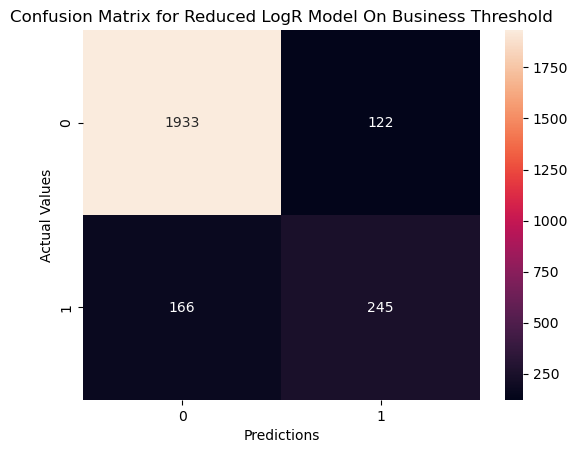

In [456]:
sns.heatmap(confusion_matrix(y_true=ytest,y_pred=ytestPredicted_logR_BT),annot=True,fmt='g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix for Reduced LogR Model On Business Threshold")
plt.show()

So here,<br>
0 - Negative or No Transaction and 1 - Positive or Yes Transaction<br>
**True Positive** = 247 (The Model has correctly predicted Customers who **made** the Transaction)<br>
**True Negatives** = 1932 (The model has correctly predicted Customers who **NOT** made the Transaction)<br>
**False Positives**= 123 (The Model has **incorrectly predicted** as **YES** Transaction but Actually the customer **NOT** made the Transaction)<br>
**False Negtives** = 164 (The Model has **incorrectly predicted** that Customer **NOT** made the Transaction but Actually the customer **made** the Transaction)

In [457]:
TP_logR_BT = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_logR_BT)[1,1]
TN_logR_BT = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_logR_BT)[0,0]
FP_logR_BT = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_logR_BT)[1,0]
FN_logR_BT = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_logR_BT)[0,1]

### Manual Calculation Of Accuracy

In [458]:
(TP_logR_BT + TN_logR_BT )/ (TP_logR_BT + TN_logR_BT +FP_logR_BT +FN_logR_BT)


0.8832116788321168

### Classification Report

In [459]:
print(classification_report(ytest,ytestPredicted_logR_BT))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2055
           1       0.67      0.60      0.63       411

    accuracy                           0.88      2466
   macro avg       0.79      0.77      0.78      2466
weighted avg       0.88      0.88      0.88      2466



The Recall for YES Transaction here **has settled to 0.60**<br>

The **F1-Score** for YES Transaction **has remained still at  0.63** <br><br>

Overall, This is the **best recall and f1-score** that can be achieved using these parameters for Log R Model
<br>
<br>
**Lets Complete the Model Evaluation for the Reduced Business Threshold Reduced LogR Model**


### ROC Curve

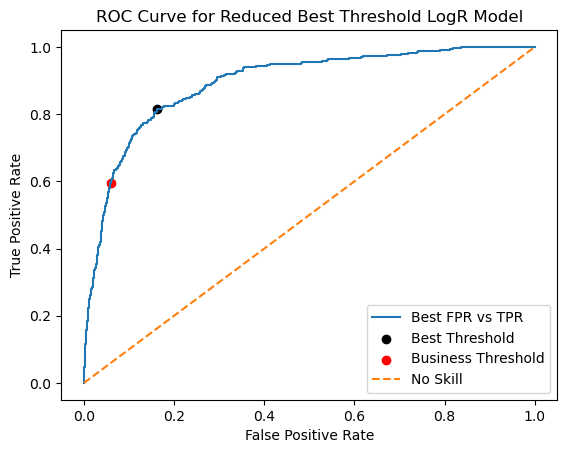

In [460]:
fpr_threshold_reduced_logR,tpr_threshold_reduced_logR, threshold_threshold_reduced_logR= roc_curve(ytest,reduced_logR.predict_proba(XtestR)[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr_threshold_reduced_logR,tpr_threshold_reduced_logR,label="Best FPR vs TPR")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Reduced Best Threshold LogR Model")
plt.scatter(fpr_threshold_reduced_logR[ix_log], tpr_threshold_reduced_logR[ix_log], marker='o', color='black', label='Best Threshold')
plt.scatter(fpr_threshold_reduced_logR[np.where(threshold_reduced_logR>=0.22084)[0][-1]], tpr_threshold_reduced_logR[np.where(threshold_reduced_logR>=0.22084)[0][-1]], marker='o', color='red', label='Business Threshold')
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.legend()
plt.show()


### Area Under the Curve 

In [461]:
roc_auc_score(ytest,ytestPredicted_logR_BT)

0.7683698296836984

### Model Summary of Business Threshold Reduced Log Reg

**BEST Threshold Reduced Log Reg Summary**

1. Model Accuracy = 88.36% *(Best)*
2. High False Negatives = 164  *Model is **now able** to capture both YES and NO Transactions*
3. For **NO Transactions** - *Very High Precision, Recall and F1-Score* <br>
    3.1 Precision 0.92   <br>
    3.2 Recall 0.94<br>
    3.3 F1-score   0.93
4. For **NO Transactions** - *Balanced Precision, Recall and F1-Score* <br>
    4.1 Precision 0.67   *Okay*<br>
    4.2 Recall 0.60  *Quite Good*<br>
    4.3 F1-score   0.63  *Better*
5. AUC - 0.7705 *Okay*
<br><br>

Overall, this means that our Reduced model is **able to balancely classify YES and NO Transaction** at a **minimal** *cost of incorrectly predicting No Transactions  &rarr; YES Transaction*

         

## MODEL COMPARISION : 
## Full LogR vs Reduced LogR vs Best Threshold LogR vs Business Threshold LogR

<table border="1">
  <tr>
    <th>Comparision</th>
    <th>Full LogR</th>
    <th>Reduced - LogR</th>
    <th>Best Threshold - Reduced LogR</th>
    <th>Business Threshold - Reduced LogR</th> 
  </tr>
  <tr>
    <td>Model Accuracy</td>
    <td>87.18%</td>
    <td>87.14%</td>
    <td>84.83%</td>
    <td style="font-weight: bold">88.36%</td> 
  </tr>
  <tr>
    <td>False Negatives</td>
    <td>265</td>
    <td>262</td>
    <td>94</td>   
    <td style="font-weight: bold">164 - Moderate</td>
  </tr>
    <tr>
    <td>False Postives</td>
    <td>51</td>
    <td>55</td>
    <td >280</td>
    <td style="font-weight: bold">123 - Moderate</td>
  </tr>
  <tr>
    <td>Precision (NO)</td>
    <td>0.88</td>
    <td>0.88</td>
    <td>0.95</td>
    <td style="font-weight: bold">In Control - 0.92</td>
  </tr>
  <tr>
    <td>Recall (NO)</td>
    <td >0.98</td>
    <td>0.97</td>
    <td>0.86</td>
    <td style="font-weight: bold">In Control - 0.94</td>
  </tr>
  <tr>
    <td>F1-Score (NO)</td>
    <td>0.93</td>
    <td>0.93</td>
    <td>0.90</td>
    <td style="font-weight: bold">0.93</td>
    
  </tr>
  <tr>
    <td>Precision (YES)</td>
    <td>0.74</td>
    <td >0.73</td>
    <td >0.53</td>
    <td style="font-weight: bold">Balanced - 0.63</td>
  </tr>
  <tr>
    <td>Recall (YES)</td>
    <td>0.36</td>
    <td>0.36</td>
    <td>0.77</td>
    <td style="font-weight: bold">Balanced - 0.60</td>    
  </tr>
  <tr>
    <td>F1-Score (YES)</td>
    <td>0.48</td>
    <td>0.48</td>
    <td>0.63</td>
    <td style="font-weight: bold">0.63</td>    
  </tr>
  <tr>
    <td>AUC Score</td>
    <td>0.665</td>
    <td>0.667</td>
    <td>0.8175</td>
    <td style="font-weight: bold">Balanced - 0.7705</td>   
  </tr>
</table>


As the threshold of **0.22084** is *quite* **Low** <br>
The concerning part here is that Log Model is classifying almost every **4 out of 5** clients as YES Transaction. Sometime the model is true as well. <br>
The model is **making moderate mistakes** too.. It is *contrallably predicting NO Transaction Customers as YES Transaction*<br><br>
This Model is *equally mis-classifying* <br> 

&bull; YES Transaction &rarr; NO Transaction & <br>
&bull; NO Transaction &rarr; YES Transaction

## KNN Model  (Business Threshold)

In [462]:
print('Best Threshold for KNN=%f, G-Mean=%.3f' % (threshold_threshold_reduced_knn[ix_knn], gmeans_knn[ix_knn]))

Best Threshold for KNN=0.181818, G-Mean=0.811


In [463]:
acc_test = []
thre = []
acc_train = []
best_knn_threshold = threshold_threshold_reduced_knn[ix_knn]
start_index = np.where(threshold_threshold_reduced_knn <= 0.5)[0][0]
end_index = np.where(threshold_threshold_reduced_knn == best_knn_threshold)[0][0]+1
for i in range(start_index,end_index):
    ytestPredicted_finalR_ThresholdH = (reduced_knn_final.predict_proba(XtestScaledR)[:, 1] > threshold_threshold_reduced_knn[i]).astype('float')
    ytrainPredicted_finalR_ThresholdH = (reduced_knn_final.predict_proba(XtrainScaledR)[:, 1] > threshold_threshold_reduced_knn[i]).astype('float')    
    acc_test.append(accuracy_score(ytest,ytestPredicted_finalR_ThresholdH))
    thre.append(threshold_threshold_reduced_knn[i])    
    acc_train.append(accuracy_score(ytrain,ytrainPredicted_finalR_ThresholdH))
    

In [464]:
fig = px.line(x = thre,y=[acc_train,acc_test])
fig["data"][0]["name"] = "Accuracy Train"
fig["data"][1]["name"] = "Accuracy Test"
fig.show()

### The Best Practical Threshold for the KNN Model which seems to be practical is 0.3636

The **Best Practical Threshold** for the **KNN Model** which seems to be practical is *0.3636* where my model have the best combination of *Train Acc () and Highest Test Acc* in the defined Range of Thresholds.

In [465]:
ytestPredicted_knn_BT = (reduced_knn_final.predict_proba(XtestScaledR)[:, 1] > threshold_threshold_reduced_knn[np.where(threshold_threshold_reduced_knn>=0.3636)[0][-1]]).astype('float')
ytrainPredicted__knn_BT = (reduced_knn_final.predict_proba(XtrainScaledR)[:, 1] > threshold_threshold_reduced_knn[np.where(threshold_threshold_reduced_knn>=0.3636)[0][-1]]).astype('float')   

In [466]:
threshold_threshold_reduced_knn[np.where(threshold_threshold_reduced_knn>=0.3636)[0][-1]]

0.36363636363636365

### Accuracy Score

In [467]:
accuracy_score(y_true=ytest,y_pred=ytestPredicted_knn_BT)*100

87.95620437956204

#### The Model is booming at an Accuracy  of 87.95%

### Confusion Matrix

In [468]:
confusion_matrix(y_true=ytest,y_pred=ytestPredicted_knn_BT)

array([[1943,  112],
       [ 185,  226]], dtype=int64)

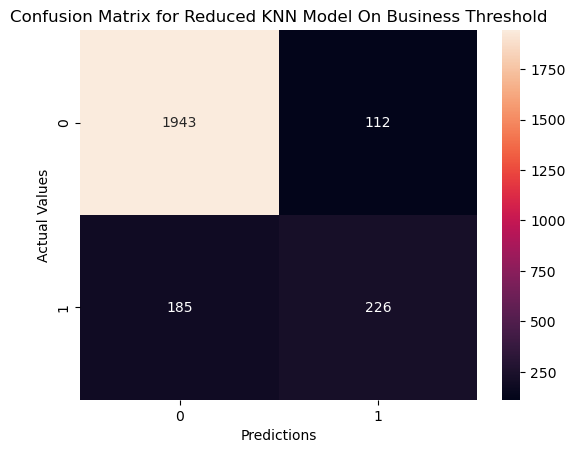

In [469]:
sns.heatmap(confusion_matrix(y_true=ytest,y_pred=ytestPredicted_knn_BT),annot=True,fmt='g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix for Reduced KNN Model On Business Threshold")
plt.show()

So here,<br>
0 - Negative or No Transaction and 1 - Positive or Yes Transaction<br>
**True Positive** = 226 (The Model has correctly predicted Customers who **made** the Transaction)<br>
**True Negatives** = 1943 (The model has correctly predicted Customers who **NOT** made the Transaction)<br>
**False Positives**= 112 (The Model has **incorrectly predicted** as **YES** Transaction but Actually the customer **NOT** made the Transaction)<br>
**False Negtives** = 185 (The Model has **incorrectly predicted** that Customer **NOT** made the Transaction but Actually the customer **made** the Transaction)

In [470]:
TP_knn_BT = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_knn_BT)[1,1]
TN_knn_BT = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_knn_BT)[0,0]
FP_knn_BT = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_knn_BT)[1,0]
FN_knn_BT = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_knn_BT)[0,1]

### Manual Calculation Of Accuracy

In [471]:
(TP_knn_BT + TN_knn_BT )/ (TP_knn_BT + TN_knn_BT +FP_knn_BT +FN_knn_BT)


0.8795620437956204

### Classification Report

In [472]:
print(classification_report(ytest,ytestPredicted_knn_BT))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2055
           1       0.67      0.55      0.60       411

    accuracy                           0.88      2466
   macro avg       0.79      0.75      0.77      2466
weighted avg       0.87      0.88      0.87      2466



The Recall for YES Transaction here **has settled to 0.55**<br>

The **F1-Score** for YES Transaction **has remained still at  0.60** <br><br>

Overall, This is the **best recall and f1-score** that can be achieved using these parameters for KNN Model
<br>
<br>
**Lets Complete the Model Evaluation for the Reduced Business Threshold Reduced KNN Model**


### ROC Curve

In [473]:
fpr_threshold_reduced_knn[np.where(threshold_threshold_reduced_knn>=0.3636)[0][-1]]

0.08029197080291971

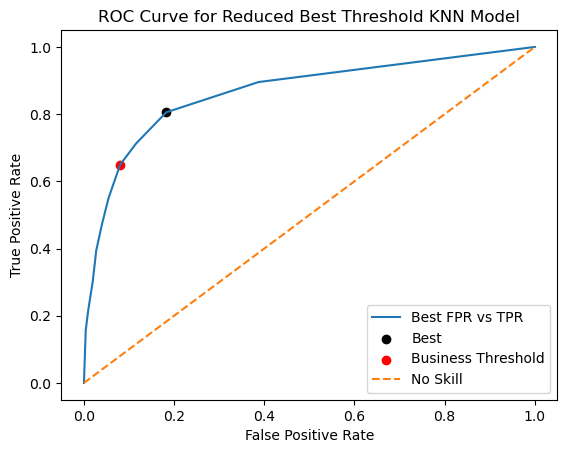

In [474]:
fpr_threshold_reduced_knn,tpr_threshold_reduced_knn, threshold_threshold_reduced_knn= roc_curve(ytest,reduced_knn_final.predict_proba(XtestScaledR)[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr_threshold_reduced_knn,tpr_threshold_reduced_knn,label="Best FPR vs TPR")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Reduced Best Threshold KNN Model")
plt.scatter(fpr_threshold_reduced_knn[ix_knn], tpr_threshold_reduced_knn[ix_knn], marker='o', color='black', label='Best')
# plt.scatter(fpr_threshold_reduced_logR[np.where(threshold_threshold_reduced_knn>=0.3636)[0][-1]], tpr_threshold_reduced_logR[np.where(threshold_threshold_reduced_knn>=0.3636)[0][-1]], marker='o', color='red', label='Business Threshold')
plt.scatter(fpr_threshold_reduced_knn[np.where(threshold_threshold_reduced_knn>=0.3636)[0][-1]], tpr_threshold_reduced_knn[np.where(threshold_threshold_reduced_knn>=0.3636)[0][-1]], marker='o', color='red', label='Business Threshold')

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.legend()
plt.show()


### Area Under the Curve 

In [475]:
roc_auc_score(ytest,ytestPredicted_knn_BT)

0.7476885644768856

### Model Summary of Business Threshold Reduced KNN Model

**Business Threshold Reduced KNN Model**

1. Model Accuracy = 87.95% *(Best)*
2. High False Negatives = 185  *Model is **now able** to capture both YES and NO Transactions*
3. For **NO Transactions** - *Very High Precision, Recall and F1-Score* <br>
    3.1 Precision 0.91   <br>
    3.2 Recall 0.95<br>
    3.3 F1-score   0.93
4. For **NO Transactions** - *Balanced Precision, Recall and F1-Score* <br>
    4.1 Precision 0.67   *Okay*<br>
    4.2 Recall 0.55  *Quite Good*<br>
    4.3 F1-score   0.60  *Better*
5. AUC - 0.7476 *Okay*
<br><br>

Overall, this means that our Reduced model is **able to balancely classify YES and NO Transaction** at a **minimal** *cost of incorrectly predicting No Transactions  &rarr; YES Transaction*

         

## MODEL COMPARISION : 
## Full KNN vs Reduced KNN vs Best Threshold KNN vs Business Threshold KNN

<table border="1">
  <tr>
    <th>Comparision</th>
    <th>Full KNN</th>
    <th>Reduced - KNN</th>
    <th>Best Threshold - Reduced KNN</th>
    <th>Business Threshold - Reduced KNN</th>
  </tr>
  <tr>
    <td>Model Accuracy</td>
    <td>87.87%</td>    
    <td>87.87%</td>
    <td>85.56%</td>
    <td style="font-weight: bold">87.95%</td>
  </tr>
  <tr>
    <td>False Negatives</td>
    <td>253</td>
    <td>217</td>
    <td>118</td>
    <td style="font-weight: bold">185 - Moderate</td>   
  </tr>
    <tr>
    <td>False Postives</td>
        <td>46</td>
    <td >82</td>
    <td >238</td>
    <td style="font-weight: bold">112 - Moderate</td>
  </tr>
  <tr>
    <td>Precision (NO)</td>
    <td>0.89</td>
    <td>0.90</td>
    <td>0.94</td>
    <td style="font-weight: bold">In Control - 0.91</td>
  </tr>
  <tr>
    <td>Recall (NO)</td>
    <td>0.98</td>
    <td>0.96</td>
    <td>0.88</td>
    <td style="font-weight: bold">In Control - 0.95</td>
  </tr>
  <tr>
    <td>F1-Score (NO)</td>
    <td style="font-weight: bold">0.93</td>
    <td style="font-weight: bold">0.93</td>
    <td>0.91</td>
    <td style="font-weight: bold">0.93</td>
    
  </tr>
  <tr>
    <td>Precision (YES)</td>
    <td >0.74</td>
    <td >0.73</td>
    <td >0.55</td>
    <td style="font-weight: bold"> 0.67 - Balanced </td>
  </tr>
  <tr>
    <td>Recall (YES)</td>
    <td>0.38</td>
    <td>0.47</td>
    <td >0.71</td> 
    <td style="font-weight: bold">0.55 -  Balanced</td>
  </tr>
  <tr>
    <td>F1-Score (YES)</td>
    <td>0.51</td>
    <td>0.56</td>
    <td>0.62</td>
    <td style="font-weight: bold">0.60 - Balanced</td>    
  </tr>
  <tr>
    <td>AUC Score</td>
    <td>0.681</td>
    <td>0.716</td>
    <td>0.7985</td>   
    <td style="font-weight: bold">0.7476 - Balanced</td>   

  </tr>
</table>


As the threshold of **0.3636** is *Acceptable* <br>
The KNN Model is classifying almost every **7 out of 11** clients as YES Transaction. Sometime the model is true as well. <br>
The model is **making moderate mistakes** too.. It is *contrallably predicting NO Transaction Customers as YES Transaction*<br><br>
This Model is *equally mis-classifying* <br> 

&bull; YES Transaction &rarr; NO Transaction & <br>
&bull; NO Transaction &rarr; YES Transaction

## Decision Tree Practically Acceptable Threshold

In [476]:
print('Best Threshold for Decision Trees = %f, G-Mean=%.3f' % (threshold_dt_reduced_dt[ix_dt], gmeans_dt[ix_dt]))

Best Threshold for Decision Trees = 0.111111, G-Mean=0.843


In [477]:
acc_test = []
thre = []
acc_train = []
best_dt_threshold = threshold_dt_reduced_dt[ix_dt]
start_index = np.where(threshold_dt_reduced_dt <= 0.5)[0][0]
end_index = np.where(threshold_dt_reduced_dt == best_dt_threshold)[0][0]+1
for i in range(start_index,end_index):
    ytestPredicted_finalR_ThresholdH = (dt_reduced_dt.predict_proba(XtestR)[:, 1] > threshold_dt_reduced_dt[i]).astype('float')
    ytrainPredicted_finalR_ThresholdH = (dt_reduced_dt.predict_proba(XtrainR)[:, 1] > threshold_dt_reduced_dt[i]).astype('float')    
    acc_test.append(accuracy_score(ytest,ytestPredicted_finalR_ThresholdH))
    thre.append(threshold_dt_reduced_dt[i])    
    acc_train.append(accuracy_score(ytrain,ytrainPredicted_finalR_ThresholdH))
    

In [478]:
fig = px.line(x = thre,y=[acc_train,acc_test])
fig["data"][0]["name"] = "Accuracy Train"
fig["data"][1]["name"] = "Accuracy Test"
fig.show()

### The Best Practical Threshold for the Decision Tree which seems to be practical is 0.3888

The **Best Practical Threshold** for the **Decision Tree Model** which seems to be practical is *0.3888* where my model have the best combination of *Train Acc () and Highest Test Acc* in the defined Range of Thresholds.

In [479]:
ytestPredicted_dt_BT = (dt_reduced_dt.predict_proba(XtestR)[:, 1] > threshold_dt_reduced_dt[np.where(threshold_dt_reduced_dt>=0.3888)[0][-1]]).astype('float')
ytrainPredicted__dt_BT = (dt_reduced_dt.predict_proba(XtrainR)[:, 1] > threshold_dt_reduced_dt[np.where(threshold_dt_reduced_dt>=0.3888)[0][-1]]).astype('float')   

In [480]:
threshold_dt_reduced_dt[np.where(threshold_dt_reduced_dt>=0.3888)[0][-1]]

0.3888888888888889

### Accuracy Score

In [481]:
accuracy_score(y_true=ytest,y_pred=ytestPredicted_dt_BT)*100

88.44282238442823

#### The Model is booming at an Accuracy  of 88.44%

### Confusion Matrix

In [482]:
confusion_matrix(y_true=ytest,y_pred=ytestPredicted_dt_BT)

array([[1938,  117],
       [ 168,  243]], dtype=int64)

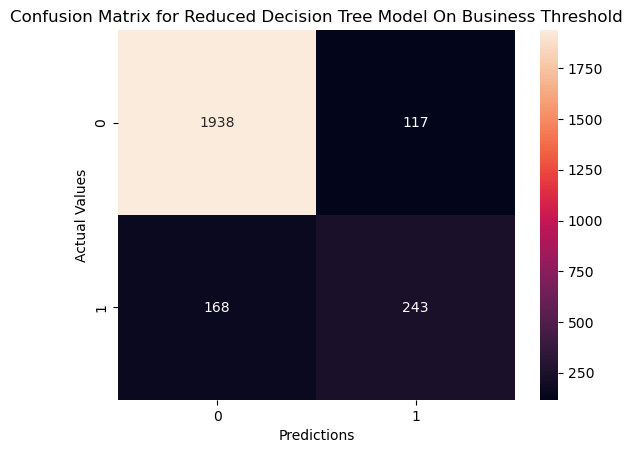

In [483]:
sns.heatmap(confusion_matrix(y_true=ytest,y_pred=ytestPredicted_dt_BT),annot=True,fmt='g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix for Reduced Decision Tree Model On Business Threshold")
plt.show()

So here,<br>
0 - Negative or No Transaction and 1 - Positive or Yes Transaction<br>
**True Positive** = 243 (The Model has correctly predicted Customers who **made** the Transaction)<br>
**True Negatives** = 1938 (The model has correctly predicted Customers who **NOT** made the Transaction)<br>
**False Positives**= 117 (The Model has **incorrectly predicted** as **YES** Transaction but Actually the customer **NOT** made the Transaction)<br>
**False Negtives** = 168 (The Model has **incorrectly predicted** that Customer **NOT** made the Transaction but Actually the customer **made** the Transaction)

In [484]:
TP_dt_BT = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_dt_BT)[1,1]
TN_dt_BT = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_dt_BT)[0,0]
FP_dt_BT = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_dt_BT)[1,0]
FN_dt_BT = confusion_matrix(y_true=ytest,y_pred=ytestPredicted_dt_BT)[0,1]

### Manual Calculation Of Accuracy

In [485]:
(TP_dt_BT + TN_dt_BT )/ (TP_dt_BT + TN_dt_BT +FP_dt_BT +FN_dt_BT)


0.8844282238442822

### Classification Report

In [486]:
print(classification_report(ytest,ytestPredicted_dt_BT))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2055
           1       0.68      0.59      0.63       411

    accuracy                           0.88      2466
   macro avg       0.80      0.77      0.78      2466
weighted avg       0.88      0.88      0.88      2466



The Recall for YES Transaction here **has settled to 0.59**<br>

The **F1-Score** for YES Transaction **has remained still at  0.63** <br><br>

Overall, This is the **best recall and f1-score** that can be achieved using these parameters for Decision Tree Model
<br>
<br>
**Lets Complete the Model Evaluation for the Reduced Business Threshold Reduced Decision Tree Model**


### ROC Curve

In [487]:
fpr_threshold_reduced_knn[np.where(threshold_threshold_reduced_knn>=0.3636)[0][-1]]

0.08029197080291971

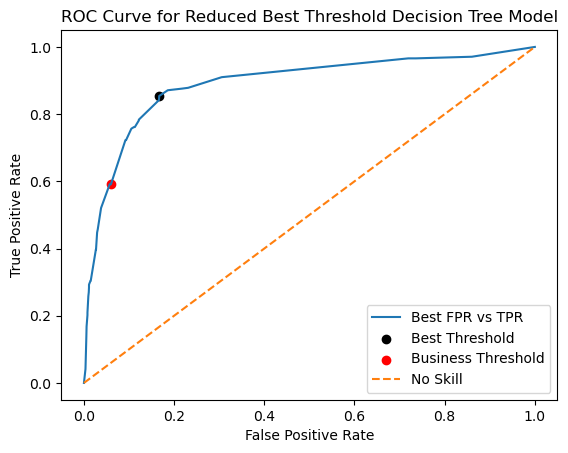

In [488]:
fpr_dt_reduced_dt,tpr_dt_reduced_dt, threshold_dt_reduced_dt= roc_curve(ytest,dt_reduced_dt.predict_proba(XtestR)[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr_dt_reduced_dt,tpr_dt_reduced_dt,label="Best FPR vs TPR")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Reduced Best Threshold Decision Tree Model")
plt.scatter(fpr_dt_reduced_dt[ix_dt], tpr_dt_reduced_dt[ix_dt], marker='o', color='black', label='Best Threshold')
# plt.scatter(fpr_threshold_reduced_logR[np.where(threshold_threshold_reduced_knn>=0.3636)[0][-1]], tpr_threshold_reduced_logR[np.where(threshold_threshold_reduced_knn>=0.3636)[0][-1]], marker='o', color='red', label='Business Threshold')
plt.scatter(fpr_dt_reduced_dt[np.where(threshold_dt_reduced_dt>=0.3888)[0][-1]], tpr_dt_reduced_dt[np.where(threshold_dt_reduced_dt>=0.3888)[0][-1]], marker='o', color='red', label='Business Threshold')
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.legend()
plt.show()


### Area Under the Curve 

In [489]:
roc_auc_score(ytest,ytestPredicted_dt_BT)

0.7671532846715329

### Model Summary of Business Threshold Reduced Decision Tree Model

**Business Threshold Reduced Decision Tree Model**

1. Model Accuracy = 88.44% *(Best)*
2. High False Negatives = 168  *Model is **now able** to capture both YES and NO Transactions*
3. For **NO Transactions** - *Very High Precision, Recall and F1-Score* <br>
    3.1 Precision 0.92   <br>
    3.2 Recall 0.94<br>
    3.3 F1-score   0.93
4. For **NO Transactions** - *Balanced Precision, Recall and F1-Score* <br>
    4.1 Precision 0.68   *Okay*<br>
    4.2 Recall 0.59  *Quite Good*<br>
    4.3 F1-score   0.63  *Better*
5. AUC - 0.7671 *Okay*
<br><br>

Overall, this means that our Reduced model is **able to balancely classify YES and NO Transaction** at a **minimal** *cost of incorrectly predicting No Transactions  &rarr; YES Transaction*

         

## MODEL COMPARISION : 
## Full DT vs Reduced DT vs Best Threshold DT vs Business Threshold DT

<table border="1">
  <tr>
    <th>Comparision</th>
    <th>Full DT</th>
    <th>Reduced - DT</th>
     <th>Best Threshold - Reduced DT</th>
    <th>Business Threshold - Reduced DT</th>
  </tr>
  <tr>
    <td>Model Accuracy</td>
    <td >88.19%</td>
    <td >88.88%</td>
    <td>83.49%</td> 
    <td style="font-weight: bold">88.44%</td>
  </tr>
  <tr>
    <td>False Negatives</td>
    <td>208</td>
    <td>197</td>
    <td>65</td>
    <td style="font-weight: bold">Moderate - 168</td>   
  </tr>
    <tr>
    <td>False Postives</td>
    <td >83</td>
    <td >78</td>
    <td >342</td>
    <td style="font-weight: bold">117 - Moderate</td>
  </tr>
  <tr>
    <td>Precision (NO)</td>
    <td>0.90</td>
    <td>0.91</td>
    <td >0.96</td>
    <td style="font-weight: bold">In Control - 0.92</td>
  </tr>
  <tr>
    <td>Recall (NO)</td>
    <td >0.96</td>
    <td >0.96</td>
    <td>0.83</td>
    <td style="font-weight: bold">In Control 0.94</td>
  </tr>
  <tr>
    <td>F1-Score (NO)</td>
    <td style="font-weight: bold">0.93</td>
    <td style="font-weight: bold">0.93</td>
    <td>0.89</td>
    <td style="font-weight: bold">0.93</td>
    
  </tr>
  <tr>
    <td>Precision (YES)</td>
    <td >0.71</td>
    <td >0.73</td>
    <td >0.50</td>
    <td style="font-weight: bold">0.68 - Balanced</td>
  </tr>
  <tr>
    <td>Recall (YES)</td>
    <td>0.49</td>
    <td>0.52</td>
    <td >0.84</td>
    <td style="font-weight: bold">0.59 - Balanced</td>
  </tr>
  <tr>
    <td>F1-Score (YES)</td>
    <td>0.58</td>
    <td>0.61</td>
    <td style="font-weight: bold">0.63</td>   
    <td style="font-weight: bold">0.63</td> 
  </tr>
  <tr>
    <td>AUC Score</td>
    <td>0.7261</td>
    <td>0.7413</td>
    <td >0.8377</td>  
    <td style="font-weight: bold">0.7671 -  Balanced</td>
  </tr>
</table>


As the threshold of **0.3888** is *Acceptable* <br>
The Decision Tree Model is classifying almost every **6 out of 10** clients as YES Transaction. Sometime the model is true as well. <br>
The model is **making moderate mistakes** too.. It is *contrallably predicting NO Transaction Customers as YES Transaction*<br><br>
This Model is *equally mis-classifying* <br> 

&bull; YES Transaction &rarr; NO Transaction & <br>
&bull; NO Transaction &rarr; YES Transaction <br>

Business-threshold is improving False Positive performance at the cost of False Negative as mentioned earlier. This will allow business to target more customer who are on the verge of making an transaction. It is possible at the cost of added double marketing to similar number of cusotmers who are already transacting. Double marketing has a potential to further improve sales from those customers due to new promotion. Overall, business would benefit more from business threshold model compared to best threshold model.

## MODEL COMPARISION Business Threshold LOGR - Business Threshold KNN - Business Threshold DT

<table border="1">
  <tr>
    <th>Comparision</th>
    <th>Business Threshold  - Reduced LogR Model</th>
    <th>Business Threshold - Reduced KNN</th>
     <th>Business Threshold - Reduced DT</th>
  </tr>
  <tr>
    <td>Practical Threshold</td>
    <td >0.2208</td>
    <td >0.3636</td>
    <td style="font-weight: bold">0.3888</td>      
  </tr>
  <tr>
    <td>Model Accuracy</td>
    <td >88.36%</td>
    <td >87.95%</td>
    <td style="font-weight: bold">88.44%</td>      
  </tr>
  <tr>
    <td>False Negatives</td>
    <td style="font-weight: bold">164</td>
    <td>185</td>
    <td >168</td>   
  </tr>
    <tr>
    <td>False Postives</td>
    <td >123</td>
    <td style="font-weight: bold">112</td>
    <td >117</td>   
  </tr>
  <tr>
    <td>Precision (NO)</td>
    <td>0.92</td>
    <td>0.91</td>
    <td style="font-weight: bold">0.92</td>
  </tr>
  <tr>
    <td>Recall (NO)</td>
    <td>0.94</td>
    <td style="font-weight: bold">0.95</td>
    <td>0.94</td>
  </tr>
  <tr>
    <td>F1-Score (NO)</td>
    <td >0.93</td>
    <td style="font-weight: bold">0.93</td>
    <td style="font-weight: bold">0.93</td>
    
  </tr>
  <tr>
    <td>Precision (YES)</td>
    <td >0.63</td>
    <td >0.67</td>
    <td style="font-weight: bold">0.68</td>
  </tr>
  <tr>
    <td>Recall (YES)</td>
    <td>0.60</td>
    <td>0.55</td>
    <td style="font-weight: bold">0.59</td>    
  </tr>
  <tr>
    <td>F1-Score (YES)</td>
    <td>0.63</td>
    <td>0.60</td>
    <td style="font-weight: bold">0.63</td>    
  </tr>
  <tr>
    <td>AUC Score</td>
    <td>0.7705</td>
    <td>0.7476</td>
    <td style="font-weight: bold">0.7671 - Moderate</td>   
  </tr>
</table>


## Which Business Threshold Model is the BEST

Conclusively, **Decision Tree Model Reduced with Business Threshold is the Optimal Model in Real World**.<br> *Classification* and *Errors* are balanced resulting into a **win-win situation** on both ENDS.

## K-Means Clustering to Understand the Customer Segments

First, we will scale the data and try to find the optimal numbers of clusters.

In [490]:
df_kmeans = df.iloc[:,:13]      # creating a seperate dataframe for kmeans clustering
df_kmeans

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay  VisitorType Status  \
0         0.200000   0.200000    0.000000         0.0                   1   
1         0.000000   0.100000    0.000000         0.0                   1   
2         0.200000   0.200000    0.000000         0.0                   1   
3         0.050000   0.140000    0.000000         0.0                   1   
4         0.020000   0.050000    0.000000         0.0                   1   
...            ...        ...         ...         ...                 ...   
12325     0.007143   0.029031   12.241717         0.0                   1   
12326     0.000000   0.021333    0.000000         0.0                   1   
12327     0.083333   0.086667    0.000000         0.0                   1   
12328     0.000000   0.021053    0.000000         0.0                   1   
12329     0.000000   0.066667    0.000000         0.0                   0   

       Weekend Status  Transaction Status  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   0                   0  
4                   1                   0  
...               ...                 ...  
12325               1                   0  
12326               1                   0  
12327               1                   0  
12328               0                   0  
12329               1                   0  

[12330 rows x 13 columns]

In [491]:
scaler = StandardScaler()
scaler.fit(df_kmeans)
df_kmeans_Scaled = scaler.transform(df_kmeans)

df_kmeans_Scaled2 = normalize(df_kmeans)


### Scaling the data for kmeans clustering using two seperate methods.
Later we will compare the clusters formed using these 2 versions of scaled data.

In [492]:
# Data scaled using Standard Scaler

inertia=[]
number_of_clusters = range(2,50)

for i in number_of_clusters:
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(df_kmeans_Scaled)
    inertia.append(km.inertia_)
    print("Cluster for i = ",i," Completed")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  2  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  3  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  4  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  5  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  6  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  7  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  8  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  9  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  10  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  11  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  12  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  13  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  14  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  15  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  16  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  17  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  18  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  19  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  20  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  21  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  22  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  23  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  24  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  25  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  26  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  27  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  28  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  29  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  30  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  31  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  32  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  33  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  34  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  35  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  36  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  37  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  38  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  39  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  40  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  41  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  42  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  43  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  44  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  45  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  46  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  47  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  48  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  49  Completed


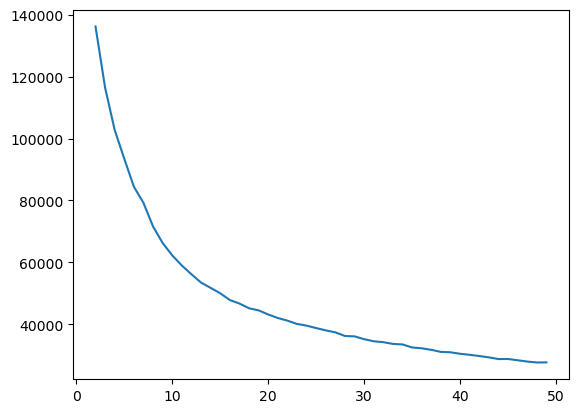

In [493]:
plt.plot(number_of_clusters, inertia)
plt.show()

#### We will again perform the elbow method using second version of scaled data from Normalize

In [494]:
# data scaled using Normalize

inertia2=[]
number_of_clusters2 = range(2,50)

for i in number_of_clusters2:
    km2 = KMeans(n_clusters = i, random_state = 0)
    km2.fit(df_kmeans_Scaled2)
    inertia2.append(km2.inertia_)
    print("Cluster for i = ",i," Completed")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  2  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  3  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  4  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  5  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  6  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  7  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  8  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  9  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  10  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  11  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  12  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  13  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  14  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  15  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  16  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  17  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  18  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  19  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  20  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  21  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  22  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  23  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  24  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  25  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  26  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  27  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  28  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  29  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  30  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  31  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  32  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  33  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  34  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  35  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  36  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  37  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  38  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  39  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  40  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  41  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  42  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  43  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  44  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  45  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  46  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  47  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  48  Completed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster for i =  49  Completed


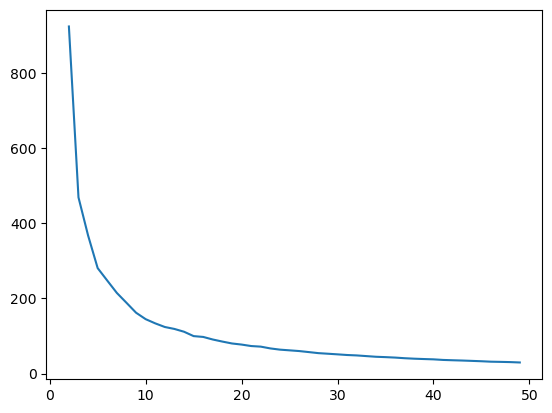

In [495]:
plt.plot(number_of_clusters2, inertia2)
plt.show()

## Ideal value of "n" for kmeans clustering
As we can see from above 2 charts, optimal value of n for clustering is around 12-13 for data scaled using Standard Scaler, and around 7-9 for data scaled using Normalize.

But, we are not interested in creating 8-10 customer clusters. That will become counter-productive since we only have just over 12,000 visitors and targeting that many custer can become impossible and/or ineffective at times.

As a solution to this problem, we will try n values ranging from 3-6 and identify the preferred way of clustering customers. Both scaled data version will be used to create 2 versions of clusters for stated n values.

In [511]:
# Clustering for n=3
km = KMeans(n_clusters = 3, random_state = 1)
km.fit(df_kmeans_Scaled)
y3=km.predict(df_kmeans_Scaled)
df['3CC']= y3

km2 = KMeans(n_clusters = 3, random_state = 1)
km2.fit(df_kmeans_Scaled2)
y3_2=km2.predict(df_kmeans_Scaled2)
df['3CC_2']= y3_2

# Clustering for n=4
km = KMeans(n_clusters = 4, random_state = 1)
km.fit(df_kmeans_Scaled)
y4=km.predict(df_kmeans_Scaled)
df['4CC']= y4

km2 = KMeans(n_clusters = 4, random_state = 1)
km2.fit(df_kmeans_Scaled2)
y4_2=km2.predict(df_kmeans_Scaled2)
df['4CC_2']= y4_2

## Clustering for n=5
km = KMeans(n_clusters = 5, random_state = 1)
km.fit(df_kmeans_Scaled)
y5=km.predict(df_kmeans_Scaled)
df['5CC']= y5

km2 = KMeans(n_clusters = 5, random_state = 1)
km2.fit(df_kmeans_Scaled2)
y5_2=km2.predict(df_kmeans_Scaled2)
df['5CC_2']= y5_2

# Clustering for n=6
km = KMeans(n_clusters = 6, random_state = 1)
km.fit(df_kmeans_Scaled)
y6=km.predict(df_kmeans_Scaled)
df['6CC']= y6

km2 = KMeans(n_clusters = 6, random_state = 1)
km2.fit(df_kmeans_Scaled2)
y6_2=km2.predict(df_kmeans_Scaled2)
df['6CC_2']= y6_2

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

# Section 5: Customer Segments

Now, we will create pivot tables for these custers and identify which version is more effective in terms of clustering similar customers together.

In [513]:
table = pd.pivot_table(df, index='3CC',values=['Transaction',"Transaction Status", "VisitorType Status","PageValues","ExitRates","Administrative_Duration","Informational_Duration","ProductRelated_Duration"],
                       aggfunc={"Transaction":"count","Transaction Status":"sum","VisitorType Status":"sum","ExitRates":"mean"
                               ,"PageValues":"mean","Administrative_Duration":"mean","Informational_Duration":"mean","ProductRelated_Duration":"mean"})
table.columns
cols = [ 'Transaction', 'Transaction Status', 'VisitorType Status','PageValues', "ExitRates", 'Administrative_Duration', 'Informational_Duration','ProductRelated_Duration',]
table = table[cols]
table.rename(columns={'Transaction':'Count of Visitors',
                      'Transaction Status':'Sum of Transactions Made',
                      'VisitorType Status': 'Count of Returning Visitors',
                      'PageValues':'Average Page Values',
                      'ExitRates':'Average Exit Rates',
                      'Administrative_Duration':'Average Administrative_Duration',
                      'Informational_Duration':'Average Informational_Duration',
                      'ProductRelated_Duration':'Average ProductRelated_Duration',
                     },inplace=True)
table

Count of Visitors  Sum of Transactions Made  Count of Returning Visitors  \
3CC                                                                             
0                 1054                         5                         1009   
1                 9618                      1387                         7971   
2                 1658                       516                         1571   

     Average Page Values  Average Exit Rates  Average Administrative_Duration  \
3CC                                                                             
0               0.000000            0.180191                         1.364769   
1               5.782345            0.032114                        50.764207   
2              10.253288            0.019477                       305.672409   

     Average Informational_Duration  Average ProductRelated_Duration  
3CC                                                                   
0                          0.086528                        57.929836  
1                          8.358147                       864.859889  
2                        207.819548                      3831.085905

In [514]:
table2 = pd.pivot_table(df, index='3CC_2',values=['Transaction',"Transaction Status", "VisitorType Status","PageValues","ExitRates","Administrative_Duration","Informational_Duration","ProductRelated_Duration"],
                       aggfunc={"Transaction":"count","Transaction Status":"sum","VisitorType Status":"sum","ExitRates":"mean"
                               ,"PageValues":"mean","Administrative_Duration":"mean","Informational_Duration":"mean","ProductRelated_Duration":"mean"})
table2.columns
cols = [ 'Transaction', 'Transaction Status', 'VisitorType Status','PageValues', "ExitRates", 'Administrative_Duration', 'Informational_Duration','ProductRelated_Duration',]
table2 = table2[cols]
table2.rename(columns={'Transaction':'Count of Visitors',
                      'Transaction Status':'Sum of Transactions Made',
                      'VisitorType Status': 'Count of Returning Visitors',
                      'PageValues':'Average Page Values',
                      'ExitRates':'Average Exit Rates',
                      'Administrative_Duration':'Average Administrative_Duration',
                      'Informational_Duration':'Average Informational_Duration',
                      'ProductRelated_Duration':'Average ProductRelated_Duration',
                     },inplace=True)
table2

Count of Visitors  Sum of Transactions Made  \
3CC_2                                                
0                  10564                      1754   
1                    728                         3   
2                   1038                       151   

       Count of Returning Visitors  Average Page Values  Average Exit Rates  \
3CC_2                                                                         
0                             9229             6.493919            0.033730   
1                              682             0.000000            0.198339   
2                              640             3.865882            0.029265   

       Average Administrative_Duration  Average Informational_Duration  \
3CC_2                                                                    
0                            66.577330                       35.752847   
1                             0.000000                        0.015110   
2                           282.437916                       45.607501   

       Average ProductRelated_Duration  
3CC_2                                   
0                          1361.484717  
1                             0.023123  
2                           335.722073

In [515]:
table = pd.pivot_table(df, index='4CC',values=['Transaction',"Transaction Status", "VisitorType Status","PageValues","ExitRates","Administrative_Duration","Informational_Duration","ProductRelated_Duration"],
                       aggfunc={"Transaction":"count","Transaction Status":"sum","VisitorType Status":"sum","ExitRates":"mean"
                               ,"PageValues":"mean","Administrative_Duration":"mean","Informational_Duration":"mean","ProductRelated_Duration":"mean"})
table.columns
cols = [ 'Transaction', 'Transaction Status', 'VisitorType Status','PageValues', "ExitRates", 'Administrative_Duration', 'Informational_Duration','ProductRelated_Duration',]
table = table[cols]
table.rename(columns={'Transaction':'Count of Visitors',
                      'Transaction Status':'Sum of Transactions Made',
                      'VisitorType Status': 'Count of Returning Visitors',
                      'PageValues':'Average Page Values',
                      'ExitRates':'Average Exit Rates',
                      'Administrative_Duration':'Average Administrative_Duration',
                      'Informational_Duration':'Average Informational_Duration',
                      'ProductRelated_Duration':'Average ProductRelated_Duration',
                     },inplace=True)
table

Count of Visitors  Sum of Transactions Made  Count of Returning Visitors  \
4CC                                                                             
0                 1674                      1616                         1229   
1                 8347                         0                         7104   
2                 1041                         5                          996   
3                 1268                       287                         1222   

     Average Page Values  Average Exit Rates  Average Administrative_Duration  \
4CC                                                                             
0              31.885464            0.019398                        85.637681   
1               1.247085            0.034125                        51.673536   
2               0.000000            0.181073                         1.381812   
3               6.962825            0.019936                       331.528802   

     Average Informational_Duration  Average ProductRelated_Duration  
4CC                                                                   
0                         19.275564                      1297.969759  
1                          9.043947                       852.938312  
2                          0.087608                        55.359891  
3                        250.154847                      4243.938312

In [516]:
table2 = pd.pivot_table(df, index='4CC_2',values=['Transaction',"Transaction Status", "VisitorType Status","PageValues","ExitRates","Administrative_Duration","Informational_Duration","ProductRelated_Duration"],
                       aggfunc={"Transaction":"count","Transaction Status":"sum","VisitorType Status":"sum","ExitRates":"mean"
                               ,"PageValues":"mean","Administrative_Duration":"mean","Informational_Duration":"mean","ProductRelated_Duration":"mean"})
table2.columns
cols = [ 'Transaction', 'Transaction Status', 'VisitorType Status','PageValues', "ExitRates", 'Administrative_Duration', 'Informational_Duration','ProductRelated_Duration',]
table2 = table2[cols]
table2.rename(columns={'Transaction':'Count of Visitors',
                      'Transaction Status':'Sum of Transactions Made',
                      'VisitorType Status': 'Count of Returning Visitors',
                      'PageValues':'Average Page Values',
                      'ExitRates':'Average Exit Rates',
                      'Administrative_Duration':'Average Administrative_Duration',
                      'Informational_Duration':'Average Informational_Duration',
                      'ProductRelated_Duration':'Average ProductRelated_Duration',
                     },inplace=True)
table2

Count of Visitors  Sum of Transactions Made  \
4CC_2                                                
0                   1538                       250   
1                    728                         3   
2                   9532                      1581   
3                    532                        74   

       Count of Returning Visitors  Average Page Values  Average Exit Rates  \
4CC_2                                                                         
0                             1124             6.910813            0.023658   
1                              682             0.000000            0.198339   
2                             8459             6.373509            0.034920   
3                              286             2.318482            0.032813   

       Average Administrative_Duration  Average Informational_Duration  \
4CC_2                                                                    
0                           238.192616                       92.105426   
1                             0.000000                        0.015110   
2                            50.198511                       28.782988   
3                           285.077097                       16.947521   

       Average ProductRelated_Duration  
4CC_2                                   
0                           698.879555  
1                             0.023123  
2                          1422.055295  
3                           190.406452

In [517]:
table = pd.pivot_table(df, index='5CC',values=['Transaction',"Transaction Status", "VisitorType Status","PageValues","ExitRates","Administrative_Duration","Informational_Duration","ProductRelated_Duration"],
                       aggfunc={"Transaction":"count","Transaction Status":"sum","VisitorType Status":"sum","ExitRates":"mean"
                               ,"PageValues":"mean","Administrative_Duration":"mean","Informational_Duration":"mean","ProductRelated_Duration":"mean"})
table.columns
cols = [ 'Transaction', 'Transaction Status', 'VisitorType Status','PageValues', "ExitRates", 'Administrative_Duration', 'Informational_Duration','ProductRelated_Duration',]
table = table[cols]
table.rename(columns={'Transaction':'Count of Visitors',
                      'Transaction Status':'Sum of Transactions Made',
                      'VisitorType Status': 'Count of Returning Visitors',
                      'PageValues':'Average Page Values',
                      'ExitRates':'Average Exit Rates',
                      'Administrative_Duration':'Average Administrative_Duration',
                      'Informational_Duration':'Average Informational_Duration',
                      'ProductRelated_Duration':'Average ProductRelated_Duration',
                     },inplace=True)
table

Count of Visitors  Sum of Transactions Made  Count of Returning Visitors  \
5CC                                                                             
0                  915                        32                          882   
1                 7682                         0                         6466   
2                  892                         4                          847   
3                 1195                       282                         1152   
4                 1646                      1590                         1204   

     Average Page Values  Average Exit Rates  Average Administrative_Duration  \
5CC                                                                             
0               1.360801            0.050171                        30.120709   
1               1.321865            0.033996                        55.122319   
2               0.000000            0.188856                         1.095889   
3               7.030489            0.019867                       336.109519   
4              32.085915            0.019334                        86.789160   

     Average Informational_Duration  Average ProductRelated_Duration  
5CC                                                                   
0                          9.616411                       907.302773  
1                          9.560449                       848.208278  
2                          0.000000                        40.252108  
3                        260.538065                      4345.424080  
4                         19.112572                      1310.094901

In [518]:
table2 = pd.pivot_table(df, index='5CC_2',values=['Transaction',"Transaction Status", "VisitorType Status","PageValues","ExitRates","Administrative_Duration","Informational_Duration","ProductRelated_Duration"],
                       aggfunc={"Transaction":"count","Transaction Status":"sum","VisitorType Status":"sum","ExitRates":"mean"
                               ,"PageValues":"mean","Administrative_Duration":"mean","Informational_Duration":"mean","ProductRelated_Duration":"mean"})
table2.columns
cols = [ 'Transaction', 'Transaction Status', 'VisitorType Status','PageValues', "ExitRates", 'Administrative_Duration', 'Informational_Duration','ProductRelated_Duration',]
table2 = table2[cols]
table2.rename(columns={'Transaction':'Count of Visitors',
                      'Transaction Status':'Sum of Transactions Made',
                      'VisitorType Status': 'Count of Returning Visitors',
                      'PageValues':'Average Page Values',
                      'ExitRates':'Average Exit Rates',
                      'Administrative_Duration':'Average Administrative_Duration',
                      'Informational_Duration':'Average Informational_Duration',
                      'ProductRelated_Duration':'Average ProductRelated_Duration',
                     },inplace=True)
table2

Count of Visitors  Sum of Transactions Made  \
5CC_2                                                
0                   1404                       230   
1                    727                         3   
2                   9464                      1570   
3                    506                        71   
4                    229                        34   

       Count of Returning Visitors  Average Page Values  Average Exit Rates  \
5CC_2                                                                         
0                             1016             6.904934            0.022771   
1                              681             0.000000            0.198429   
2                             8402             6.392799            0.035003   
3                              266             2.319061            0.033083   
4                              186             5.437239            0.029903   

       Average Administrative_Duration  Average Informational_Duration  \
5CC_2                                                                    
0                           256.671525                       26.727277   
1                             0.000000                        0.000000   
2                            49.647374                       28.409172   
3                           290.290851                       13.119330   
4                            84.614537                      489.156253   

       Average ProductRelated_Duration  
5CC_2                                   
0                           712.075199  
1                             0.023155  
2                          1425.782218  
3                           190.904611  
4                           616.811510

In [519]:
table = pd.pivot_table(df, index='6CC',values=['Transaction',"Transaction Status", "VisitorType Status","PageValues","ExitRates","Administrative_Duration","Informational_Duration","ProductRelated_Duration"],
                       aggfunc={"Transaction":"count","Transaction Status":"sum","VisitorType Status":"sum","ExitRates":"mean"
                               ,"PageValues":"mean","Administrative_Duration":"mean","Informational_Duration":"mean","ProductRelated_Duration":"mean"})
table.columns
cols = [ 'Transaction', 'Transaction Status', 'VisitorType Status','PageValues', "ExitRates", 'Administrative_Duration', 'Informational_Duration','ProductRelated_Duration',]
table = table[cols]
table.rename(columns={'Transaction':'Count of Visitors',
                      'Transaction Status':'Sum of Transactions Made',
                      'VisitorType Status': 'Count of Returning Visitors',
                      'PageValues':'Average Page Values',
                      'ExitRates':'Average Exit Rates',
                      'Administrative_Duration':'Average Administrative_Duration',
                      'Informational_Duration':'Average Informational_Duration',
                      'ProductRelated_Duration':'Average ProductRelated_Duration',
                     },inplace=True)
table

Count of Visitors  Sum of Transactions Made  Count of Returning Visitors  \
6CC                                                                             
0                 1099                       276                         1066   
1                 1896                         2                         1539   
2                 5901                         0                         5030   
3                 1639                      1594                         1199   
4                  915                        32                          882   
5                  880                         4                          835   

     Average Page Values  Average Exit Rates  Average Administrative_Duration  \
6CC                                                                             
0               7.213116            0.019951                       336.974094   
1               1.384727            0.031626                        64.687274   
2               1.465393            0.034663                        56.116772   
3              31.840776            0.019330                        87.664742   
4               1.341616            0.050186                        30.280599   
5               0.000000            0.189832                         1.110833   

     Average Informational_Duration  Average ProductRelated_Duration  
6CC                                                                   
0                        275.931679                      4529.184175  
1                         13.379048                       892.093766  
2                          9.443190                       853.779068  
3                         19.404694                      1316.702720  
4                          9.727340                       908.738671  
5                          0.000000                        39.222477

In [520]:
table2 = pd.pivot_table(df, index='6CC_2',values=['Transaction',"Transaction Status", "VisitorType Status","PageValues","ExitRates","Administrative_Duration","Informational_Duration","ProductRelated_Duration"],
                       aggfunc={"Transaction":"count","Transaction Status":"sum","VisitorType Status":"sum","ExitRates":"mean"
                               ,"PageValues":"mean","Administrative_Duration":"mean","Informational_Duration":"mean","ProductRelated_Duration":"mean"})
table2.columns
cols = [ 'Transaction', 'Transaction Status', 'VisitorType Status','PageValues', "ExitRates", 'Administrative_Duration', 'Informational_Duration','ProductRelated_Duration',]
table2 = table2[cols]
table2.rename(columns={'Transaction':'Count of Visitors',
                      'Transaction Status':'Sum of Transactions Made',
                      'VisitorType Status': 'Count of Returning Visitors',
                      'PageValues':'Average Page Values',
                      'ExitRates':'Average Exit Rates',
                      'Administrative_Duration':'Average Administrative_Duration',
                      'Informational_Duration':'Average Informational_Duration',
                      'ProductRelated_Duration':'Average ProductRelated_Duration',
                     },inplace=True)
table2

Count of Visitors  Sum of Transactions Made  \
6CC_2                                                
0                   9461                      1570   
1                    127                         0   
2                    508                        72   
3                    600                         3   
4                   1405                       229   
5                    229                        34   

       Count of Returning Visitors  Average Page Values  Average Exit Rates  \
6CC_2                                                                         
0                             8400             6.394826            0.035007   
1                              119             0.000000            0.197900   
2                              267             2.309930            0.033013   
3                              562             0.000000            0.198540   
4                             1017             6.900019            0.022785   
5                              186             5.437239            0.029903   

       Average Administrative_Duration  Average Informational_Duration  \
6CC_2                                                                    
0                            49.593859                       28.413987   
1                             0.000000                        0.000000   
2                           289.714214                       13.067679   
3                             0.000000                        0.000000   
4                           256.750478                       26.736496   
5                            84.614537                      489.156253   

       Average ProductRelated_Duration  
6CC_2                                   
0                          1425.895109  
1                             0.000000  
2                           190.813615  
3                             0.028056  
4                           713.613722  
5                           616.811510

## Identifying the preferred Clustering method:

As can be seen from above pivot tables, for n = 5 & 6, originally bigger custers are splitting and creating 2 smaller clusters. This increases the classes but will affect the focus of our marketing strategy. Because of this we will be using model with n = 3 or 4.

Between n = 3 & 4, n=4 seems to custer clietns in proper segments since segments are differentiated from other segments in average attribute values. 

#### Especially n=4 and Standard Scaler combination seems to be yielding good results in terms of differntiated clusters. 

In [527]:
table = pd.pivot_table(df, index='4CC',values=['Transaction',"Transaction Status", "VisitorType Status","PageValues","ExitRates","Administrative_Duration","Informational_Duration","ProductRelated_Duration"],
                       aggfunc={"Transaction":"count","Transaction Status":"sum","VisitorType Status":"sum","ExitRates":"mean"
                               ,"PageValues":"mean","Administrative_Duration":"mean","Informational_Duration":"mean","ProductRelated_Duration":"mean"})
table.columns
cols = [ 'Transaction', 'Transaction Status', 'VisitorType Status','PageValues', "ExitRates", 'Administrative_Duration', 'Informational_Duration','ProductRelated_Duration',]
table = table[cols]
table.rename(columns={'Transaction':'Count of Visitors',
                      'Transaction Status':'Sum of Transactions Made',
                      'VisitorType Status': 'Count of Returning Visitors',
                      'PageValues':'Average Page Values',
                      'ExitRates':'Average Exit Rates',
                      'Administrative_Duration':'Average Administrative_Duration',
                      'Informational_Duration':'Average Informational_Duration',
                      'ProductRelated_Duration':'Average ProductRelated_Duration',
                     },inplace=True)
table

Count of Visitors  Sum of Transactions Made  Count of Returning Visitors  \
4CC                                                                             
0                 1674                      1616                         1229   
1                 8347                         0                         7104   
2                 1041                         5                          996   
3                 1268                       287                         1222   

     Average Page Values  Average Exit Rates  Average Administrative_Duration  \
4CC                                                                             
0              31.885464            0.019398                        85.637681   
1               1.247085            0.034125                        51.673536   
2               0.000000            0.181073                         1.381812   
3               6.962825            0.019936                       331.528802   

     Average Informational_Duration  Average ProductRelated_Duration  
4CC                                                                   
0                         19.275564                      1297.969759  
1                          9.043947                       852.938312  
2                          0.087608                        55.359891  
3                        250.154847                      4243.938312

In [529]:
table.reset_index(inplace=True)

In [530]:
table.iloc[:,[0,1,2,3,4,6,7,8]]

4CC  Count of Visitors  Sum of Transactions Made  \
0    0               1674                      1616   
1    1               8347                         0   
2    2               1041                         5   
3    3               1268                       287   

   Count of Returning Visitors  Average Page Values  \
0                         1229            31.885464   
1                         7104             1.247085   
2                          996             0.000000   
3                         1222             6.962825   

   Average Administrative_Duration  Average Informational_Duration  \
0                        85.637681                       19.275564   
1                        51.673536                        9.043947   
2                         1.381812                        0.087608   
3                       331.528802                      250.154847   

   Average ProductRelated_Duration  
0                      1297.969759  
1                       852.938312  
2                        55.359891  
3                      4243.938312

 # Customer Segment Analysis:
 
 We have 4 unique segments after the kmeans clustering.
 
 
 ## Cluster - 0 : Loyal Shoppers
 
It is evident from the table that
 
1. 1616 out of 1674 belonging to Cluster Class 2 Have Made Transactions.
2. Also they have higher Average **Page Values** indicating to transactions.
3. They spend a good chunk of their website visit time on ProductRelated Pages and other pages.
<br>
<br>
This is a clear classification of High Value Loyal or Regular Customers

## Cluster - 2: Bouncers

 It is evident from the table that
 
1. Only **5 out of 1041** belonging to Cluster Class 1 Have Made Transactions.
2. Also they have *Super Low* Average **Page Values** indicating to NO transactions.
3. They have the **Highest Exit Rates** among all segments.
<br>
<br>
This is a clear classification of Bouncers who visit Clifford's Website but immediately terminates the session.


 ## Cluster - 1: Deal Seekers
 
It is evident from the table that 

1. Only **7104 out of 8347** belonging to Cluster Class 3 are Returning Visitors. i.e. They visit often but do not buy.
2. Also they have **Quite High** Product Related Duration.
3. They are the major chunk of Cliffords Website Visitors 



This is a clear classification of **Deal Seekers** who visit Clifford's Website and spends some time looking for their product and price but *leave without making a transaction.*
<br>


## Cluster - 3: Confused Shoppers/ On the Edge Shoppers

It is evident from the table that 

1. Only **287 out of 1268** 25% belonging to Cluster Class 0 are make a transaction on Clifford's eCommerce Website.
2. Also they have **Highest** Product Related Duration
3. Also they have **Highest** Informational Duration
4. Also they have **Highest** Administrative Duration
5. Also have relatively **higher PageValues**. It seems this segment is not able to find the right information regarding product or website policies.

Examples of such information:
1. Whether Clifford is a reliable webiste or not
2. Return Policy
3. Customer Reviews
4. Improper Website Page Traversal Workflow
5. Poor Product Recommendation Engine 


<br>
**This Class - Could be classified as Customers on the EDGE.** Which can be converted if adequate strategy can be adapted to compell them to make a transaction
<br>
This is a clear classification of **Confused Visitors** who visit Clifford's Website and spends over time looking for their product, price, information, usage, reviews  but *Only few of them make a transaction and buy the product.*
<br>


## Strategy Recommendations

Based on this analysis of customer segments & Chosen ML Model, following marketing strategies are recommended for Clifford's eCommerce website.

(1) Loyalty Program: Clifford's can establish a loyalty program for customers, where clients receive points in return of shopping at Clifford's. Amount of points can vary for different segments/marketing campaign etc. This will enable Clifford's to obtain loyal customers in future, similar to what we see in Loyal Shoppers cluster.

(2) Targeted Promotions for Confused Shoppers Segment: Customers who are in Deal Seekers cluster, have not made any purchase, and are predicted as "No transaction" will be targeted through this. It will improve the conversion rate for those customers. Customers from confused shoppers group can also be targeted using this to motivate them to make an transaction.

(3) Secific Website Redesign: We also recommend Clifford's to update/redesign certain pages on website. This pages are mainly administrative and informational. This is mainly targeting Confused Shoppers segment, and will help them find what they are looking for faster, in turn increasing conversion rate of visitors. This redesign will also benefit other segments as well, but the confused segment is most affected by this.

(4) Email/Text Reminders: Such reminders will alert custommers about specific aspects of their Clifford's eCommerce accounts. These aspects include, expiring promotion, new deal, item left inn cart etc. These trigger actions can be defined based on available budget and desired frequency from customer perspective.


On top of this, we also recommend that this ML prediction model and clusters are updated every quarter with new user data to potentially improve their accuracy.

